# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 90911 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 90911) |           | Elapsed Time: 0:00:04 ETA:  4 days, 10:24:00

  0% (  125 of 90911) |                    | Elapsed Time: 0:00:05 ETA:  0:12:09

  0% (  252 of 90911) |                    | Elapsed Time: 0:00:06 ETA:  0:12:00

  0% (  364 of 90911) |                    | Elapsed Time: 0:00:07 ETA:  0:12:27

  0% (  477 of 90911) |                    | Elapsed Time: 0:00:08 ETA:  0:12:39

  0% (  589 of 90911) |                    | Elapsed Time: 0:00:09 ETA:  0:12:48

  0% (  696 of 90911) |                    | Elapsed Time: 0:00:10 ETA:  0:12:59

  0% (  810 of 90911) |                    | Elapsed Time: 0:00:11 ETA:  0:12:59

  1% (  925 of 90911) |                    | Elapsed Time: 0:00:12 ETA:  0:12:59

  1% ( 1045 of 90911) |                    | Elapsed Time: 0:00:13 ETA:  0:12:54

  1% ( 1137 of 90911) |                    | Elapsed Time: 0:00:14 ETA:  0:12:58

  1% ( 1257 of 90911) |                    | Elapsed Time: 0:00:15 ETA:  0:13:03

  1% ( 1379 of 90911) |                    | Elapsed Time: 0:00:16 ETA:  0:12:54

  1% ( 1501 of 90911) |                    | Elapsed Time: 0:00:17 ETA:  0:12:46

  1% ( 1616 of 90911) |                    | Elapsed Time: 0:00:18 ETA:  0:12:42

  1% ( 1742 of 90911) |                    | Elapsed Time: 0:00:19 ETA:  0:12:26

  2% ( 1861 of 90911) |                    | Elapsed Time: 0:00:20 ETA:  0:12:22

  2% ( 1939 of 90911) |                    | Elapsed Time: 0:00:21 ETA:  0:12:49

  2% ( 2059 of 90911) |                    | Elapsed Time: 0:00:22 ETA:  0:12:48

  2% ( 2169 of 90911) |                    | Elapsed Time: 0:00:23 ETA:  0:12:53

  2% ( 2273 of 90911) |                    | Elapsed Time: 0:00:24 ETA:  0:13:03

  2% ( 2391 of 90911) |                    | Elapsed Time: 0:00:25 ETA:  0:13:04

  2% ( 2504 of 90911) |                    | Elapsed Time: 0:00:26 ETA:  0:13:10

  2% ( 2620 of 90911) |                    | Elapsed Time: 0:00:27 ETA:  0:13:09

  3% ( 2731 of 90911) |                    | Elapsed Time: 0:00:28 ETA:  0:13:21

  3% ( 2844 of 90911) |                    | Elapsed Time: 0:00:29 ETA:  0:13:25

  3% ( 2955 of 90911) |                    | Elapsed Time: 0:00:30 ETA:  0:12:57

  3% ( 3068 of 90911) |                    | Elapsed Time: 0:00:31 ETA:  0:13:02

  3% ( 3155 of 90911) |                    | Elapsed Time: 0:00:32 ETA:  0:13:19

  3% ( 3251 of 90911) |                    | Elapsed Time: 0:00:33 ETA:  0:13:28

  3% ( 3344 of 90911) |                    | Elapsed Time: 0:00:34 ETA:  0:13:49

  3% ( 3410 of 90911) |                    | Elapsed Time: 0:00:34 ETA:  0:14:05

  3% ( 3517 of 90911) |                    | Elapsed Time: 0:00:35 ETA:  0:14:13

  3% ( 3623 of 90911) |                    | Elapsed Time: 0:00:36 ETA:  0:14:17

  4% ( 3734 of 90911) |                    | Elapsed Time: 0:00:37 ETA:  0:14:17

  4% ( 3845 of 90911) |                    | Elapsed Time: 0:00:38 ETA:  0:14:16

  4% ( 3974 of 90911) |                    | Elapsed Time: 0:00:39 ETA:  0:13:59

  4% ( 4101 of 90911) |                    | Elapsed Time: 0:00:40 ETA:  0:13:21

  4% ( 4210 of 90911) |                    | Elapsed Time: 0:00:42 ETA:  0:13:28

  4% ( 4335 of 90911) |                    | Elapsed Time: 0:00:43 ETA:  0:13:00

  4% ( 4463 of 90911) |                    | Elapsed Time: 0:00:44 ETA:  0:12:35

  5% ( 4546 of 90911) |#                   | Elapsed Time: 0:00:44 ETA:  0:12:22

  5% ( 4675 of 90911) |#                   | Elapsed Time: 0:00:45 ETA:  0:12:04

  5% ( 4802 of 90911) |#                   | Elapsed Time: 0:00:46 ETA:  0:11:51

  5% ( 4931 of 90911) |#                   | Elapsed Time: 0:00:47 ETA:  0:11:38

  5% ( 5061 of 90911) |#                   | Elapsed Time: 0:00:48 ETA:  0:11:37

  5% ( 5189 of 90911) |#                   | Elapsed Time: 0:00:49 ETA:  0:11:35

  5% ( 5322 of 90911) |#                   | Elapsed Time: 0:00:50 ETA:  0:11:00

  6% ( 5459 of 90911) |#                   | Elapsed Time: 0:00:51 ETA:  0:10:51

  6% ( 5573 of 90911) |#                   | Elapsed Time: 0:00:52 ETA:  0:10:59

  6% ( 5682 of 90911) |#                   | Elapsed Time: 0:00:53 ETA:  0:11:09

  6% ( 5791 of 90911) |#                   | Elapsed Time: 0:00:54 ETA:  0:11:21

  6% ( 5904 of 90911) |#                   | Elapsed Time: 0:00:55 ETA:  0:11:30

  6% ( 6015 of 90911) |#                   | Elapsed Time: 0:00:56 ETA:  0:11:41

  6% ( 6125 of 90911) |#                   | Elapsed Time: 0:00:57 ETA:  0:11:54

  6% ( 6235 of 90911) |#                   | Elapsed Time: 0:00:58 ETA:  0:12:06

  6% ( 6351 of 90911) |#                   | Elapsed Time: 0:00:59 ETA:  0:12:18

  7% ( 6461 of 90911) |#                   | Elapsed Time: 0:01:00 ETA:  0:12:38

  7% ( 6576 of 90911) |#                   | Elapsed Time: 0:01:01 ETA:  0:12:37

  7% ( 6687 of 90911) |#                   | Elapsed Time: 0:01:02 ETA:  0:12:35

  7% ( 6819 of 90911) |#                   | Elapsed Time: 0:01:03 ETA:  0:12:27

  7% ( 6937 of 90911) |#                   | Elapsed Time: 0:01:04 ETA:  0:12:20

  7% ( 7064 of 90911) |#                   | Elapsed Time: 0:01:05 ETA:  0:12:05

  7% ( 7168 of 90911) |#                   | Elapsed Time: 0:01:07 ETA:  0:12:09

  7% ( 7210 of 90911) |#                   | Elapsed Time: 0:01:08 ETA:  0:13:18

  8% ( 7280 of 90911) |#                   | Elapsed Time: 0:01:09 ETA:  0:14:00

  8% ( 7353 of 90911) |#                   | Elapsed Time: 0:01:10 ETA:  0:14:49

  8% ( 7425 of 90911) |#                   | Elapsed Time: 0:01:11 ETA:  0:15:39

  8% ( 7502 of 90911) |#                   | Elapsed Time: 0:01:12 ETA:  0:16:34

  8% ( 7578 of 90911) |#                   | Elapsed Time: 0:01:13 ETA:  0:16:53

  8% ( 7700 of 90911) |#                   | Elapsed Time: 0:01:14 ETA:  0:16:46

  8% ( 7787 of 90911) |#                   | Elapsed Time: 0:01:15 ETA:  0:17:45

  8% ( 7869 of 90911) |#                   | Elapsed Time: 0:01:16 ETA:  0:18:20

  8% ( 7955 of 90911) |#                   | Elapsed Time: 0:01:17 ETA:  0:17:07

  8% ( 8041 of 90911) |#                   | Elapsed Time: 0:01:18 ETA:  0:16:42

  8% ( 8133 of 90911) |#                   | Elapsed Time: 0:01:19 ETA:  0:16:15

  9% ( 8239 of 90911) |#                   | Elapsed Time: 0:01:20 ETA:  0:15:30

  9% ( 8372 of 90911) |#                   | Elapsed Time: 0:01:21 ETA:  0:14:23

  9% ( 8495 of 90911) |#                   | Elapsed Time: 0:01:22 ETA:  0:13:34

  9% ( 8606 of 90911) |#                   | Elapsed Time: 0:01:23 ETA:  0:13:44

  9% ( 8716 of 90911) |#                   | Elapsed Time: 0:01:24 ETA:  0:13:20

  9% ( 8825 of 90911) |#                   | Elapsed Time: 0:01:25 ETA:  0:12:53

  9% ( 8934 of 90911) |#                   | Elapsed Time: 0:01:26 ETA:  0:12:33

  9% ( 9040 of 90911) |#                   | Elapsed Time: 0:01:27 ETA:  0:12:16

 10% ( 9092 of 90911) |##                  | Elapsed Time: 0:01:27 ETA:  0:11:58

 10% ( 9183 of 90911) |##                  | Elapsed Time: 0:01:28 ETA:  0:12:10

 10% ( 9274 of 90911) |##                  | Elapsed Time: 0:01:29 ETA:  0:12:48

 10% ( 9369 of 90911) |##                  | Elapsed Time: 0:01:30 ETA:  0:13:15

 10% ( 9466 of 90911) |##                  | Elapsed Time: 0:01:31 ETA:  0:13:29

 10% ( 9565 of 90911) |##                  | Elapsed Time: 0:01:32 ETA:  0:13:40

 10% ( 9694 of 90911) |##                  | Elapsed Time: 0:01:33 ETA:  0:13:18

 10% ( 9825 of 90911) |##                  | Elapsed Time: 0:01:34 ETA:  0:12:54

 10% ( 9946 of 90911) |##                  | Elapsed Time: 0:01:35 ETA:  0:12:39

 11% (10056 of 90911) |##                  | Elapsed Time: 0:01:36 ETA:  0:12:37

 11% (10166 of 90911) |##                  | Elapsed Time: 0:01:37 ETA:  0:12:19

 11% (10228 of 90911) |##                  | Elapsed Time: 0:01:38 ETA:  0:12:03

 11% (10339 of 90911) |##                  | Elapsed Time: 0:01:39 ETA:  0:11:48

 11% (10453 of 90911) |##                  | Elapsed Time: 0:01:40 ETA:  0:11:33

 11% (10564 of 90911) |##                  | Elapsed Time: 0:01:41 ETA:  0:11:22

 11% (10677 of 90911) |##                  | Elapsed Time: 0:01:42 ETA:  0:11:35

 11% (10728 of 90911) |##                  | Elapsed Time: 0:01:43 ETA:  0:12:45

 11% (10836 of 90911) |##                  | Elapsed Time: 0:01:44 ETA:  0:12:56

 12% (10946 of 90911) |##                  | Elapsed Time: 0:01:45 ETA:  0:12:54

 12% (11056 of 90911) |##                  | Elapsed Time: 0:01:46 ETA:  0:12:53

 12% (11166 of 90911) |##                  | Elapsed Time: 0:01:47 ETA:  0:12:49

 12% (11278 of 90911) |##                  | Elapsed Time: 0:01:48 ETA:  0:12:47

 12% (11364 of 90911) |##                  | Elapsed Time: 0:01:49 ETA:  0:12:49

 12% (11478 of 90911) |##                  | Elapsed Time: 0:01:50 ETA:  0:12:44

 12% (11592 of 90911) |##                  | Elapsed Time: 0:01:51 ETA:  0:12:42

 12% (11707 of 90911) |##                  | Elapsed Time: 0:01:52 ETA:  0:11:43

 13% (11821 of 90911) |##                  | Elapsed Time: 0:01:53 ETA:  0:11:38

 13% (11935 of 90911) |##                  | Elapsed Time: 0:01:54 ETA:  0:11:34

 13% (12048 of 90911) |##                  | Elapsed Time: 0:01:55 ETA:  0:11:30

 13% (12165 of 90911) |##                  | Elapsed Time: 0:01:56 ETA:  0:11:23

 13% (12288 of 90911) |##                  | Elapsed Time: 0:01:57 ETA:  0:11:13

 13% (12412 of 90911) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:05

 13% (12501 of 90911) |##                  | Elapsed Time: 0:01:58 ETA:  0:11:01

 13% (12625 of 90911) |##                  | Elapsed Time: 0:01:59 ETA:  0:10:52

 14% (12747 of 90911) |##                  | Elapsed Time: 0:02:00 ETA:  0:10:46

 14% (12872 of 90911) |##                  | Elapsed Time: 0:02:01 ETA:  0:10:37

 14% (12998 of 90911) |##                  | Elapsed Time: 0:02:02 ETA:  0:10:27

 14% (13116 of 90911) |##                  | Elapsed Time: 0:02:03 ETA:  0:10:23

 14% (13234 of 90911) |##                  | Elapsed Time: 0:02:04 ETA:  0:10:21

 14% (13352 of 90911) |##                  | Elapsed Time: 0:02:05 ETA:  0:10:25

 14% (13473 of 90911) |##                  | Elapsed Time: 0:02:06 ETA:  0:10:26

 14% (13605 of 90911) |##                  | Elapsed Time: 0:02:07 ETA:  0:10:16

 15% (13637 of 90911) |###                 | Elapsed Time: 0:02:08 ETA:  0:10:15

 15% (13768 of 90911) |###                 | Elapsed Time: 0:02:09 ETA:  0:10:08

 15% (13890 of 90911) |###                 | Elapsed Time: 0:02:10 ETA:  0:10:09

 15% (14002 of 90911) |###                 | Elapsed Time: 0:02:11 ETA:  0:10:18

 15% (14115 of 90911) |###                 | Elapsed Time: 0:02:12 ETA:  0:10:21

 15% (14223 of 90911) |###                 | Elapsed Time: 0:02:13 ETA:  0:10:27

 15% (14333 of 90911) |###                 | Elapsed Time: 0:02:14 ETA:  0:10:32

 15% (14446 of 90911) |###                 | Elapsed Time: 0:02:15 ETA:  0:10:37

 16% (14558 of 90911) |###                 | Elapsed Time: 0:02:16 ETA:  0:10:53

 16% (14671 of 90911) |###                 | Elapsed Time: 0:02:17 ETA:  0:10:57

 16% (14774 of 90911) |###                 | Elapsed Time: 0:02:18 ETA:  0:11:06

 16% (14888 of 90911) |###                 | Elapsed Time: 0:02:19 ETA:  0:11:11

 16% (15005 of 90911) |###                 | Elapsed Time: 0:02:20 ETA:  0:11:06

 16% (15125 of 90911) |###                 | Elapsed Time: 0:02:21 ETA:  0:11:00

 16% (15249 of 90911) |###                 | Elapsed Time: 0:02:22 ETA:  0:10:46

 16% (15311 of 90911) |###                 | Elapsed Time: 0:02:23 ETA:  0:11:41

 16% (15422 of 90911) |###                 | Elapsed Time: 0:02:24 ETA:  0:11:42

 17% (15540 of 90911) |###                 | Elapsed Time: 0:02:25 ETA:  0:11:35

 17% (15656 of 90911) |###                 | Elapsed Time: 0:02:26 ETA:  0:11:32

 17% (15776 of 90911) |###                 | Elapsed Time: 0:02:27 ETA:  0:11:29

 17% (15910 of 90911) |###                 | Elapsed Time: 0:02:28 ETA:  0:11:29

 17% (16030 of 90911) |###                 | Elapsed Time: 0:02:29 ETA:  0:11:28

 17% (16150 of 90911) |###                 | Elapsed Time: 0:02:30 ETA:  0:11:30

 17% (16270 of 90911) |###                 | Elapsed Time: 0:02:31 ETA:  0:10:21

 18% (16391 of 90911) |###                 | Elapsed Time: 0:02:32 ETA:  0:10:12

 18% (16512 of 90911) |###                 | Elapsed Time: 0:02:33 ETA:  0:10:09

 18% (16635 of 90911) |###                 | Elapsed Time: 0:02:34 ETA:  0:10:02

 18% (16754 of 90911) |###                 | Elapsed Time: 0:02:35 ETA:  0:10:01

 18% (16876 of 90911) |###                 | Elapsed Time: 0:02:36 ETA:  0:09:58

 18% (17000 of 90911) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:55

 18% (17046 of 90911) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:53

 18% (17167 of 90911) |###                 | Elapsed Time: 0:02:38 ETA:  0:09:51

 19% (17286 of 90911) |###                 | Elapsed Time: 0:02:39 ETA:  0:09:51

 19% (17408 of 90911) |###                 | Elapsed Time: 0:02:40 ETA:  0:09:49

 19% (17533 of 90911) |###                 | Elapsed Time: 0:02:41 ETA:  0:09:46

 19% (17656 of 90911) |###                 | Elapsed Time: 0:02:42 ETA:  0:09:45

 19% (17776 of 90911) |###                 | Elapsed Time: 0:02:43 ETA:  0:09:44

 19% (17897 of 90911) |###                 | Elapsed Time: 0:02:44 ETA:  0:09:43

 19% (18016 of 90911) |###                 | Elapsed Time: 0:02:45 ETA:  0:09:46

 19% (18129 of 90911) |###                 | Elapsed Time: 0:02:46 ETA:  0:09:51

 20% (18183 of 90911) |####                | Elapsed Time: 0:02:47 ETA:  0:09:54

 20% (18301 of 90911) |####                | Elapsed Time: 0:02:48 ETA:  0:09:54

 20% (18420 of 90911) |####                | Elapsed Time: 0:02:49 ETA:  0:09:56

 20% (18538 of 90911) |####                | Elapsed Time: 0:02:50 ETA:  0:09:59

 20% (18661 of 90911) |####                | Elapsed Time: 0:02:51 ETA:  0:09:58

 20% (18784 of 90911) |####                | Elapsed Time: 0:02:52 ETA:  0:09:55

 20% (18904 of 90911) |####                | Elapsed Time: 0:02:53 ETA:  0:09:55

 20% (19028 of 90911) |####                | Elapsed Time: 0:02:54 ETA:  0:09:50

 21% (19149 of 90911) |####                | Elapsed Time: 0:02:55 ETA:  0:09:43

 21% (19248 of 90911) |####                | Elapsed Time: 0:02:56 ETA:  0:09:55

 21% (19319 of 90911) |####                | Elapsed Time: 0:02:57 ETA:  0:10:09

 21% (19407 of 90911) |####                | Elapsed Time: 0:02:58 ETA:  0:10:33

 21% (19499 of 90911) |####                | Elapsed Time: 0:02:59 ETA:  0:10:56

 21% (19588 of 90911) |####                | Elapsed Time: 0:03:00 ETA:  0:11:26

 21% (19676 of 90911) |####                | Elapsed Time: 0:03:01 ETA:  0:11:59

 21% (19763 of 90911) |####                | Elapsed Time: 0:03:02 ETA:  0:12:32

 21% (19854 of 90911) |####                | Elapsed Time: 0:03:03 ETA:  0:13:09

 21% (19946 of 90911) |####                | Elapsed Time: 0:03:04 ETA:  0:13:43

 22% (20038 of 90911) |####                | Elapsed Time: 0:03:05 ETA:  0:13:50

 22% (20126 of 90911) |####                | Elapsed Time: 0:03:06 ETA:  0:13:55

 22% (20231 of 90911) |####                | Elapsed Time: 0:03:07 ETA:  0:13:32

 22% (20339 of 90911) |####                | Elapsed Time: 0:03:08 ETA:  0:13:11

 22% (20455 of 90911) |####                | Elapsed Time: 0:03:09 ETA:  0:12:39

 22% (20571 of 90911) |####                | Elapsed Time: 0:03:10 ETA:  0:12:08

 22% (20688 of 90911) |####                | Elapsed Time: 0:03:11 ETA:  0:11:37

 22% (20804 of 90911) |####                | Elapsed Time: 0:03:12 ETA:  0:11:13

 22% (20826 of 90911) |####                | Elapsed Time: 0:03:13 ETA:  0:12:21

 23% (20935 of 90911) |####                | Elapsed Time: 0:03:14 ETA:  0:12:03

 23% (21047 of 90911) |####                | Elapsed Time: 0:03:15 ETA:  0:11:37

 23% (21161 of 90911) |####                | Elapsed Time: 0:03:16 ETA:  0:11:28

 23% (21274 of 90911) |####                | Elapsed Time: 0:03:17 ETA:  0:11:23

 23% (21389 of 90911) |####                | Elapsed Time: 0:03:18 ETA:  0:11:22

 23% (21502 of 90911) |####                | Elapsed Time: 0:03:19 ETA:  0:11:24

 23% (21592 of 90911) |####                | Elapsed Time: 0:03:20 ETA:  0:11:30

 23% (21705 of 90911) |####                | Elapsed Time: 0:03:21 ETA:  0:11:32

 24% (21819 of 90911) |####                | Elapsed Time: 0:03:22 ETA:  0:10:08

 24% (21933 of 90911) |####                | Elapsed Time: 0:03:23 ETA:  0:10:02

 24% (22049 of 90911) |####                | Elapsed Time: 0:03:24 ETA:  0:09:59

 24% (22157 of 90911) |####                | Elapsed Time: 0:03:25 ETA:  0:10:02

 24% (22264 of 90911) |####                | Elapsed Time: 0:03:26 ETA:  0:10:06

 24% (22370 of 90911) |####                | Elapsed Time: 0:03:27 ETA:  0:10:13

 24% (22468 of 90911) |####                | Elapsed Time: 0:03:28 ETA:  0:10:24

 24% (22567 of 90911) |####                | Elapsed Time: 0:03:29 ETA:  0:10:35

 24% (22668 of 90911) |####                | Elapsed Time: 0:03:30 ETA:  0:10:44

 25% (22728 of 90911) |#####               | Elapsed Time: 0:03:30 ETA:  0:10:54

 25% (22845 of 90911) |#####               | Elapsed Time: 0:03:31 ETA:  0:10:51

 25% (22971 of 90911) |#####               | Elapsed Time: 0:03:32 ETA:  0:10:40

 25% (23080 of 90911) |#####               | Elapsed Time: 0:03:33 ETA:  0:10:39

 25% (23178 of 90911) |#####               | Elapsed Time: 0:03:34 ETA:  0:10:46

 25% (23304 of 90911) |#####               | Elapsed Time: 0:03:35 ETA:  0:10:26

 25% (23427 of 90911) |#####               | Elapsed Time: 0:03:36 ETA:  0:10:03

 25% (23540 of 90911) |#####               | Elapsed Time: 0:03:37 ETA:  0:09:50

 26% (23642 of 90911) |#####               | Elapsed Time: 0:03:38 ETA:  0:09:47

 26% (23744 of 90911) |#####               | Elapsed Time: 0:03:39 ETA:  0:09:49

 26% (23865 of 90911) |#####               | Elapsed Time: 0:03:40 ETA:  0:10:08

 26% (23964 of 90911) |#####               | Elapsed Time: 0:03:41 ETA:  0:10:16

 26% (24051 of 90911) |#####               | Elapsed Time: 0:03:42 ETA:  0:10:26

 26% (24179 of 90911) |#####               | Elapsed Time: 0:03:43 ETA:  0:10:23

 26% (24290 of 90911) |#####               | Elapsed Time: 0:03:44 ETA:  0:10:34

 26% (24405 of 90911) |#####               | Elapsed Time: 0:03:45 ETA:  0:10:31

 26% (24508 of 90911) |#####               | Elapsed Time: 0:03:46 ETA:  0:10:30

 27% (24615 of 90911) |#####               | Elapsed Time: 0:03:47 ETA:  0:10:24

 27% (24745 of 90911) |#####               | Elapsed Time: 0:03:48 ETA:  0:09:59

 27% (24877 of 90911) |#####               | Elapsed Time: 0:03:49 ETA:  0:09:43

 27% (25001 of 90911) |#####               | Elapsed Time: 0:03:50 ETA:  0:09:05

 27% (25118 of 90911) |#####               | Elapsed Time: 0:03:51 ETA:  0:09:13

 27% (25234 of 90911) |#####               | Elapsed Time: 0:03:52 ETA:  0:09:07

 27% (25349 of 90911) |#####               | Elapsed Time: 0:03:54 ETA:  0:09:06

 28% (25467 of 90911) |#####               | Elapsed Time: 0:03:55 ETA:  0:08:52

 28% (25585 of 90911) |#####               | Elapsed Time: 0:03:56 ETA:  0:08:42

 28% (25707 of 90911) |#####               | Elapsed Time: 0:03:57 ETA:  0:08:48

 28% (25829 of 90911) |#####               | Elapsed Time: 0:03:58 ETA:  0:08:55

 28% (25949 of 90911) |#####               | Elapsed Time: 0:03:59 ETA:  0:08:51

 28% (26070 of 90911) |#####               | Elapsed Time: 0:04:00 ETA:  0:08:47

 28% (26137 of 90911) |#####               | Elapsed Time: 0:04:00 ETA:  0:08:45

 28% (26256 of 90911) |#####               | Elapsed Time: 0:04:01 ETA:  0:08:42

 29% (26376 of 90911) |#####               | Elapsed Time: 0:04:02 ETA:  0:08:38

 29% (26483 of 90911) |#####               | Elapsed Time: 0:04:03 ETA:  0:08:46

 29% (26598 of 90911) |#####               | Elapsed Time: 0:04:04 ETA:  0:08:47

 29% (26731 of 90911) |#####               | Elapsed Time: 0:04:05 ETA:  0:08:37

 29% (26862 of 90911) |#####               | Elapsed Time: 0:04:06 ETA:  0:08:30

 29% (26966 of 90911) |#####               | Elapsed Time: 0:04:07 ETA:  0:08:40

 29% (27064 of 90911) |#####               | Elapsed Time: 0:04:08 ETA:  0:08:58

 29% (27172 of 90911) |#####               | Elapsed Time: 0:04:09 ETA:  0:09:04

 29% (27231 of 90911) |#####               | Elapsed Time: 0:04:11 ETA:  0:10:41

 30% (27274 of 90911) |######              | Elapsed Time: 0:04:11 ETA:  0:11:02

 30% (27379 of 90911) |######              | Elapsed Time: 0:04:12 ETA:  0:11:03

 30% (27483 of 90911) |######              | Elapsed Time: 0:04:13 ETA:  0:11:13

 30% (27599 of 90911) |######              | Elapsed Time: 0:04:14 ETA:  0:11:31

 30% (27726 of 90911) |######              | Elapsed Time: 0:04:15 ETA:  0:11:34

 30% (27854 of 90911) |######              | Elapsed Time: 0:04:16 ETA:  0:11:08

 30% (27973 of 90911) |######              | Elapsed Time: 0:04:17 ETA:  0:10:45

 30% (28105 of 90911) |######              | Elapsed Time: 0:04:18 ETA:  0:10:21

 31% (28232 of 90911) |######              | Elapsed Time: 0:04:19 ETA:  0:08:32

 31% (28339 of 90911) |######              | Elapsed Time: 0:04:20 ETA:  0:08:32

 31% (28410 of 90911) |######              | Elapsed Time: 0:04:21 ETA:  0:08:33

 31% (28524 of 90911) |######              | Elapsed Time: 0:04:22 ETA:  0:08:25

 31% (28638 of 90911) |######              | Elapsed Time: 0:04:23 ETA:  0:08:25

 31% (28745 of 90911) |######              | Elapsed Time: 0:04:24 ETA:  0:08:38

 31% (28854 of 90911) |######              | Elapsed Time: 0:04:25 ETA:  0:08:52

 31% (28956 of 90911) |######              | Elapsed Time: 0:04:26 ETA:  0:09:05

 31% (29045 of 90911) |######              | Elapsed Time: 0:04:27 ETA:  0:09:41

 32% (29154 of 90911) |######              | Elapsed Time: 0:04:28 ETA:  0:09:56

 32% (29257 of 90911) |######              | Elapsed Time: 0:04:29 ETA:  0:09:58

 32% (29370 of 90911) |######              | Elapsed Time: 0:04:30 ETA:  0:09:44

 32% (29483 of 90911) |######              | Elapsed Time: 0:04:31 ETA:  0:09:43

 32% (29547 of 90911) |######              | Elapsed Time: 0:04:31 ETA:  0:09:44

 32% (29677 of 90911) |######              | Elapsed Time: 0:04:33 ETA:  0:09:22

 32% (29770 of 90911) |######              | Elapsed Time: 0:04:34 ETA:  0:09:36

 32% (29865 of 90911) |######              | Elapsed Time: 0:04:35 ETA:  0:09:42

 32% (29980 of 90911) |######              | Elapsed Time: 0:04:36 ETA:  0:09:17

 33% (30095 of 90911) |######              | Elapsed Time: 0:04:37 ETA:  0:09:11

 33% (30214 of 90911) |######              | Elapsed Time: 0:04:38 ETA:  0:08:57

 33% (30318 of 90911) |######              | Elapsed Time: 0:04:39 ETA:  0:09:04

 33% (30418 of 90911) |######              | Elapsed Time: 0:04:40 ETA:  0:09:15

 33% (30529 of 90911) |######              | Elapsed Time: 0:04:41 ETA:  0:09:16

 33% (30643 of 90911) |######              | Elapsed Time: 0:04:42 ETA:  0:09:29

 33% (30683 of 90911) |######              | Elapsed Time: 0:04:42 ETA:  0:09:12

 33% (30800 of 90911) |######              | Elapsed Time: 0:04:43 ETA:  0:08:51

 34% (30919 of 90911) |######              | Elapsed Time: 0:04:44 ETA:  0:08:47

 34% (31036 of 90911) |######              | Elapsed Time: 0:04:45 ETA:  0:08:43

 34% (31152 of 90911) |######              | Elapsed Time: 0:04:46 ETA:  0:08:44

 34% (31279 of 90911) |######              | Elapsed Time: 0:04:47 ETA:  0:08:24

 34% (31408 of 90911) |######              | Elapsed Time: 0:04:48 ETA:  0:07:59

 34% (31536 of 90911) |######              | Elapsed Time: 0:04:49 ETA:  0:07:45

 34% (31665 of 90911) |######              | Elapsed Time: 0:04:50 ETA:  0:07:33

 34% (31790 of 90911) |######              | Elapsed Time: 0:04:51 ETA:  0:07:29

 35% (31819 of 90911) |#######             | Elapsed Time: 0:04:51 ETA:  0:07:23

 35% (31947 of 90911) |#######             | Elapsed Time: 0:04:52 ETA:  0:07:15

 35% (32044 of 90911) |#######             | Elapsed Time: 0:04:53 ETA:  0:07:29

 35% (32124 of 90911) |#######             | Elapsed Time: 0:04:54 ETA:  0:07:56

 35% (32229 of 90911) |#######             | Elapsed Time: 0:04:55 ETA:  0:08:13

 35% (32324 of 90911) |#######             | Elapsed Time: 0:04:56 ETA:  0:08:42

 35% (32411 of 90911) |#######             | Elapsed Time: 0:04:57 ETA:  0:09:19

 35% (32507 of 90911) |#######             | Elapsed Time: 0:04:58 ETA:  0:09:51

 35% (32629 of 90911) |#######             | Elapsed Time: 0:04:59 ETA:  0:09:54

 36% (32738 of 90911) |#######             | Elapsed Time: 0:05:00 ETA:  0:09:53

 36% (32860 of 90911) |#######             | Elapsed Time: 0:05:01 ETA:  0:09:59

 36% (32956 of 90911) |#######             | Elapsed Time: 0:05:02 ETA:  0:09:49

 36% (33065 of 90911) |#######             | Elapsed Time: 0:05:03 ETA:  0:09:21

 36% (33179 of 90911) |#######             | Elapsed Time: 0:05:04 ETA:  0:09:12

 36% (33272 of 90911) |#######             | Elapsed Time: 0:05:05 ETA:  0:09:13

 36% (33366 of 90911) |#######             | Elapsed Time: 0:05:06 ETA:  0:09:05

 36% (33483 of 90911) |#######             | Elapsed Time: 0:05:07 ETA:  0:08:46

 36% (33605 of 90911) |#######             | Elapsed Time: 0:05:08 ETA:  0:08:45

 37% (33714 of 90911) |#######             | Elapsed Time: 0:05:09 ETA:  0:08:44

 37% (33824 of 90911) |#######             | Elapsed Time: 0:05:10 ETA:  0:08:53

 37% (33951 of 90911) |#######             | Elapsed Time: 0:05:11 ETA:  0:08:33

 37% (34092 of 90911) |#######             | Elapsed Time: 0:05:12 ETA:  0:08:18

 37% (34219 of 90911) |#######             | Elapsed Time: 0:05:13 ETA:  0:07:47

 37% (34336 of 90911) |#######             | Elapsed Time: 0:05:14 ETA:  0:07:28

 37% (34439 of 90911) |#######             | Elapsed Time: 0:05:15 ETA:  0:07:38

 37% (34524 of 90911) |#######             | Elapsed Time: 0:05:16 ETA:  0:08:09

 38% (34605 of 90911) |#######             | Elapsed Time: 0:05:17 ETA:  0:08:33

 38% (34688 of 90911) |#######             | Elapsed Time: 0:05:18 ETA:  0:08:59

 38% (34776 of 90911) |#######             | Elapsed Time: 0:05:19 ETA:  0:09:39

 38% (34801 of 90911) |#######             | Elapsed Time: 0:05:21 ETA:  0:12:34

 38% (34922 of 90911) |#######             | Elapsed Time: 0:05:22 ETA:  0:11:53

 38% (35050 of 90911) |#######             | Elapsed Time: 0:05:23 ETA:  0:11:51

 38% (35167 of 90911) |#######             | Elapsed Time: 0:05:24 ETA:  0:11:51

 38% (35229 of 90911) |#######             | Elapsed Time: 0:05:24 ETA:  0:11:57

 38% (35351 of 90911) |#######             | Elapsed Time: 0:05:25 ETA:  0:11:09

 39% (35472 of 90911) |#######             | Elapsed Time: 0:05:26 ETA:  0:10:22

 39% (35584 of 90911) |#######             | Elapsed Time: 0:05:27 ETA:  0:09:50

 39% (35705 of 90911) |#######             | Elapsed Time: 0:05:28 ETA:  0:09:15

 39% (35820 of 90911) |#######             | Elapsed Time: 0:05:29 ETA:  0:07:20

 39% (35914 of 90911) |#######             | Elapsed Time: 0:05:30 ETA:  0:07:39

 39% (36013 of 90911) |#######             | Elapsed Time: 0:05:31 ETA:  0:08:02

 39% (36108 of 90911) |#######             | Elapsed Time: 0:05:32 ETA:  0:08:21

 39% (36229 of 90911) |#######             | Elapsed Time: 0:05:33 ETA:  0:08:07

 40% (36365 of 90911) |########            | Elapsed Time: 0:05:34 ETA:  0:08:13

 40% (36485 of 90911) |########            | Elapsed Time: 0:05:35 ETA:  0:08:05

 40% (36606 of 90911) |########            | Elapsed Time: 0:05:36 ETA:  0:08:04

 40% (36718 of 90911) |########            | Elapsed Time: 0:05:37 ETA:  0:08:05

 40% (36822 of 90911) |########            | Elapsed Time: 0:05:38 ETA:  0:07:55

 40% (36931 of 90911) |########            | Elapsed Time: 0:05:39 ETA:  0:07:45

 40% (37035 of 90911) |########            | Elapsed Time: 0:05:40 ETA:  0:07:36

 40% (37127 of 90911) |########            | Elapsed Time: 0:05:41 ETA:  0:08:02

 40% (37231 of 90911) |########            | Elapsed Time: 0:05:43 ETA:  0:08:19

 41% (37343 of 90911) |########            | Elapsed Time: 0:05:44 ETA:  0:08:16

 41% (37454 of 90911) |########            | Elapsed Time: 0:05:45 ETA:  0:08:23

 41% (37501 of 90911) |########            | Elapsed Time: 0:05:45 ETA:  0:08:33

 41% (37611 of 90911) |########            | Elapsed Time: 0:05:46 ETA:  0:08:34

 41% (37718 of 90911) |########            | Elapsed Time: 0:05:47 ETA:  0:08:30

 41% (37830 of 90911) |########            | Elapsed Time: 0:05:48 ETA:  0:08:26

 41% (37935 of 90911) |########            | Elapsed Time: 0:05:49 ETA:  0:08:24

 41% (38034 of 90911) |########            | Elapsed Time: 0:05:50 ETA:  0:08:17

 41% (38136 of 90911) |########            | Elapsed Time: 0:05:51 ETA:  0:08:17

 42% (38240 of 90911) |########            | Elapsed Time: 0:05:52 ETA:  0:08:24

 42% (38344 of 90911) |########            | Elapsed Time: 0:05:53 ETA:  0:08:30

 42% (38452 of 90911) |########            | Elapsed Time: 0:05:54 ETA:  0:08:30

 42% (38585 of 90911) |########            | Elapsed Time: 0:05:55 ETA:  0:08:08

 42% (38638 of 90911) |########            | Elapsed Time: 0:05:55 ETA:  0:07:56

 42% (38780 of 90911) |########            | Elapsed Time: 0:05:56 ETA:  0:07:29

 42% (38921 of 90911) |########            | Elapsed Time: 0:05:57 ETA:  0:06:58

 42% (39042 of 90911) |########            | Elapsed Time: 0:05:58 ETA:  0:06:39

 43% (39160 of 90911) |########            | Elapsed Time: 0:05:59 ETA:  0:06:26

 43% (39281 of 90911) |########            | Elapsed Time: 0:06:00 ETA:  0:06:13

 43% (39400 of 90911) |########            | Elapsed Time: 0:06:01 ETA:  0:06:01

 43% (39489 of 90911) |########            | Elapsed Time: 0:06:02 ETA:  0:06:13

 43% (39590 of 90911) |########            | Elapsed Time: 0:06:03 ETA:  0:06:37

 43% (39687 of 90911) |########            | Elapsed Time: 0:06:04 ETA:  0:06:58

 43% (39774 of 90911) |########            | Elapsed Time: 0:06:05 ETA:  0:07:25

 43% (39879 of 90911) |########            | Elapsed Time: 0:06:06 ETA:  0:07:55

 44% (40007 of 90911) |########            | Elapsed Time: 0:06:07 ETA:  0:07:48

 44% (40134 of 90911) |########            | Elapsed Time: 0:06:08 ETA:  0:07:39

 44% (40259 of 90911) |########            | Elapsed Time: 0:06:09 ETA:  0:07:35

 44% (40379 of 90911) |########            | Elapsed Time: 0:06:10 ETA:  0:07:33

 44% (40509 of 90911) |########            | Elapsed Time: 0:06:11 ETA:  0:06:59

 44% (40639 of 90911) |########            | Elapsed Time: 0:06:12 ETA:  0:06:36

 44% (40769 of 90911) |########            | Elapsed Time: 0:06:13 ETA:  0:06:12

 44% (40872 of 90911) |########            | Elapsed Time: 0:06:14 ETA:  0:06:14

 45% (40910 of 90911) |#########           | Elapsed Time: 0:06:15 ETA:  0:06:01

 45% (41024 of 90911) |#########           | Elapsed Time: 0:06:16 ETA:  0:06:09

 45% (41148 of 90911) |#########           | Elapsed Time: 0:06:17 ETA:  0:06:11

 45% (41266 of 90911) |#########           | Elapsed Time: 0:06:18 ETA:  0:06:15

 45% (41393 of 90911) |#########           | Elapsed Time: 0:06:19 ETA:  0:06:09

 45% (41513 of 90911) |#########           | Elapsed Time: 0:06:20 ETA:  0:06:15

 45% (41636 of 90911) |#########           | Elapsed Time: 0:06:21 ETA:  0:06:20

 45% (41756 of 90911) |#########           | Elapsed Time: 0:06:22 ETA:  0:06:26

 46% (41872 of 90911) |#########           | Elapsed Time: 0:06:23 ETA:  0:06:15

 46% (41965 of 90911) |#########           | Elapsed Time: 0:06:24 ETA:  0:06:35

 46% (42047 of 90911) |#########           | Elapsed Time: 0:06:25 ETA:  0:06:58

 46% (42150 of 90911) |#########           | Elapsed Time: 0:06:26 ETA:  0:07:14

 46% (42244 of 90911) |#########           | Elapsed Time: 0:06:27 ETA:  0:07:33

 46% (42360 of 90911) |#########           | Elapsed Time: 0:06:28 ETA:  0:07:41

 46% (42474 of 90911) |#########           | Elapsed Time: 0:06:29 ETA:  0:07:46

 46% (42598 of 90911) |#########           | Elapsed Time: 0:06:30 ETA:  0:07:44

 46% (42723 of 90911) |#########           | Elapsed Time: 0:06:31 ETA:  0:07:38

 47% (42839 of 90911) |#########           | Elapsed Time: 0:06:32 ETA:  0:07:37

 47% (42940 of 90911) |#########           | Elapsed Time: 0:06:33 ETA:  0:07:29

 47% (43032 of 90911) |#########           | Elapsed Time: 0:06:34 ETA:  0:07:20

 47% (43153 of 90911) |#########           | Elapsed Time: 0:06:35 ETA:  0:07:05

 47% (43183 of 90911) |#########           | Elapsed Time: 0:06:35 ETA:  0:06:47

 47% (43302 of 90911) |#########           | Elapsed Time: 0:06:36 ETA:  0:06:44

 47% (43427 of 90911) |#########           | Elapsed Time: 0:06:37 ETA:  0:06:33

 47% (43536 of 90911) |#########           | Elapsed Time: 0:06:38 ETA:  0:06:45

 47% (43634 of 90911) |#########           | Elapsed Time: 0:06:39 ETA:  0:07:08

 48% (43756 of 90911) |#########           | Elapsed Time: 0:06:40 ETA:  0:07:02

 48% (43880 of 90911) |#########           | Elapsed Time: 0:06:41 ETA:  0:06:40

 48% (44006 of 90911) |#########           | Elapsed Time: 0:06:42 ETA:  0:06:11

 48% (44130 of 90911) |#########           | Elapsed Time: 0:06:43 ETA:  0:06:07

 48% (44135 of 90911) |#########           | Elapsed Time: 0:06:44 ETA:  0:08:26

 48% (44245 of 90911) |#########           | Elapsed Time: 0:06:45 ETA:  0:08:34

 48% (44320 of 90911) |#########           | Elapsed Time: 0:06:46 ETA:  0:08:49

 48% (44446 of 90911) |#########           | Elapsed Time: 0:06:47 ETA:  0:08:30

 49% (44567 of 90911) |#########           | Elapsed Time: 0:06:48 ETA:  0:08:06

 49% (44638 of 90911) |#########           | Elapsed Time: 0:06:49 ETA:  0:08:57

 49% (44709 of 90911) |#########           | Elapsed Time: 0:06:50 ETA:  0:09:57

 49% (44835 of 90911) |#########           | Elapsed Time: 0:06:51 ETA:  0:09:57

 49% (44959 of 90911) |#########           | Elapsed Time: 0:06:52 ETA:  0:09:56

 49% (45065 of 90911) |#########           | Elapsed Time: 0:06:53 ETA:  0:07:16

 49% (45160 of 90911) |#########           | Elapsed Time: 0:06:54 ETA:  0:07:29

 49% (45224 of 90911) |#########           | Elapsed Time: 0:06:55 ETA:  0:08:14

 49% (45281 of 90911) |#########           | Elapsed Time: 0:06:56 ETA:  0:09:29

 49% (45342 of 90911) |#########           | Elapsed Time: 0:06:57 ETA:  0:10:45

 49% (45419 of 90911) |#########           | Elapsed Time: 0:06:58 ETA:  0:10:36

 50% (45456 of 90911) |##########          | Elapsed Time: 0:06:59 ETA:  0:10:02

 50% (45589 of 90911) |##########          | Elapsed Time: 0:07:00 ETA:  0:09:51

 50% (45697 of 90911) |##########          | Elapsed Time: 0:07:01 ETA:  0:10:13

 50% (45778 of 90911) |##########          | Elapsed Time: 0:07:02 ETA:  0:10:47

 50% (45863 of 90911) |##########          | Elapsed Time: 0:07:03 ETA:  0:11:02

 50% (45976 of 90911) |##########          | Elapsed Time: 0:07:04 ETA:  0:09:51

 50% (46088 of 90911) |##########          | Elapsed Time: 0:07:05 ETA:  0:08:39

 50% (46198 of 90911) |##########          | Elapsed Time: 0:07:06 ETA:  0:07:43

 50% (46307 of 90911) |##########          | Elapsed Time: 0:07:07 ETA:  0:07:10

 51% (46400 of 90911) |##########          | Elapsed Time: 0:07:08 ETA:  0:07:23

 51% (46513 of 90911) |##########          | Elapsed Time: 0:07:09 ETA:  0:07:41

 51% (46592 of 90911) |##########          | Elapsed Time: 0:07:09 ETA:  0:07:32

 51% (46722 of 90911) |##########          | Elapsed Time: 0:07:10 ETA:  0:06:44

 51% (46852 of 90911) |##########          | Elapsed Time: 0:07:11 ETA:  0:06:05

 51% (46984 of 90911) |##########          | Elapsed Time: 0:07:12 ETA:  0:05:49

 51% (47121 of 90911) |##########          | Elapsed Time: 0:07:13 ETA:  0:05:29

 51% (47255 of 90911) |##########          | Elapsed Time: 0:07:14 ETA:  0:05:11

 52% (47391 of 90911) |##########          | Elapsed Time: 0:07:15 ETA:  0:04:51

 52% (47513 of 90911) |##########          | Elapsed Time: 0:07:16 ETA:  0:04:31

 52% (47616 of 90911) |##########          | Elapsed Time: 0:07:17 ETA:  0:04:36

 52% (47729 of 90911) |##########          | Elapsed Time: 0:07:18 ETA:  0:04:48

 52% (47857 of 90911) |##########          | Elapsed Time: 0:07:19 ETA:  0:04:49

 52% (47977 of 90911) |##########          | Elapsed Time: 0:07:20 ETA:  0:04:57

 52% (48102 of 90911) |##########          | Elapsed Time: 0:07:21 ETA:  0:05:05

 53% (48224 of 90911) |##########          | Elapsed Time: 0:07:22 ETA:  0:05:14

 53% (48323 of 90911) |##########          | Elapsed Time: 0:07:23 ETA:  0:05:43

 53% (48459 of 90911) |##########          | Elapsed Time: 0:07:24 ETA:  0:05:30

 53% (48594 of 90911) |##########          | Elapsed Time: 0:07:25 ETA:  0:05:04

 53% (48716 of 90911) |##########          | Elapsed Time: 0:07:26 ETA:  0:04:53

 53% (48840 of 90911) |##########          | Elapsed Time: 0:07:27 ETA:  0:04:52

 53% (48865 of 90911) |##########          | Elapsed Time: 0:07:28 ETA:  0:04:55

 53% (48981 of 90911) |##########          | Elapsed Time: 0:07:29 ETA:  0:04:57

 54% (49102 of 90911) |##########          | Elapsed Time: 0:07:30 ETA:  0:04:59

 54% (49230 of 90911) |##########          | Elapsed Time: 0:07:31 ETA:  0:04:53

 54% (49322 of 90911) |##########          | Elapsed Time: 0:07:32 ETA:  0:04:58

 54% (49430 of 90911) |##########          | Elapsed Time: 0:07:33 ETA:  0:05:18

 54% (49551 of 90911) |##########          | Elapsed Time: 0:07:34 ETA:  0:05:28

 54% (49658 of 90911) |##########          | Elapsed Time: 0:07:35 ETA:  0:05:40

 54% (49769 of 90911) |##########          | Elapsed Time: 0:07:36 ETA:  0:05:50

 54% (49885 of 90911) |##########          | Elapsed Time: 0:07:37 ETA:  0:05:49

 55% (50002 of 90911) |###########         | Elapsed Time: 0:07:38 ETA:  0:05:45

 55% (50132 of 90911) |###########         | Elapsed Time: 0:07:39 ETA:  0:05:38

 55% (50260 of 90911) |###########         | Elapsed Time: 0:07:40 ETA:  0:05:37

 55% (50346 of 90911) |###########         | Elapsed Time: 0:07:41 ETA:  0:05:40

 55% (50431 of 90911) |###########         | Elapsed Time: 0:07:42 ETA:  0:05:58

 55% (50538 of 90911) |###########         | Elapsed Time: 0:07:43 ETA:  0:06:10

 55% (50642 of 90911) |###########         | Elapsed Time: 0:07:44 ETA:  0:06:11

 55% (50739 of 90911) |###########         | Elapsed Time: 0:07:45 ETA:  0:06:23

 55% (50853 of 90911) |###########         | Elapsed Time: 0:07:46 ETA:  0:06:23

 56% (50968 of 90911) |###########         | Elapsed Time: 0:07:47 ETA:  0:06:25

 56% (51101 of 90911) |###########         | Elapsed Time: 0:07:48 ETA:  0:06:21

 56% (51138 of 90911) |###########         | Elapsed Time: 0:07:48 ETA:  0:06:33

 56% (51248 of 90911) |###########         | Elapsed Time: 0:07:49 ETA:  0:06:08

 56% (51364 of 90911) |###########         | Elapsed Time: 0:07:50 ETA:  0:05:39

 56% (51465 of 90911) |###########         | Elapsed Time: 0:07:51 ETA:  0:05:42

 56% (51574 of 90911) |###########         | Elapsed Time: 0:07:52 ETA:  0:05:37

 56% (51689 of 90911) |###########         | Elapsed Time: 0:07:53 ETA:  0:05:20

 56% (51802 of 90911) |###########         | Elapsed Time: 0:07:54 ETA:  0:05:20

 57% (51922 of 90911) |###########         | Elapsed Time: 0:07:55 ETA:  0:05:15

 57% (52044 of 90911) |###########         | Elapsed Time: 0:07:56 ETA:  0:05:23

 57% (52142 of 90911) |###########         | Elapsed Time: 0:07:57 ETA:  0:05:40

 57% (52243 of 90911) |###########         | Elapsed Time: 0:07:58 ETA:  0:05:47

 57% (52274 of 90911) |###########         | Elapsed Time: 0:07:58 ETA:  0:05:49

 57% (52405 of 90911) |###########         | Elapsed Time: 0:07:59 ETA:  0:05:22

 57% (52514 of 90911) |###########         | Elapsed Time: 0:08:00 ETA:  0:05:21

 57% (52579 of 90911) |###########         | Elapsed Time: 0:08:01 ETA:  0:06:07

 57% (52669 of 90911) |###########         | Elapsed Time: 0:08:02 ETA:  0:06:28

 58% (52777 of 90911) |###########         | Elapsed Time: 0:08:03 ETA:  0:06:40

 58% (52869 of 90911) |###########         | Elapsed Time: 0:08:04 ETA:  0:07:10

 58% (52979 of 90911) |###########         | Elapsed Time: 0:08:05 ETA:  0:06:56

 58% (53107 of 90911) |###########         | Elapsed Time: 0:08:06 ETA:  0:06:26

 58% (53233 of 90911) |###########         | Elapsed Time: 0:08:07 ETA:  0:06:10

 58% (53345 of 90911) |###########         | Elapsed Time: 0:08:08 ETA:  0:06:25

 58% (53411 of 90911) |###########         | Elapsed Time: 0:08:09 ETA:  0:06:40

 58% (53510 of 90911) |###########         | Elapsed Time: 0:08:10 ETA:  0:06:06

 58% (53617 of 90911) |###########         | Elapsed Time: 0:08:11 ETA:  0:05:49

 59% (53739 of 90911) |###########         | Elapsed Time: 0:08:12 ETA:  0:05:36

 59% (53857 of 90911) |###########         | Elapsed Time: 0:08:13 ETA:  0:05:13

 59% (53984 of 90911) |###########         | Elapsed Time: 0:08:14 ETA:  0:04:59

 59% (54100 of 90911) |###########         | Elapsed Time: 0:08:15 ETA:  0:05:07

 59% (54227 of 90911) |###########         | Elapsed Time: 0:08:16 ETA:  0:05:05

 59% (54352 of 90911) |###########         | Elapsed Time: 0:08:17 ETA:  0:04:55

 59% (54478 of 90911) |###########         | Elapsed Time: 0:08:18 ETA:  0:04:31

 60% (54547 of 90911) |############        | Elapsed Time: 0:08:19 ETA:  0:04:16

 60% (54659 of 90911) |############        | Elapsed Time: 0:08:20 ETA:  0:04:11

 60% (54763 of 90911) |############        | Elapsed Time: 0:08:21 ETA:  0:04:23

 60% (54866 of 90911) |############        | Elapsed Time: 0:08:22 ETA:  0:04:34

 60% (54984 of 90911) |############        | Elapsed Time: 0:08:23 ETA:  0:04:40

 60% (55101 of 90911) |############        | Elapsed Time: 0:08:24 ETA:  0:04:38

 60% (55193 of 90911) |############        | Elapsed Time: 0:08:25 ETA:  0:05:06

 60% (55322 of 90911) |############        | Elapsed Time: 0:08:26 ETA:  0:05:01

 60% (55449 of 90911) |############        | Elapsed Time: 0:08:27 ETA:  0:04:59

 61% (55472 of 90911) |############        | Elapsed Time: 0:08:29 ETA:  0:07:48

 61% (55595 of 90911) |############        | Elapsed Time: 0:08:30 ETA:  0:07:36

 61% (55683 of 90911) |############        | Elapsed Time: 0:08:30 ETA:  0:07:26

 61% (55806 of 90911) |############        | Elapsed Time: 0:08:31 ETA:  0:07:04

 61% (55934 of 90911) |############        | Elapsed Time: 0:08:32 ETA:  0:06:54

 61% (56066 of 90911) |############        | Elapsed Time: 0:08:33 ETA:  0:06:38

 61% (56202 of 90911) |############        | Elapsed Time: 0:08:34 ETA:  0:05:57

 61% (56306 of 90911) |############        | Elapsed Time: 0:08:35 ETA:  0:06:18

 62% (56404 of 90911) |############        | Elapsed Time: 0:08:36 ETA:  0:06:44

 62% (56526 of 90911) |############        | Elapsed Time: 0:08:37 ETA:  0:03:58

 62% (56628 of 90911) |############        | Elapsed Time: 0:08:38 ETA:  0:04:12

 62% (56725 of 90911) |############        | Elapsed Time: 0:08:39 ETA:  0:04:28

 62% (56820 of 90911) |############        | Elapsed Time: 0:08:40 ETA:  0:05:07

 62% (56954 of 90911) |############        | Elapsed Time: 0:08:41 ETA:  0:05:04

 62% (57086 of 90911) |############        | Elapsed Time: 0:08:42 ETA:  0:05:07

 62% (57206 of 90911) |############        | Elapsed Time: 0:08:43 ETA:  0:04:52

 63% (57328 of 90911) |############        | Elapsed Time: 0:08:44 ETA:  0:04:29

 63% (57439 of 90911) |############        | Elapsed Time: 0:08:45 ETA:  0:04:38

 63% (57553 of 90911) |############        | Elapsed Time: 0:08:46 ETA:  0:04:26

 63% (57645 of 90911) |############        | Elapsed Time: 0:08:47 ETA:  0:04:31

 63% (57748 of 90911) |############        | Elapsed Time: 0:08:48 ETA:  0:04:19

 63% (57877 of 90911) |############        | Elapsed Time: 0:08:49 ETA:  0:04:07

 63% (57956 of 90911) |############        | Elapsed Time: 0:08:50 ETA:  0:04:18

 63% (58078 of 90911) |############        | Elapsed Time: 0:08:51 ETA:  0:04:25

 64% (58194 of 90911) |############        | Elapsed Time: 0:08:52 ETA:  0:04:27

 64% (58311 of 90911) |############        | Elapsed Time: 0:08:53 ETA:  0:04:30

 64% (58412 of 90911) |############        | Elapsed Time: 0:08:54 ETA:  0:04:37

 64% (58542 of 90911) |############        | Elapsed Time: 0:08:55 ETA:  0:04:23

 64% (58638 of 90911) |############        | Elapsed Time: 0:08:56 ETA:  0:04:18

 64% (58764 of 90911) |############        | Elapsed Time: 0:08:57 ETA:  0:03:59

 64% (58890 of 90911) |############        | Elapsed Time: 0:08:58 ETA:  0:04:00

 64% (59007 of 90911) |############        | Elapsed Time: 0:08:59 ETA:  0:04:01

 65% (59093 of 90911) |#############       | Elapsed Time: 0:09:00 ETA:  0:04:14

 65% (59209 of 90911) |#############       | Elapsed Time: 0:09:01 ETA:  0:04:13

 65% (59325 of 90911) |#############       | Elapsed Time: 0:09:02 ETA:  0:04:13

 65% (59438 of 90911) |#############       | Elapsed Time: 0:09:03 ETA:  0:04:02

 65% (59544 of 90911) |#############       | Elapsed Time: 0:09:04 ETA:  0:04:20

 65% (59655 of 90911) |#############       | Elapsed Time: 0:09:05 ETA:  0:04:07

 65% (59776 of 90911) |#############       | Elapsed Time: 0:09:06 ETA:  0:04:11

 65% (59901 of 90911) |#############       | Elapsed Time: 0:09:07 ETA:  0:04:11

 66% (60027 of 90911) |#############       | Elapsed Time: 0:09:08 ETA:  0:04:03

 66% (60148 of 90911) |#############       | Elapsed Time: 0:09:09 ETA:  0:03:49

 66% (60229 of 90911) |#############       | Elapsed Time: 0:09:10 ETA:  0:03:43

 66% (60364 of 90911) |#############       | Elapsed Time: 0:09:11 ETA:  0:03:28

 66% (60483 of 90911) |#############       | Elapsed Time: 0:09:12 ETA:  0:03:23

 66% (60593 of 90911) |#############       | Elapsed Time: 0:09:13 ETA:  0:03:19

 66% (60713 of 90911) |#############       | Elapsed Time: 0:09:14 ETA:  0:03:11

 66% (60825 of 90911) |#############       | Elapsed Time: 0:09:15 ETA:  0:03:17

 67% (60938 of 90911) |#############       | Elapsed Time: 0:09:16 ETA:  0:03:25

 67% (61048 of 90911) |#############       | Elapsed Time: 0:09:17 ETA:  0:03:36

 67% (61160 of 90911) |#############       | Elapsed Time: 0:09:18 ETA:  0:03:42

 67% (61280 of 90911) |#############       | Elapsed Time: 0:09:19 ETA:  0:03:43

 67% (61365 of 90911) |#############       | Elapsed Time: 0:09:19 ETA:  0:03:49

 67% (61499 of 90911) |#############       | Elapsed Time: 0:09:20 ETA:  0:03:35

 67% (61625 of 90911) |#############       | Elapsed Time: 0:09:21 ETA:  0:03:23

 67% (61746 of 90911) |#############       | Elapsed Time: 0:09:22 ETA:  0:03:22

 68% (61852 of 90911) |#############       | Elapsed Time: 0:09:23 ETA:  0:03:25

 68% (61985 of 90911) |#############       | Elapsed Time: 0:09:24 ETA:  0:03:09

 68% (62113 of 90911) |#############       | Elapsed Time: 0:09:25 ETA:  0:02:55

 68% (62220 of 90911) |#############       | Elapsed Time: 0:09:26 ETA:  0:02:58

 68% (62341 of 90911) |#############       | Elapsed Time: 0:09:27 ETA:  0:02:57

 68% (62455 of 90911) |#############       | Elapsed Time: 0:09:28 ETA:  0:03:06

 68% (62502 of 90911) |#############       | Elapsed Time: 0:09:29 ETA:  0:03:18

 68% (62625 of 90911) |#############       | Elapsed Time: 0:09:30 ETA:  0:03:19

 68% (62720 of 90911) |#############       | Elapsed Time: 0:09:31 ETA:  0:03:37

 69% (62837 of 90911) |#############       | Elapsed Time: 0:09:32 ETA:  0:03:28

 69% (62969 of 90911) |#############       | Elapsed Time: 0:09:33 ETA:  0:03:27

 69% (63099 of 90911) |#############       | Elapsed Time: 0:09:34 ETA:  0:03:25

 69% (63225 of 90911) |#############       | Elapsed Time: 0:09:35 ETA:  0:03:08

 69% (63332 of 90911) |#############       | Elapsed Time: 0:09:36 ETA:  0:03:18

 69% (63458 of 90911) |#############       | Elapsed Time: 0:09:37 ETA:  0:03:08

 69% (63584 of 90911) |#############       | Elapsed Time: 0:09:38 ETA:  0:03:00

 70% (63638 of 90911) |##############      | Elapsed Time: 0:09:38 ETA:  0:02:59

 70% (63751 of 90911) |##############      | Elapsed Time: 0:09:39 ETA:  0:02:45

 70% (63853 of 90911) |##############      | Elapsed Time: 0:09:40 ETA:  0:02:55

 70% (63943 of 90911) |##############      | Elapsed Time: 0:09:41 ETA:  0:03:27

 70% (64065 of 90911) |##############      | Elapsed Time: 0:09:42 ETA:  0:03:33

 70% (64193 of 90911) |##############      | Elapsed Time: 0:09:43 ETA:  0:03:31

 70% (64318 of 90911) |##############      | Elapsed Time: 0:09:44 ETA:  0:03:15

 70% (64423 of 90911) |##############      | Elapsed Time: 0:09:45 ETA:  0:03:31

 70% (64531 of 90911) |##############      | Elapsed Time: 0:09:46 ETA:  0:03:45

 71% (64635 of 90911) |##############      | Elapsed Time: 0:09:47 ETA:  0:03:57

 71% (64775 of 90911) |##############      | Elapsed Time: 0:09:49 ETA:  0:03:40

 71% (64893 of 90911) |##############      | Elapsed Time: 0:09:50 ETA:  0:03:15

 71% (65002 of 90911) |##############      | Elapsed Time: 0:09:51 ETA:  0:03:24

 71% (65133 of 90911) |##############      | Elapsed Time: 0:09:52 ETA:  0:03:20

 71% (65246 of 90911) |##############      | Elapsed Time: 0:09:53 ETA:  0:03:29

 71% (65361 of 90911) |##############      | Elapsed Time: 0:09:54 ETA:  0:03:19

 72% (65482 of 90911) |##############      | Elapsed Time: 0:09:55 ETA:  0:03:07

 72% (65588 of 90911) |##############      | Elapsed Time: 0:09:56 ETA:  0:03:05

 72% (65697 of 90911) |##############      | Elapsed Time: 0:09:57 ETA:  0:03:14

 72% (65804 of 90911) |##############      | Elapsed Time: 0:09:58 ETA:  0:03:20

 72% (65911 of 90911) |##############      | Elapsed Time: 0:09:59 ETA:  0:03:25

 72% (66021 of 90911) |##############      | Elapsed Time: 0:10:00 ETA:  0:03:24

 72% (66149 of 90911) |##############      | Elapsed Time: 0:10:01 ETA:  0:03:25

 72% (66266 of 90911) |##############      | Elapsed Time: 0:10:02 ETA:  0:03:22

 73% (66378 of 90911) |##############      | Elapsed Time: 0:10:03 ETA:  0:03:23

 73% (66485 of 90911) |##############      | Elapsed Time: 0:10:04 ETA:  0:03:33

 73% (66604 of 90911) |##############      | Elapsed Time: 0:10:05 ETA:  0:03:21

 73% (66714 of 90911) |##############      | Elapsed Time: 0:10:06 ETA:  0:03:19

 73% (66823 of 90911) |##############      | Elapsed Time: 0:10:07 ETA:  0:03:16

 73% (66913 of 90911) |##############      | Elapsed Time: 0:10:08 ETA:  0:03:31

 73% (67047 of 90911) |##############      | Elapsed Time: 0:10:09 ETA:  0:03:32

 73% (67156 of 90911) |##############      | Elapsed Time: 0:10:10 ETA:  0:03:38

 73% (67248 of 90911) |##############      | Elapsed Time: 0:10:11 ETA:  0:03:56

 74% (67363 of 90911) |##############      | Elapsed Time: 0:10:12 ETA:  0:03:47

 74% (67494 of 90911) |##############      | Elapsed Time: 0:10:13 ETA:  0:03:35

 74% (67615 of 90911) |##############      | Elapsed Time: 0:10:14 ETA:  0:03:24

 74% (67697 of 90911) |##############      | Elapsed Time: 0:10:15 ETA:  0:03:49

 74% (67806 of 90911) |##############      | Elapsed Time: 0:10:16 ETA:  0:03:30

 74% (67921 of 90911) |##############      | Elapsed Time: 0:10:17 ETA:  0:03:36

 74% (68030 of 90911) |##############      | Elapsed Time: 0:10:18 ETA:  0:03:37

 75% (68184 of 90911) |###############     | Elapsed Time: 0:10:19 ETA:  0:02:59

 75% (68302 of 90911) |###############     | Elapsed Time: 0:10:20 ETA:  0:02:56

 75% (68429 of 90911) |###############     | Elapsed Time: 0:10:21 ETA:  0:02:59

 75% (68519 of 90911) |###############     | Elapsed Time: 0:10:22 ETA:  0:03:25

 75% (68643 of 90911) |###############     | Elapsed Time: 0:10:23 ETA:  0:02:47

 75% (68761 of 90911) |###############     | Elapsed Time: 0:10:24 ETA:  0:02:38

 75% (68881 of 90911) |###############     | Elapsed Time: 0:10:25 ETA:  0:02:33

 75% (68999 of 90911) |###############     | Elapsed Time: 0:10:26 ETA:  0:02:25

 76% (69118 of 90911) |###############     | Elapsed Time: 0:10:27 ETA:  0:02:33

 76% (69217 of 90911) |###############     | Elapsed Time: 0:10:30 ETA:  0:05:39

 76% (69320 of 90911) |###############     | Elapsed Time: 0:10:31 ETA:  0:05:44

 76% (69439 of 90911) |###############     | Elapsed Time: 0:10:32 ETA:  0:05:51

 76% (69559 of 90911) |###############     | Elapsed Time: 0:10:33 ETA:  0:05:21

 76% (69673 of 90911) |###############     | Elapsed Time: 0:10:34 ETA:  0:05:29

 76% (69784 of 90911) |###############     | Elapsed Time: 0:10:35 ETA:  0:05:35

 76% (69898 of 90911) |###############     | Elapsed Time: 0:10:36 ETA:  0:05:40

 77% (70025 of 90911) |###############     | Elapsed Time: 0:10:37 ETA:  0:05:31

 77% (70140 of 90911) |###############     | Elapsed Time: 0:10:38 ETA:  0:05:34

 77% (70259 of 90911) |###############     | Elapsed Time: 0:10:39 ETA:  0:02:21

 77% (70369 of 90911) |###############     | Elapsed Time: 0:10:40 ETA:  0:02:23

 77% (70457 of 90911) |###############     | Elapsed Time: 0:10:41 ETA:  0:02:21

 77% (70577 of 90911) |###############     | Elapsed Time: 0:10:42 ETA:  0:02:20

 77% (70686 of 90911) |###############     | Elapsed Time: 0:10:43 ETA:  0:02:23

 77% (70817 of 90911) |###############     | Elapsed Time: 0:10:44 ETA:  0:02:06

 78% (70923 of 90911) |###############     | Elapsed Time: 0:10:45 ETA:  0:02:11

 78% (71050 of 90911) |###############     | Elapsed Time: 0:10:46 ETA:  0:02:10

 78% (71169 of 90911) |###############     | Elapsed Time: 0:10:47 ETA:  0:02:05

 78% (71272 of 90911) |###############     | Elapsed Time: 0:10:48 ETA:  0:02:17

 78% (71375 of 90911) |###############     | Elapsed Time: 0:10:49 ETA:  0:02:21

 78% (71477 of 90911) |###############     | Elapsed Time: 0:10:50 ETA:  0:02:36

 78% (71564 of 90911) |###############     | Elapsed Time: 0:10:51 ETA:  0:03:01

 78% (71593 of 90911) |###############     | Elapsed Time: 0:10:51 ETA:  0:03:00

 78% (71701 of 90911) |###############     | Elapsed Time: 0:10:52 ETA:  0:03:20

 79% (71820 of 90911) |###############     | Elapsed Time: 0:10:53 ETA:  0:03:07

 79% (71942 of 90911) |###############     | Elapsed Time: 0:10:54 ETA:  0:03:11

 79% (72050 of 90911) |###############     | Elapsed Time: 0:10:55 ETA:  0:03:20

 79% (72176 of 90911) |###############     | Elapsed Time: 0:10:56 ETA:  0:02:58

 79% (72294 of 90911) |###############     | Elapsed Time: 0:10:57 ETA:  0:02:43

 79% (72414 of 90911) |###############     | Elapsed Time: 0:10:58 ETA:  0:02:25

 79% (72527 of 90911) |###############     | Elapsed Time: 0:10:59 ETA:  0:02:02

 79% (72622 of 90911) |###############     | Elapsed Time: 0:11:00 ETA:  0:02:17

 80% (72729 of 90911) |################    | Elapsed Time: 0:11:01 ETA:  0:02:10

 80% (72847 of 90911) |################    | Elapsed Time: 0:11:02 ETA:  0:02:10

 80% (72956 of 90911) |################    | Elapsed Time: 0:11:03 ETA:  0:02:20

 80% (73074 of 90911) |################    | Elapsed Time: 0:11:04 ETA:  0:02:11

 80% (73180 of 90911) |################    | Elapsed Time: 0:11:05 ETA:  0:02:26

 80% (73288 of 90911) |################    | Elapsed Time: 0:11:06 ETA:  0:02:33

 80% (73372 of 90911) |################    | Elapsed Time: 0:11:07 ETA:  0:03:04

 80% (73479 of 90911) |################    | Elapsed Time: 0:11:08 ETA:  0:03:08

 80% (73600 of 90911) |################    | Elapsed Time: 0:11:09 ETA:  0:02:45

 81% (73717 of 90911) |################    | Elapsed Time: 0:11:10 ETA:  0:02:42

 81% (73830 of 90911) |################    | Elapsed Time: 0:11:11 ETA:  0:02:45

 81% (73866 of 90911) |################    | Elapsed Time: 0:11:11 ETA:  0:02:40

 81% (73980 of 90911) |################    | Elapsed Time: 0:11:12 ETA:  0:02:43

 81% (74094 of 90911) |################    | Elapsed Time: 0:11:13 ETA:  0:02:35

 81% (74191 of 90911) |################    | Elapsed Time: 0:11:14 ETA:  0:02:43

 81% (74309 of 90911) |################    | Elapsed Time: 0:11:15 ETA:  0:02:11

 81% (74430 of 90911) |################    | Elapsed Time: 0:11:16 ETA:  0:01:59

 82% (74552 of 90911) |################    | Elapsed Time: 0:11:17 ETA:  0:01:56

 82% (74651 of 90911) |################    | Elapsed Time: 0:11:18 ETA:  0:02:11

 82% (74768 of 90911) |################    | Elapsed Time: 0:11:19 ETA:  0:02:06

 82% (74873 of 90911) |################    | Elapsed Time: 0:11:20 ETA:  0:02:14

 82% (74975 of 90911) |################    | Elapsed Time: 0:11:21 ETA:  0:02:23

 82% (75002 of 90911) |################    | Elapsed Time: 0:11:21 ETA:  0:02:26

 82% (75117 of 90911) |################    | Elapsed Time: 0:11:22 ETA:  0:02:09

 82% (75227 of 90911) |################    | Elapsed Time: 0:11:23 ETA:  0:02:15

 82% (75342 of 90911) |################    | Elapsed Time: 0:11:24 ETA:  0:02:19

 82% (75441 of 90911) |################    | Elapsed Time: 0:11:25 ETA:  0:02:39

 83% (75557 of 90911) |################    | Elapsed Time: 0:11:26 ETA:  0:02:22

 83% (75683 of 90911) |################    | Elapsed Time: 0:11:28 ETA:  0:02:13

 83% (75793 of 90911) |################    | Elapsed Time: 0:11:29 ETA:  0:02:08

 83% (75924 of 90911) |################    | Elapsed Time: 0:11:30 ETA:  0:01:43

 83% (76043 of 90911) |################    | Elapsed Time: 0:11:31 ETA:  0:01:37

 83% (76138 of 90911) |################    | Elapsed Time: 0:11:31 ETA:  0:01:42

 83% (76234 of 90911) |################    | Elapsed Time: 0:11:32 ETA:  0:01:52

 83% (76361 of 90911) |################    | Elapsed Time: 0:11:33 ETA:  0:01:42

 84% (76463 of 90911) |################    | Elapsed Time: 0:11:34 ETA:  0:01:39

 84% (76588 of 90911) |################    | Elapsed Time: 0:11:35 ETA:  0:01:31

 84% (76710 of 90911) |################    | Elapsed Time: 0:11:36 ETA:  0:01:33

 84% (76828 of 90911) |################    | Elapsed Time: 0:11:37 ETA:  0:01:27

 84% (76940 of 90911) |################    | Elapsed Time: 0:11:38 ETA:  0:01:40

 84% (77052 of 90911) |################    | Elapsed Time: 0:11:39 ETA:  0:01:44

 84% (77154 of 90911) |################    | Elapsed Time: 0:11:40 ETA:  0:01:48

 85% (77275 of 90911) |#################   | Elapsed Time: 0:11:41 ETA:  0:01:23

 85% (77402 of 90911) |#################   | Elapsed Time: 0:11:42 ETA:  0:01:23

 85% (77501 of 90911) |#################   | Elapsed Time: 0:11:43 ETA:  0:01:24

 85% (77608 of 90911) |#################   | Elapsed Time: 0:11:44 ETA:  0:01:37

 85% (77729 of 90911) |#################   | Elapsed Time: 0:11:45 ETA:  0:01:36

 85% (77850 of 90911) |#################   | Elapsed Time: 0:11:46 ETA:  0:01:32

 85% (77968 of 90911) |#################   | Elapsed Time: 0:11:47 ETA:  0:01:27

 85% (78075 of 90911) |#################   | Elapsed Time: 0:11:48 ETA:  0:01:30

 85% (78160 of 90911) |#################   | Elapsed Time: 0:11:49 ETA:  0:01:42

 86% (78259 of 90911) |#################   | Elapsed Time: 0:11:50 ETA:  0:02:05

 86% (78411 of 90911) |#################   | Elapsed Time: 0:11:52 ETA:  0:01:47

 86% (78533 of 90911) |#################   | Elapsed Time: 0:11:53 ETA:  0:01:33

 86% (78649 of 90911) |#################   | Elapsed Time: 0:11:54 ETA:  0:01:36

 86% (78739 of 90911) |#################   | Elapsed Time: 0:11:55 ETA:  0:02:04

 86% (78851 of 90911) |#################   | Elapsed Time: 0:11:56 ETA:  0:02:08

 86% (78974 of 90911) |#################   | Elapsed Time: 0:11:57 ETA:  0:01:51

 86% (79092 of 90911) |#################   | Elapsed Time: 0:11:58 ETA:  0:01:22

 87% (79206 of 90911) |#################   | Elapsed Time: 0:11:59 ETA:  0:01:07

 87% (79319 of 90911) |#################   | Elapsed Time: 0:12:00 ETA:  0:01:20

 87% (79438 of 90911) |#################   | Elapsed Time: 0:12:01 ETA:  0:01:19

 87% (79548 of 90911) |#################   | Elapsed Time: 0:12:02 ETA:  0:01:25

 87% (79653 of 90911) |#################   | Elapsed Time: 0:12:03 ETA:  0:01:33

 87% (79760 of 90911) |#################   | Elapsed Time: 0:12:04 ETA:  0:01:18

 87% (79866 of 90911) |#################   | Elapsed Time: 0:12:05 ETA:  0:01:21

 87% (79966 of 90911) |#################   | Elapsed Time: 0:12:06 ETA:  0:01:40

 88% (80079 of 90911) |#################   | Elapsed Time: 0:12:07 ETA:  0:01:42

 88% (80171 of 90911) |#################   | Elapsed Time: 0:12:08 ETA:  0:02:00

 88% (80280 of 90911) |#################   | Elapsed Time: 0:12:09 ETA:  0:02:03

 88% (80400 of 90911) |#################   | Elapsed Time: 0:12:10 ETA:  0:02:01

 88% (80507 of 90911) |#################   | Elapsed Time: 0:12:11 ETA:  0:02:05

 88% (80634 of 90911) |#################   | Elapsed Time: 0:12:12 ETA:  0:01:45

 88% (80684 of 90911) |#################   | Elapsed Time: 0:12:12 ETA:  0:01:39

 88% (80751 of 90911) |#################   | Elapsed Time: 0:12:13 ETA:  0:02:14

 88% (80859 of 90911) |#################   | Elapsed Time: 0:12:14 ETA:  0:02:05

 89% (80966 of 90911) |#################   | Elapsed Time: 0:12:15 ETA:  0:02:10

 89% (81075 of 90911) |#################   | Elapsed Time: 0:12:16 ETA:  0:01:52

 89% (81188 of 90911) |#################   | Elapsed Time: 0:12:17 ETA:  0:01:47

 89% (81303 of 90911) |#################   | Elapsed Time: 0:12:18 ETA:  0:01:51

 89% (81400 of 90911) |#################   | Elapsed Time: 0:12:19 ETA:  0:02:00

 89% (81519 of 90911) |#################   | Elapsed Time: 0:12:20 ETA:  0:02:07

 89% (81645 of 90911) |#################   | Elapsed Time: 0:12:21 ETA:  0:01:53

 89% (81767 of 90911) |#################   | Elapsed Time: 0:12:22 ETA:  0:01:06

 90% (81820 of 90911) |##################  | Elapsed Time: 0:12:23 ETA:  0:01:00

 90% (81936 of 90911) |##################  | Elapsed Time: 0:12:24 ETA:  0:00:52

 90% (82051 of 90911) |##################  | Elapsed Time: 0:12:25 ETA:  0:00:46

 90% (82167 of 90911) |##################  | Elapsed Time: 0:12:26 ETA:  0:00:43

 90% (82282 of 90911) |##################  | Elapsed Time: 0:12:27 ETA:  0:00:42

 90% (82402 of 90911) |##################  | Elapsed Time: 0:12:28 ETA:  0:00:22

 90% (82520 of 90911) |##################  | Elapsed Time: 0:12:29 ETA:  0:00:22

 90% (82638 of 90911) |##################  | Elapsed Time: 0:12:30 ETA:  0:00:27

 91% (82743 of 90911) |##################  | Elapsed Time: 0:12:31 ETA:  0:00:39

 91% (82873 of 90911) |##################  | Elapsed Time: 0:12:32 ETA:  0:00:27

 91% (82957 of 90911) |##################  | Elapsed Time: 0:12:32 ETA:  0:00:25

 91% (83065 of 90911) |##################  | Elapsed Time: 0:12:33 ETA:  0:00:28

 91% (83180 of 90911) |##################  | Elapsed Time: 0:12:34 ETA:  0:00:28

 91% (83292 of 90911) |##################  | Elapsed Time: 0:12:35 ETA:  0:00:30

 91% (83409 of 90911) |##################  | Elapsed Time: 0:12:36 ETA:  0:00:32

 91% (83524 of 90911) |##################  | Elapsed Time: 0:12:37 ETA:  0:00:33

 92% (83644 of 90911) |##################  | Elapsed Time: 0:12:38 ETA:  0:00:30

 92% (83753 of 90911) |##################  | Elapsed Time: 0:12:39 ETA:  0:00:26

 92% (83862 of 90911) |##################  | Elapsed Time: 0:12:40 ETA:  0:00:42

 92% (83977 of 90911) |##################  | Elapsed Time: 0:12:41 ETA:  0:00:43

 92% (84066 of 90911) |##################  | Elapsed Time: 0:12:42 ETA:  0:00:58

 92% (84093 of 90911) |##################  | Elapsed Time: 0:12:43 ETA:  0:01:06

 92% (84216 of 90911) |##################  | Elapsed Time: 0:12:44 ETA:  0:00:55

 92% (84343 of 90911) |##################  | Elapsed Time: 0:12:45 ETA:  0:00:44

 92% (84470 of 90911) |##################  | Elapsed Time: 0:12:46 ETA:  0:00:33

 93% (84576 of 90911) |##################  | Elapsed Time: 0:12:47 ETA:  0:00:45

 93% (84690 of 90911) |##################  | Elapsed Time: 0:12:48 ETA:  0:00:40

 93% (84808 of 90911) |##################  | Elapsed Time: 0:12:49 ETA:  0:00:31

 93% (84912 of 90911) |##################  | Elapsed Time: 0:12:50 ETA:  0:00:40

 93% (85021 of 90911) |##################  | Elapsed Time: 0:12:51 ETA:  0:00:21

 93% (85130 of 90911) |##################  | Elapsed Time: 0:12:52 ETA:  0:00:19

 93% (85230 of 90911) |##################  | Elapsed Time: 0:12:53 ETA:  0:00:55

 93% (85345 of 90911) |##################  | Elapsed Time: 0:12:54 ETA:  0:01:06

 94% (85465 of 90911) |##################  | Elapsed Time: 0:12:57 ETA:  0:05:17

 94% (85571 of 90911) |##################  | Elapsed Time: 0:12:58 ETA:  0:05:25

 94% (85685 of 90911) |##################  | Elapsed Time: 0:12:59 ETA:  0:05:30

 94% (85789 of 90911) |##################  | Elapsed Time: 0:13:00 ETA:  0:05:29

 94% (85910 of 90911) |##################  | Elapsed Time: 0:13:01 ETA:  0:05:12

 94% (86026 of 90911) |##################  | Elapsed Time: 0:13:02 ETA:  0:05:03

 94% (86143 of 90911) |##################  | Elapsed Time: 0:13:03 ETA:  0:04:34

 94% (86266 of 90911) |##################  | Elapsed Time: 0:13:04 ETA:  0:03:58

 95% (86366 of 90911) |################### | Elapsed Time: 0:13:05 ETA:  0:04:00

 95% (86477 of 90911) |################### | Elapsed Time: 0:13:06 ETA:  0:00:13

 95% (86596 of 90911) |################### | Elapsed Time: 0:13:07 ETA:  0:00:02

 95% (86711 of 90911) |################### | Elapsed Time: 0:13:08 ETA:  0:00:00

 95% (86838 of 90911) |################### | Elapsed Time: 0:13:09 ETA:  0:00:00

 95% (86954 of 90911) |################### | Elapsed Time: 0:13:10 ETA:  0:00:00

 95% (87051 of 90911) |################### | Elapsed Time: 0:13:11 ETA:  0:00:00

 95% (87173 of 90911) |################### | Elapsed Time: 0:13:12 ETA:  0:00:00

 96% (87286 of 90911) |################### | Elapsed Time: 0:13:13 ETA:  0:00:00

 96% (87393 of 90911) |################### | Elapsed Time: 0:13:14 ETA:  0:00:04

 96% (87502 of 90911) |################### | Elapsed Time: 0:13:15 ETA:  0:00:00

 96% (87623 of 90911) |################### | Elapsed Time: 0:13:16 ETA:  0:00:00

 96% (87735 of 90911) |################### | Elapsed Time: 0:13:17 ETA:  0:00:00

 96% (87824 of 90911) |################### | Elapsed Time: 0:13:18 ETA:  0:00:23

 96% (87929 of 90911) |################### | Elapsed Time: 0:13:19 ETA:  0:00:31

 96% (88048 of 90911) |################### | Elapsed Time: 0:13:20 ETA:  0:00:12

 96% (88164 of 90911) |################### | Elapsed Time: 0:13:21 ETA:  0:00:16

 97% (88285 of 90911) |################### | Elapsed Time: 0:13:22 ETA:  0:00:08

 97% (88396 of 90911) |################### | Elapsed Time: 0:13:23 ETA:  0:00:03

 97% (88505 of 90911) |################### | Elapsed Time: 0:13:24 ETA:  0:00:13

 97% (88613 of 90911) |################### | Elapsed Time: 0:13:25 ETA:  0:00:23

 97% (88639 of 90911) |################### | Elapsed Time: 0:13:26 ETA:  0:00:24

 97% (88751 of 90911) |################### | Elapsed Time: 0:13:27 ETA:  0:00:03

 97% (88847 of 90911) |################### | Elapsed Time: 0:13:28 ETA:  0:00:09

 97% (88954 of 90911) |################### | Elapsed Time: 0:13:29 ETA:  0:00:19

 97% (89068 of 90911) |################### | Elapsed Time: 0:13:30 ETA:  0:00:21

 98% (89164 of 90911) |################### | Elapsed Time: 0:13:31 ETA:  0:00:43

 98% (89262 of 90911) |################### | Elapsed Time: 0:13:32 ETA:  0:00:56

 98% (89380 of 90911) |################### | Elapsed Time: 0:13:33 ETA:  0:00:46

 98% (89483 of 90911) |################### | Elapsed Time: 0:13:34 ETA:  0:00:51

 98% (89588 of 90911) |################### | Elapsed Time: 0:13:35 ETA:  0:00:51

 98% (89709 of 90911) |################### | Elapsed Time: 0:13:36 ETA:  0:00:42

 98% (89775 of 90911) |################### | Elapsed Time: 0:13:36 ETA:  0:00:25

 98% (89878 of 90911) |################### | Elapsed Time: 0:13:37 ETA:  0:00:28

 98% (89995 of 90911) |################### | Elapsed Time: 0:13:38 ETA:  0:00:24

 99% (90115 of 90911) |################### | Elapsed Time: 0:13:39 ETA:  0:00:01

 99% (90221 of 90911) |################### | Elapsed Time: 0:13:40 ETA:  0:00:00

 99% (90323 of 90911) |################### | Elapsed Time: 0:13:41 ETA:  0:00:06

 99% (90448 of 90911) |################### | Elapsed Time: 0:13:42 ETA:  0:00:00

 99% (90569 of 90911) |################### | Elapsed Time: 0:13:43 ETA:  0:00:00

 99% (90680 of 90911) |################### | Elapsed Time: 0:13:44 ETA:  0:00:00

 99% (90781 of 90911) |################### | Elapsed Time: 0:13:45 ETA:  0:00:00

 99% (90887 of 90911) |################### | Elapsed Time: 0:13:46 ETA:  0:00:00

100% (90911 of 90911) |####################| Elapsed Time: 0:13:46 Time: 0:13:46


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

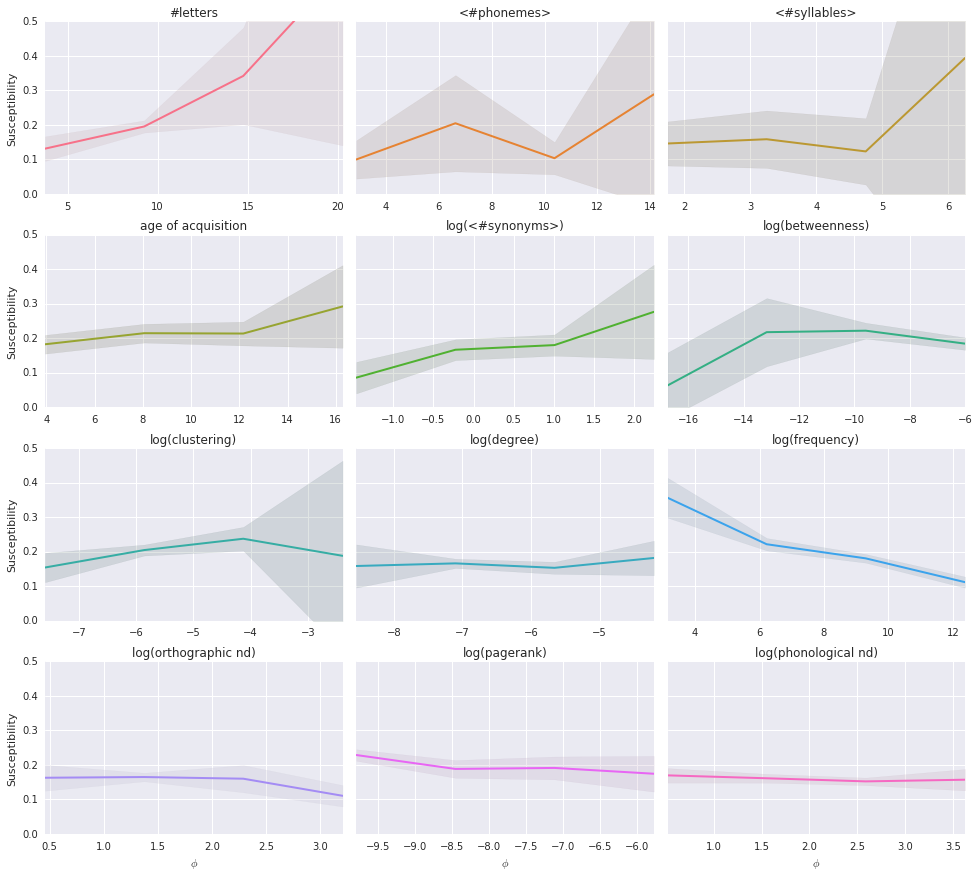

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

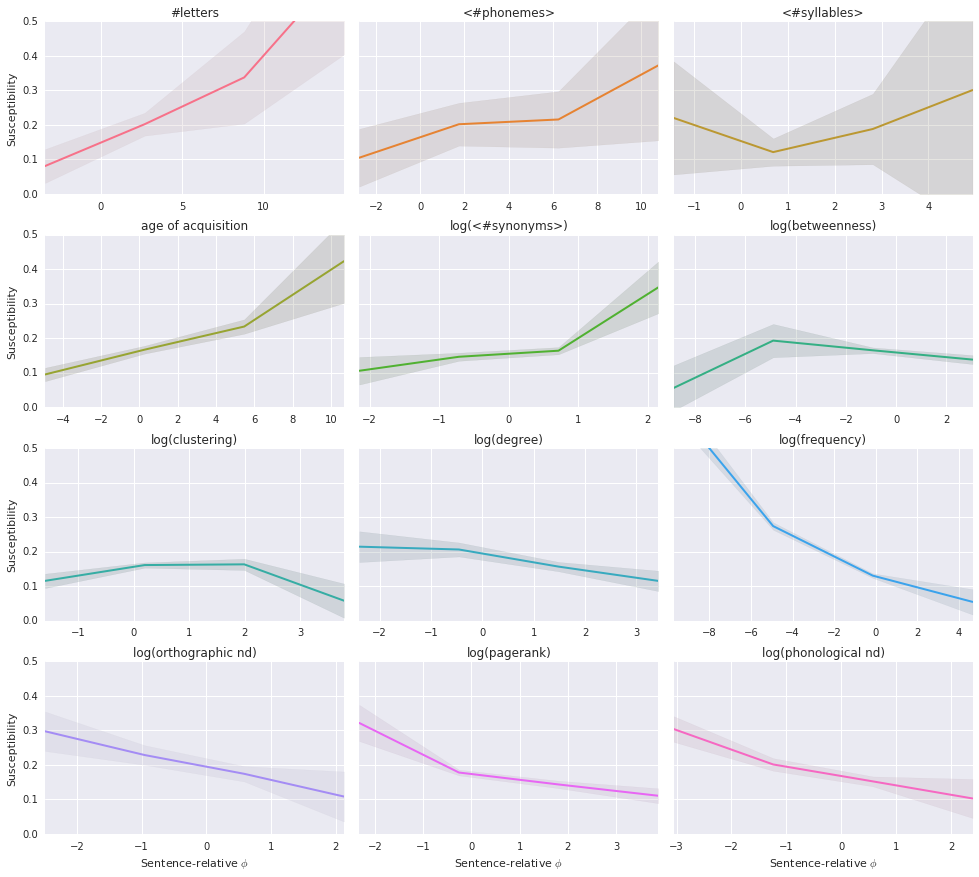

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

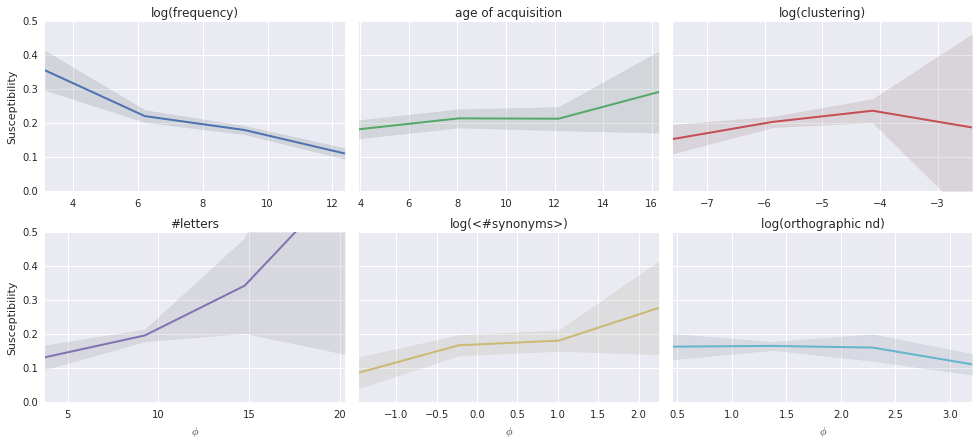

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

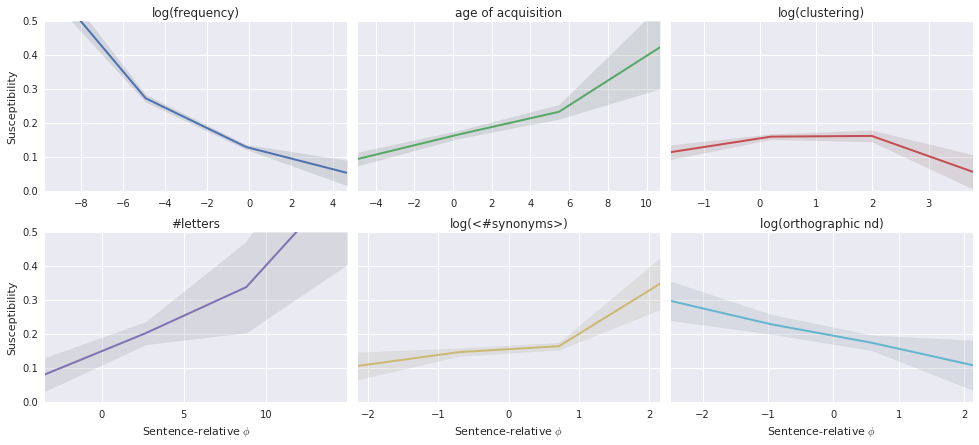

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

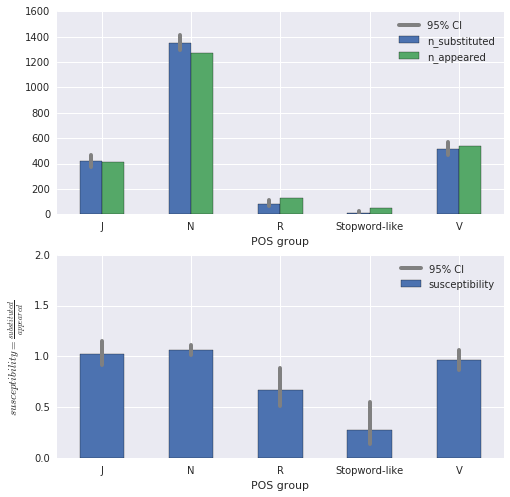

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

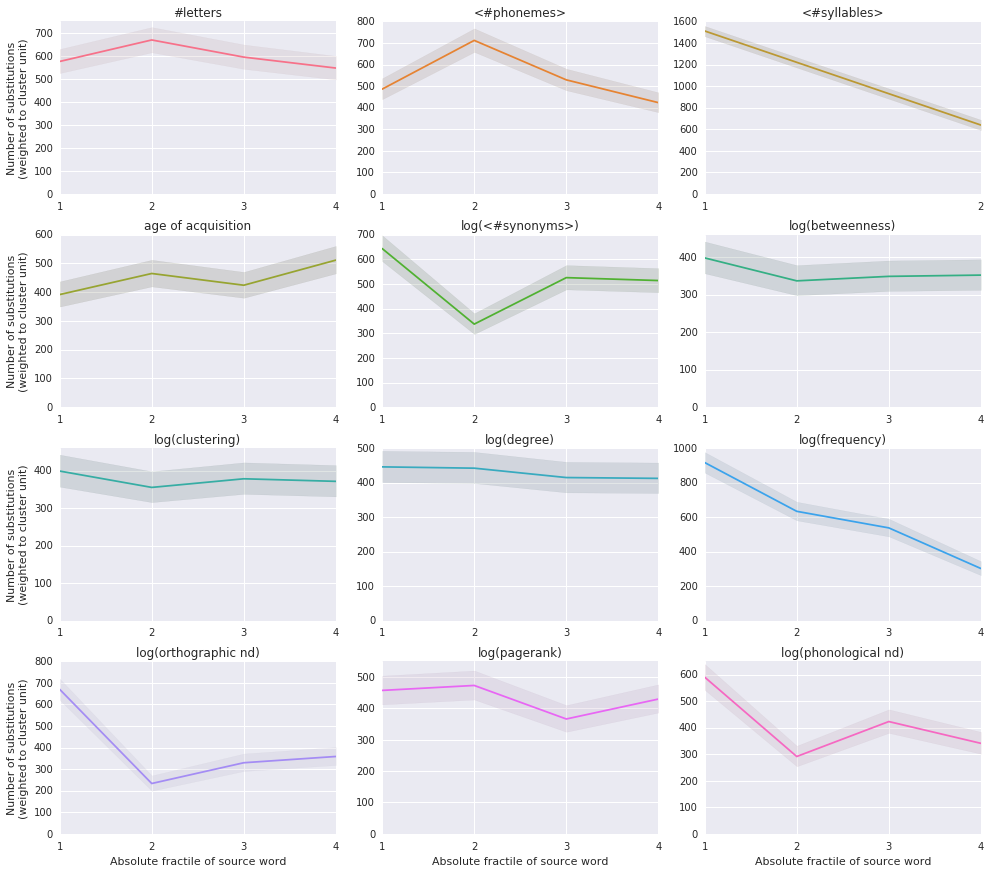

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

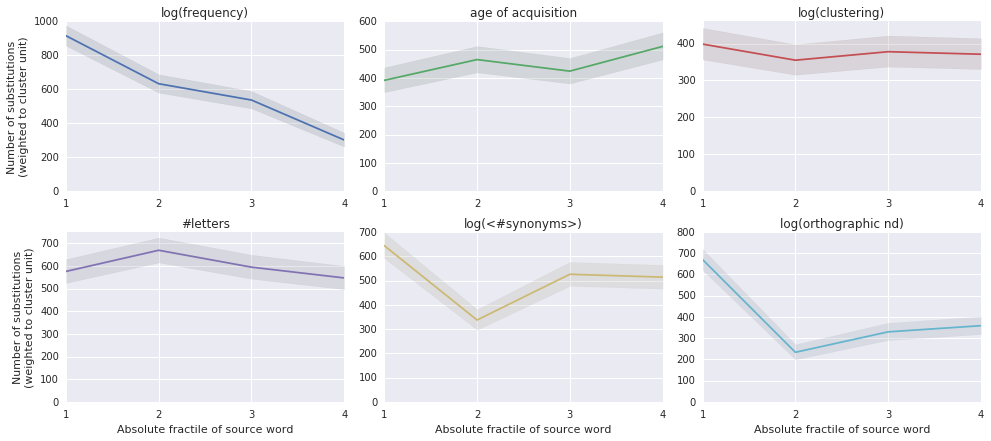

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (    1 of 90911) |             | Elapsed Time: 0:00:01 ETA:  1 day, 1:55:18

  0% (    9 of 90911) |                    | Elapsed Time: 0:00:02 ETA:  3:34:19

  0% (   16 of 90911) |                    | Elapsed Time: 0:00:03 ETA:  3:36:32

  0% (   33 of 90911) |                    | Elapsed Time: 0:00:04 ETA:  2:29:10

  0% (   56 of 90911) |                    | Elapsed Time: 0:00:05 ETA:  1:57:08

  0% (   80 of 90911) |                    | Elapsed Time: 0:00:06 ETA:  1:40:59

  0% (  108 of 90911) |                    | Elapsed Time: 0:00:07 ETA:  1:29:10

  0% (  127 of 90911) |                    | Elapsed Time: 0:00:08 ETA:  1:27:45

  0% (  140 of 90911) |                    | Elapsed Time: 0:00:09 ETA:  1:30:41

  0% (  162 of 90911) |                    | Elapsed Time: 0:00:10 ETA:  1:28:27

  0% (  175 of 90911) |                    | Elapsed Time: 0:00:11 ETA:  1:24:40

  0% (  194 of 90911) |                    | Elapsed Time: 0:00:12 ETA:  1:19:05

  0% (  217 of 90911) |                    | Elapsed Time: 0:00:13 ETA:  1:16:38

  0% (  233 of 90911) |                    | Elapsed Time: 0:00:14 ETA:  1:18:55

  0% (  242 of 90911) |                    | Elapsed Time: 0:00:15 ETA:  1:26:31

  0% (  263 of 90911) |                    | Elapsed Time: 0:00:16 ETA:  1:30:42

  0% (  279 of 90911) |                    | Elapsed Time: 0:00:17 ETA:  1:32:41

  0% (  304 of 90911) |                    | Elapsed Time: 0:00:18 ETA:  1:25:59

  0% (  330 of 90911) |                    | Elapsed Time: 0:00:19 ETA:  1:23:12

  0% (  360 of 90911) |                    | Elapsed Time: 0:00:20 ETA:  1:15:39

  0% (  377 of 90911) |                    | Elapsed Time: 0:00:21 ETA:  1:16:27

  0% (  414 of 90911) |                    | Elapsed Time: 0:00:22 ETA:  1:10:48

  0% (  459 of 90911) |                    | Elapsed Time: 0:00:23 ETA:  1:01:46

  0% (  501 of 90911) |                    | Elapsed Time: 0:00:24 ETA:  0:53:36

  0% (  541 of 90911) |                    | Elapsed Time: 0:00:25 ETA:  0:49:41

  0% (  589 of 90911) |                    | Elapsed Time: 0:00:26 ETA:  0:44:28

  0% (  627 of 90911) |                    | Elapsed Time: 0:00:27 ETA:  0:42:33

  0% (  670 of 90911) |                    | Elapsed Time: 0:00:28 ETA:  0:40:25

  0% (  727 of 90911) |                    | Elapsed Time: 0:00:29 ETA:  0:37:18

  0% (  786 of 90911) |                    | Elapsed Time: 0:00:30 ETA:  0:33:26

  0% (  830 of 90911) |                    | Elapsed Time: 0:00:31 ETA:  0:32:58

  0% (  879 of 90911) |                    | Elapsed Time: 0:00:32 ETA:  0:32:31

  1% (  923 of 90911) |                    | Elapsed Time: 0:00:33 ETA:  0:32:21

  1% (  969 of 90911) |                    | Elapsed Time: 0:00:34 ETA:  0:31:48

  1% ( 1020 of 90911) |                    | Elapsed Time: 0:00:35 ETA:  0:31:32

  1% ( 1066 of 90911) |                    | Elapsed Time: 0:00:37 ETA:  0:30:56

  1% ( 1105 of 90911) |                    | Elapsed Time: 0:00:38 ETA:  0:31:10

  1% ( 1137 of 90911) |                    | Elapsed Time: 0:00:38 ETA:  0:32:17

  1% ( 1187 of 90911) |                    | Elapsed Time: 0:00:39 ETA:  0:32:54

  1% ( 1232 of 90911) |                    | Elapsed Time: 0:00:40 ETA:  0:32:48

  1% ( 1274 of 90911) |                    | Elapsed Time: 0:00:41 ETA:  0:33:27

  1% ( 1322 of 90911) |                    | Elapsed Time: 0:00:42 ETA:  0:33:08

  1% ( 1360 of 90911) |                    | Elapsed Time: 0:00:43 ETA:  0:33:51

  1% ( 1410 of 90911) |                    | Elapsed Time: 0:00:44 ETA:  0:33:58

  1% ( 1480 of 90911) |                    | Elapsed Time: 0:00:45 ETA:  0:31:53

  1% ( 1533 of 90911) |                    | Elapsed Time: 0:00:46 ETA:  0:30:47

  1% ( 1591 of 90911) |                    | Elapsed Time: 0:00:47 ETA:  0:29:41

  1% ( 1644 of 90911) |                    | Elapsed Time: 0:00:48 ETA:  0:29:27

  1% ( 1713 of 90911) |                    | Elapsed Time: 0:00:49 ETA:  0:27:53

  1% ( 1770 of 90911) |                    | Elapsed Time: 0:00:51 ETA:  0:27:03

  1% ( 1802 of 90911) |                    | Elapsed Time: 0:00:52 ETA:  0:28:09

  2% ( 1819 of 90911) |                    | Elapsed Time: 0:00:53 ETA:  0:29:28

  2% ( 1832 of 90911) |                    | Elapsed Time: 0:00:54 ETA:  0:32:08

  2% ( 1838 of 90911) |                    | Elapsed Time: 0:00:55 ETA:  0:38:50

  2% ( 1843 of 90911) |                    | Elapsed Time: 0:00:56 ETA:  0:45:14

  2% ( 1855 of 90911) |                    | Elapsed Time: 0:00:57 ETA:  0:53:57

  2% ( 1860 of 90911) |                    | Elapsed Time: 0:00:58 ETA:  1:06:32

  2% ( 1866 of 90911) |                    | Elapsed Time: 0:00:59 ETA:  1:35:07

  2% ( 1870 of 90911) |                    | Elapsed Time: 0:01:00 ETA:  2:28:03

  2% ( 1874 of 90911) |                    | Elapsed Time: 0:01:02 ETA:  3:30:30

  2% ( 1884 of 90911) |                    | Elapsed Time: 0:01:03 ETA:  3:52:54

  2% ( 1889 of 90911) |                    | Elapsed Time: 0:01:04 ETA:  4:28:26

  2% ( 1894 of 90911) |                    | Elapsed Time: 0:01:05 ETA:  4:31:10

  2% ( 1898 of 90911) |                    | Elapsed Time: 0:01:06 ETA:  4:41:55

  2% ( 1903 of 90911) |                    | Elapsed Time: 0:01:08 ETA:  5:32:21

  2% ( 1916 of 90911) |                    | Elapsed Time: 0:01:09 ETA:  4:45:15

  2% ( 1924 of 90911) |                    | Elapsed Time: 0:01:10 ETA:  4:36:38

  2% ( 1931 of 90911) |                    | Elapsed Time: 0:01:11 ETA:  4:21:30

  2% ( 1950 of 90911) |                    | Elapsed Time: 0:01:12 ETA:  3:24:12

  2% ( 1964 of 90911) |                    | Elapsed Time: 0:01:13 ETA:  3:13:55

  2% ( 1988 of 90911) |                    | Elapsed Time: 0:01:14 ETA:  2:35:21

  2% ( 2013 of 90911) |                    | Elapsed Time: 0:01:15 ETA:  2:08:01

  2% ( 2040 of 90911) |                    | Elapsed Time: 0:01:16 ETA:  1:44:29

  2% ( 2077 of 90911) |                    | Elapsed Time: 0:01:17 ETA:  1:21:32

  2% ( 2090 of 90911) |                    | Elapsed Time: 0:01:18 ETA:  1:21:35

  2% ( 2094 of 90911) |                    | Elapsed Time: 0:01:19 ETA:  1:22:45

  2% ( 2098 of 90911) |                    | Elapsed Time: 0:01:20 ETA:  1:25:06

  2% ( 2101 of 90911) |                    | Elapsed Time: 0:01:22 ETA:  1:34:45

  2% ( 2105 of 90911) |                    | Elapsed Time: 0:01:23 ETA:  1:44:43

  2% ( 2110 of 90911) |                    | Elapsed Time: 0:01:24 ETA:  2:00:33

  2% ( 2148 of 90911) |                    | Elapsed Time: 0:01:25 ETA:  1:48:26

  2% ( 2177 of 90911) |                    | Elapsed Time: 0:01:26 ETA:  1:46:40

  2% ( 2185 of 90911) |                    | Elapsed Time: 0:01:27 ETA:  2:15:42

  2% ( 2190 of 90911) |                    | Elapsed Time: 0:01:28 ETA:  2:26:26

  2% ( 2194 of 90911) |                    | Elapsed Time: 0:01:29 ETA:  2:26:13

  2% ( 2205 of 90911) |                    | Elapsed Time: 0:01:30 ETA:  2:15:18

  2% ( 2211 of 90911) |                    | Elapsed Time: 0:01:31 ETA:  2:11:33

  2% ( 2215 of 90911) |                    | Elapsed Time: 0:01:32 ETA:  2:08:39

  2% ( 2220 of 90911) |                    | Elapsed Time: 0:01:33 ETA:  2:11:06

  2% ( 2225 of 90911) |                    | Elapsed Time: 0:01:35 ETA:  3:12:55

  2% ( 2240 of 90911) |                    | Elapsed Time: 0:01:36 ETA:  3:57:26

  2% ( 2246 of 90911) |                    | Elapsed Time: 0:01:37 ETA:  4:05:54

  2% ( 2251 of 90911) |                    | Elapsed Time: 0:01:38 ETA:  4:05:44

  2% ( 2260 of 90911) |                    | Elapsed Time: 0:01:39 ETA:  3:47:02

  2% ( 2269 of 90911) |                    | Elapsed Time: 0:01:40 ETA:  3:54:12

  2% ( 2273 of 90911) |                    | Elapsed Time: 0:01:41 ETA:  3:55:20

  2% ( 2280 of 90911) |                    | Elapsed Time: 0:01:42 ETA:  3:43:19

  2% ( 2313 of 90911) |                    | Elapsed Time: 0:01:43 ETA:  2:33:22

  2% ( 2352 of 90911) |                    | Elapsed Time: 0:01:44 ETA:  1:48:56

  2% ( 2388 of 90911) |                    | Elapsed Time: 0:01:45 ETA:  1:32:49

  2% ( 2431 of 90911) |                    | Elapsed Time: 0:01:46 ETA:  1:13:36

  2% ( 2496 of 90911) |                    | Elapsed Time: 0:01:47 ETA:  0:54:46

  2% ( 2564 of 90911) |                    | Elapsed Time: 0:01:48 ETA:  0:43:35

  2% ( 2633 of 90911) |                    | Elapsed Time: 0:01:49 ETA:  0:35:35

  2% ( 2696 of 90911) |                    | Elapsed Time: 0:01:50 ETA:  0:31:03

  3% ( 2768 of 90911) |                    | Elapsed Time: 0:01:51 ETA:  0:26:33

  3% ( 2844 of 90911) |                    | Elapsed Time: 0:01:52 ETA:  0:24:06

  3% ( 2916 of 90911) |                    | Elapsed Time: 0:01:53 ETA:  0:22:32

  3% ( 2993 of 90911) |                    | Elapsed Time: 0:01:54 ETA:  0:20:50

  3% ( 3069 of 90911) |                    | Elapsed Time: 0:01:55 ETA:  0:19:38

  3% ( 3138 of 90911) |                    | Elapsed Time: 0:01:56 ETA:  0:19:28

  3% ( 3210 of 90911) |                    | Elapsed Time: 0:01:57 ETA:  0:19:17

  3% ( 3284 of 90911) |                    | Elapsed Time: 0:01:58 ETA:  0:19:07

  3% ( 3350 of 90911) |                    | Elapsed Time: 0:01:59 ETA:  0:18:59

  3% ( 3396 of 90911) |                    | Elapsed Time: 0:02:00 ETA:  0:19:50

  3% ( 3410 of 90911) |                    | Elapsed Time: 0:02:01 ETA:  0:20:30

  3% ( 3454 of 90911) |                    | Elapsed Time: 0:02:02 ETA:  0:21:38

  3% ( 3489 of 90911) |                    | Elapsed Time: 0:02:03 ETA:  0:23:35

  3% ( 3559 of 90911) |                    | Elapsed Time: 0:02:04 ETA:  0:23:53

  3% ( 3626 of 90911) |                    | Elapsed Time: 0:02:05 ETA:  0:23:59

  4% ( 3692 of 90911) |                    | Elapsed Time: 0:02:06 ETA:  0:24:19

  4% ( 3744 of 90911) |                    | Elapsed Time: 0:02:07 ETA:  0:25:43

  4% ( 3792 of 90911) |                    | Elapsed Time: 0:02:08 ETA:  0:26:50

  4% ( 3860 of 90911) |                    | Elapsed Time: 0:02:09 ETA:  0:25:26

  4% ( 3960 of 90911) |                    | Elapsed Time: 0:02:10 ETA:  0:22:52

  4% ( 4092 of 90911) |                    | Elapsed Time: 0:02:11 ETA:  0:19:24

  4% ( 4226 of 90911) |                    | Elapsed Time: 0:02:12 ETA:  0:16:29

  4% ( 4357 of 90911) |                    | Elapsed Time: 0:02:13 ETA:  0:15:02

  4% ( 4482 of 90911) |                    | Elapsed Time: 0:02:14 ETA:  0:13:50

  5% ( 4546 of 90911) |#                   | Elapsed Time: 0:02:14 ETA:  0:13:06

  5% ( 4675 of 90911) |#                   | Elapsed Time: 0:02:15 ETA:  0:11:44

  5% ( 4800 of 90911) |#                   | Elapsed Time: 0:02:16 ETA:  0:10:39

  5% ( 4917 of 90911) |#                   | Elapsed Time: 0:02:17 ETA:  0:10:02

  5% ( 5031 of 90911) |#                   | Elapsed Time: 0:02:18 ETA:  0:09:52

  5% ( 5147 of 90911) |#                   | Elapsed Time: 0:02:19 ETA:  0:10:02

  5% ( 5286 of 90911) |#                   | Elapsed Time: 0:02:20 ETA:  0:09:57

  5% ( 5420 of 90911) |#                   | Elapsed Time: 0:02:21 ETA:  0:09:54

  6% ( 5530 of 90911) |#                   | Elapsed Time: 0:02:22 ETA:  0:10:04

  6% ( 5603 of 90911) |#                   | Elapsed Time: 0:02:23 ETA:  0:10:34

  6% ( 5682 of 90911) |#                   | Elapsed Time: 0:02:24 ETA:  0:11:31

  6% ( 5759 of 90911) |#                   | Elapsed Time: 0:02:25 ETA:  0:12:09

  6% ( 5836 of 90911) |#                   | Elapsed Time: 0:02:26 ETA:  0:12:48

  6% ( 5917 of 90911) |#                   | Elapsed Time: 0:02:27 ETA:  0:13:30

  6% ( 5997 of 90911) |#                   | Elapsed Time: 0:02:28 ETA:  0:14:48

  6% ( 6078 of 90911) |#                   | Elapsed Time: 0:02:29 ETA:  0:16:12

  6% ( 6161 of 90911) |#                   | Elapsed Time: 0:02:30 ETA:  0:16:58

  6% ( 6239 of 90911) |#                   | Elapsed Time: 0:02:31 ETA:  0:16:47

  6% ( 6316 of 90911) |#                   | Elapsed Time: 0:02:32 ETA:  0:16:42

  7% ( 6402 of 90911) |#                   | Elapsed Time: 0:02:33 ETA:  0:16:29

  7% ( 6482 of 90911) |#                   | Elapsed Time: 0:02:34 ETA:  0:16:24

  7% ( 6564 of 90911) |#                   | Elapsed Time: 0:02:35 ETA:  0:16:14

  7% ( 6652 of 90911) |#                   | Elapsed Time: 0:02:36 ETA:  0:16:03

  7% ( 6734 of 90911) |#                   | Elapsed Time: 0:02:37 ETA:  0:16:01

  7% ( 6819 of 90911) |#                   | Elapsed Time: 0:02:38 ETA:  0:15:50

  7% ( 6910 of 90911) |#                   | Elapsed Time: 0:02:39 ETA:  0:15:36

  7% ( 6995 of 90911) |#                   | Elapsed Time: 0:02:40 ETA:  0:15:26

  7% ( 7081 of 90911) |#                   | Elapsed Time: 0:02:41 ETA:  0:15:11

  7% ( 7164 of 90911) |#                   | Elapsed Time: 0:02:42 ETA:  0:15:15

  7% ( 7241 of 90911) |#                   | Elapsed Time: 0:02:43 ETA:  0:15:18

  8% ( 7322 of 90911) |#                   | Elapsed Time: 0:02:44 ETA:  0:15:18

  8% ( 7408 of 90911) |#                   | Elapsed Time: 0:02:45 ETA:  0:15:21

  8% ( 7496 of 90911) |#                   | Elapsed Time: 0:02:46 ETA:  0:15:10

  8% ( 7580 of 90911) |#                   | Elapsed Time: 0:02:47 ETA:  0:15:14

  8% ( 7682 of 90911) |#                   | Elapsed Time: 0:02:48 ETA:  0:14:58

  8% ( 7779 of 90911) |#                   | Elapsed Time: 0:02:49 ETA:  0:14:41

  8% ( 7855 of 90911) |#                   | Elapsed Time: 0:02:50 ETA:  0:14:54

  8% ( 7931 of 90911) |#                   | Elapsed Time: 0:02:51 ETA:  0:15:02

  8% ( 7955 of 90911) |#                   | Elapsed Time: 0:02:52 ETA:  0:14:52

  8% ( 8035 of 90911) |#                   | Elapsed Time: 0:02:53 ETA:  0:14:52

  8% ( 8118 of 90911) |#                   | Elapsed Time: 0:02:54 ETA:  0:14:54

  9% ( 8204 of 90911) |#                   | Elapsed Time: 0:02:55 ETA:  0:14:56

  9% ( 8310 of 90911) |#                   | Elapsed Time: 0:02:56 ETA:  0:14:23

  9% ( 8421 of 90911) |#                   | Elapsed Time: 0:02:57 ETA:  0:14:10

  9% ( 8516 of 90911) |#                   | Elapsed Time: 0:02:58 ETA:  0:14:11

  9% ( 8614 of 90911) |#                   | Elapsed Time: 0:02:59 ETA:  0:13:40

  9% ( 8701 of 90911) |#                   | Elapsed Time: 0:03:00 ETA:  0:13:25

  9% ( 8787 of 90911) |#                   | Elapsed Time: 0:03:01 ETA:  0:13:27

  9% ( 8872 of 90911) |#                   | Elapsed Time: 0:03:02 ETA:  0:13:21

  9% ( 8954 of 90911) |#                   | Elapsed Time: 0:03:03 ETA:  0:13:22

  9% ( 9034 of 90911) |#                   | Elapsed Time: 0:03:04 ETA:  0:13:27

 10% ( 9092 of 90911) |##                  | Elapsed Time: 0:03:05 ETA:  0:13:53

 10% ( 9186 of 90911) |##                  | Elapsed Time: 0:03:06 ETA:  0:14:15

 10% ( 9305 of 90911) |##                  | Elapsed Time: 0:03:07 ETA:  0:13:42

 10% ( 9424 of 90911) |##                  | Elapsed Time: 0:03:08 ETA:  0:13:14

 10% ( 9556 of 90911) |##                  | Elapsed Time: 0:03:09 ETA:  0:12:22

 10% ( 9667 of 90911) |##                  | Elapsed Time: 0:03:10 ETA:  0:11:55

 10% ( 9783 of 90911) |##                  | Elapsed Time: 0:03:11 ETA:  0:11:22

 10% ( 9889 of 90911) |##                  | Elapsed Time: 0:03:12 ETA:  0:10:59

 10% ( 9978 of 90911) |##                  | Elapsed Time: 0:03:13 ETA:  0:10:51

 11% (10069 of 90911) |##                  | Elapsed Time: 0:03:14 ETA:  0:10:49

 11% (10160 of 90911) |##                  | Elapsed Time: 0:03:15 ETA:  0:10:51

 11% (10228 of 90911) |##                  | Elapsed Time: 0:03:15 ETA:  0:11:14

 11% (10322 of 90911) |##                  | Elapsed Time: 0:03:16 ETA:  0:11:37

 11% (10415 of 90911) |##                  | Elapsed Time: 0:03:17 ETA:  0:12:16

 11% (10509 of 90911) |##                  | Elapsed Time: 0:03:18 ETA:  0:12:34

 11% (10599 of 90911) |##                  | Elapsed Time: 0:03:19 ETA:  0:13:03

 11% (10690 of 90911) |##                  | Elapsed Time: 0:03:20 ETA:  0:13:21

 11% (10782 of 90911) |##                  | Elapsed Time: 0:03:21 ETA:  0:13:16

 11% (10871 of 90911) |##                  | Elapsed Time: 0:03:22 ETA:  0:13:17

 12% (10960 of 90911) |##                  | Elapsed Time: 0:03:23 ETA:  0:13:18

 12% (11047 of 90911) |##                  | Elapsed Time: 0:03:24 ETA:  0:13:20

 12% (11135 of 90911) |##                  | Elapsed Time: 0:03:25 ETA:  0:13:27

 12% (11226 of 90911) |##                  | Elapsed Time: 0:03:26 ETA:  0:13:28

 12% (11312 of 90911) |##                  | Elapsed Time: 0:03:27 ETA:  0:13:38

 12% (11364 of 90911) |##                  | Elapsed Time: 0:03:28 ETA:  0:13:44

 12% (11456 of 90911) |##                  | Elapsed Time: 0:03:29 ETA:  0:13:41

 12% (11547 of 90911) |##                  | Elapsed Time: 0:03:30 ETA:  0:13:41

 12% (11636 of 90911) |##                  | Elapsed Time: 0:03:31 ETA:  0:13:40

 12% (11727 of 90911) |##                  | Elapsed Time: 0:03:32 ETA:  0:13:37

 12% (11818 of 90911) |##                  | Elapsed Time: 0:03:33 ETA:  0:13:31

 13% (11911 of 90911) |##                  | Elapsed Time: 0:03:34 ETA:  0:13:24

 13% (12005 of 90911) |##                  | Elapsed Time: 0:03:35 ETA:  0:13:18

 13% (12095 of 90911) |##                  | Elapsed Time: 0:03:36 ETA:  0:13:12

 13% (12196 of 90911) |##                  | Elapsed Time: 0:03:37 ETA:  0:12:52

 13% (12298 of 90911) |##                  | Elapsed Time: 0:03:38 ETA:  0:12:39

 13% (12404 of 90911) |##                  | Elapsed Time: 0:03:39 ETA:  0:12:21

 13% (12501 of 90911) |##                  | Elapsed Time: 0:03:40 ETA:  0:12:11

 13% (12601 of 90911) |##                  | Elapsed Time: 0:03:41 ETA:  0:11:59

 13% (12702 of 90911) |##                  | Elapsed Time: 0:03:42 ETA:  0:11:47

 14% (12790 of 90911) |##                  | Elapsed Time: 0:03:43 ETA:  0:11:51

 14% (12901 of 90911) |##                  | Elapsed Time: 0:03:44 ETA:  0:11:32

 14% (13008 of 90911) |##                  | Elapsed Time: 0:03:45 ETA:  0:11:13

 14% (13112 of 90911) |##                  | Elapsed Time: 0:03:46 ETA:  0:11:10

 14% (13216 of 90911) |##                  | Elapsed Time: 0:03:47 ETA:  0:11:06

 14% (13310 of 90911) |##                  | Elapsed Time: 0:03:48 ETA:  0:11:17

 14% (13412 of 90911) |##                  | Elapsed Time: 0:03:49 ETA:  0:11:11

 14% (13499 of 90911) |##                  | Elapsed Time: 0:03:50 ETA:  0:11:24

 14% (13583 of 90911) |##                  | Elapsed Time: 0:03:51 ETA:  0:11:42

 15% (13637 of 90911) |###                 | Elapsed Time: 0:03:52 ETA:  0:11:40

 15% (13722 of 90911) |###                 | Elapsed Time: 0:03:53 ETA:  0:12:09

 15% (13807 of 90911) |###                 | Elapsed Time: 0:03:54 ETA:  0:12:35

 15% (13896 of 90911) |###                 | Elapsed Time: 0:03:55 ETA:  0:12:53

 15% (13989 of 90911) |###                 | Elapsed Time: 0:03:56 ETA:  0:13:07

 15% (14083 of 90911) |###                 | Elapsed Time: 0:03:57 ETA:  0:13:06

 15% (14179 of 90911) |###                 | Elapsed Time: 0:03:58 ETA:  0:13:13

 15% (14274 of 90911) |###                 | Elapsed Time: 0:03:59 ETA:  0:13:01

 15% (14371 of 90911) |###                 | Elapsed Time: 0:04:00 ETA:  0:12:42

 15% (14462 of 90911) |###                 | Elapsed Time: 0:04:01 ETA:  0:12:37

 16% (14556 of 90911) |###                 | Elapsed Time: 0:04:02 ETA:  0:12:25

 16% (14650 of 90911) |###                 | Elapsed Time: 0:04:03 ETA:  0:12:12

 16% (14748 of 90911) |###                 | Elapsed Time: 0:04:04 ETA:  0:12:01

 16% (14774 of 90911) |###                 | Elapsed Time: 0:04:04 ETA:  0:11:56

 16% (14871 of 90911) |###                 | Elapsed Time: 0:04:05 ETA:  0:11:52

 16% (14971 of 90911) |###                 | Elapsed Time: 0:04:06 ETA:  0:11:46

 16% (15070 of 90911) |###                 | Elapsed Time: 0:04:07 ETA:  0:11:40

 16% (15171 of 90911) |###                 | Elapsed Time: 0:04:08 ETA:  0:11:33

 16% (15269 of 90911) |###                 | Elapsed Time: 0:04:09 ETA:  0:11:24

 16% (15365 of 90911) |###                 | Elapsed Time: 0:04:10 ETA:  0:11:20

 17% (15462 of 90911) |###                 | Elapsed Time: 0:04:11 ETA:  0:11:16

 17% (15560 of 90911) |###                 | Elapsed Time: 0:04:12 ETA:  0:11:16

 17% (15658 of 90911) |###                 | Elapsed Time: 0:04:13 ETA:  0:11:16

 17% (15754 of 90911) |###                 | Elapsed Time: 0:04:14 ETA:  0:11:16

 17% (15852 of 90911) |###                 | Elapsed Time: 0:04:15 ETA:  0:11:17

 17% (15910 of 90911) |###                 | Elapsed Time: 0:04:16 ETA:  0:11:23

 17% (16006 of 90911) |###                 | Elapsed Time: 0:04:17 ETA:  0:11:27

 17% (16105 of 90911) |###                 | Elapsed Time: 0:04:18 ETA:  0:11:26

 17% (16204 of 90911) |###                 | Elapsed Time: 0:04:19 ETA:  0:11:22

 17% (16302 of 90911) |###                 | Elapsed Time: 0:04:20 ETA:  0:11:19

 18% (16399 of 90911) |###                 | Elapsed Time: 0:04:21 ETA:  0:11:19

 18% (16495 of 90911) |###                 | Elapsed Time: 0:04:22 ETA:  0:11:20

 18% (16592 of 90911) |###                 | Elapsed Time: 0:04:23 ETA:  0:11:19

 18% (16673 of 90911) |###                 | Elapsed Time: 0:04:24 ETA:  0:11:37

 18% (16772 of 90911) |###                 | Elapsed Time: 0:04:25 ETA:  0:11:29

 18% (16873 of 90911) |###                 | Elapsed Time: 0:04:26 ETA:  0:11:22

 18% (16974 of 90911) |###                 | Elapsed Time: 0:04:27 ETA:  0:11:19

 18% (17046 of 90911) |###                 | Elapsed Time: 0:04:28 ETA:  0:11:18

 18% (17145 of 90911) |###                 | Elapsed Time: 0:04:29 ETA:  0:11:17

 18% (17245 of 90911) |###                 | Elapsed Time: 0:04:30 ETA:  0:11:13

 19% (17345 of 90911) |###                 | Elapsed Time: 0:04:31 ETA:  0:11:07

 19% (17449 of 90911) |###                 | Elapsed Time: 0:04:32 ETA:  0:10:59

 19% (17553 of 90911) |###                 | Elapsed Time: 0:04:33 ETA:  0:10:33

 19% (17654 of 90911) |###                 | Elapsed Time: 0:04:34 ETA:  0:10:30

 19% (17757 of 90911) |###                 | Elapsed Time: 0:04:35 ETA:  0:10:27

 19% (17857 of 90911) |###                 | Elapsed Time: 0:04:36 ETA:  0:10:27

 19% (17958 of 90911) |###                 | Elapsed Time: 0:04:37 ETA:  0:10:24

 19% (18051 of 90911) |###                 | Elapsed Time: 0:04:38 ETA:  0:10:29

 19% (18147 of 90911) |###                 | Elapsed Time: 0:04:39 ETA:  0:10:32

 20% (18183 of 90911) |####                | Elapsed Time: 0:04:39 ETA:  0:10:33

 20% (18283 of 90911) |####                | Elapsed Time: 0:04:40 ETA:  0:10:37

 20% (18384 of 90911) |####                | Elapsed Time: 0:04:41 ETA:  0:10:38

 20% (18484 of 90911) |####                | Elapsed Time: 0:04:42 ETA:  0:10:38

 20% (18584 of 90911) |####                | Elapsed Time: 0:04:43 ETA:  0:10:40

 20% (18686 of 90911) |####                | Elapsed Time: 0:04:44 ETA:  0:10:38

 20% (18786 of 90911) |####                | Elapsed Time: 0:04:45 ETA:  0:10:39

 20% (18885 of 90911) |####                | Elapsed Time: 0:04:46 ETA:  0:10:32

 20% (18986 of 90911) |####                | Elapsed Time: 0:04:47 ETA:  0:10:25

 20% (19085 of 90911) |####                | Elapsed Time: 0:04:48 ETA:  0:10:23

 21% (19185 of 90911) |####                | Elapsed Time: 0:04:49 ETA:  0:10:21

 21% (19269 of 90911) |####                | Elapsed Time: 0:04:50 ETA:  0:10:38

 21% (19319 of 90911) |####                | Elapsed Time: 0:04:51 ETA:  0:10:45

 21% (19401 of 90911) |####                | Elapsed Time: 0:04:52 ETA:  0:11:05

 21% (19483 of 90911) |####                | Elapsed Time: 0:04:53 ETA:  0:11:29

 21% (19565 of 90911) |####                | Elapsed Time: 0:04:54 ETA:  0:11:49

 21% (19647 of 90911) |####                | Elapsed Time: 0:04:55 ETA:  0:12:11

 21% (19727 of 90911) |####                | Elapsed Time: 0:04:56 ETA:  0:12:39

 21% (19818 of 90911) |####                | Elapsed Time: 0:04:57 ETA:  0:12:50

 21% (19919 of 90911) |####                | Elapsed Time: 0:04:58 ETA:  0:12:47

 22% (20017 of 90911) |####                | Elapsed Time: 0:04:59 ETA:  0:12:26

 22% (20109 of 90911) |####                | Elapsed Time: 0:05:00 ETA:  0:12:20

 22% (20204 of 90911) |####                | Elapsed Time: 0:05:01 ETA:  0:12:02

 22% (20299 of 90911) |####                | Elapsed Time: 0:05:02 ETA:  0:11:45

 22% (20366 of 90911) |####                | Elapsed Time: 0:05:03 ETA:  0:12:03

 22% (20439 of 90911) |####                | Elapsed Time: 0:05:04 ETA:  0:12:14

 22% (20455 of 90911) |####                | Elapsed Time: 0:05:04 ETA:  0:12:06

 22% (20532 of 90911) |####                | Elapsed Time: 0:05:05 ETA:  0:12:25

 22% (20608 of 90911) |####                | Elapsed Time: 0:05:06 ETA:  0:13:03

 22% (20696 of 90911) |####                | Elapsed Time: 0:05:07 ETA:  0:13:19

 22% (20742 of 90911) |####                | Elapsed Time: 0:05:32 ETA:  1:11:30

 22% (20832 of 90911) |####                | Elapsed Time: 0:05:33 ETA:  1:12:05

 23% (20938 of 90911) |####                | Elapsed Time: 0:05:34 ETA:  1:10:44

 23% (21020 of 90911) |####                | Elapsed Time: 0:05:35 ETA:  1:08:57

 23% (21103 of 90911) |####                | Elapsed Time: 0:05:36 ETA:  1:07:51

 23% (21183 of 90911) |####                | Elapsed Time: 0:05:37 ETA:  1:03:03

 23% (21276 of 90911) |####                | Elapsed Time: 0:05:38 ETA:  1:01:33

 23% (21372 of 90911) |####                | Elapsed Time: 0:05:39 ETA:  0:59:46

 23% (21473 of 90911) |####                | Elapsed Time: 0:05:40 ETA:  0:58:41

 23% (21570 of 90911) |####                | Elapsed Time: 0:05:41 ETA:  0:10:55

 23% (21592 of 90911) |####                | Elapsed Time: 0:05:41 ETA:  0:10:51

 23% (21686 of 90911) |####                | Elapsed Time: 0:05:42 ETA:  0:11:06

 23% (21782 of 90911) |####                | Elapsed Time: 0:05:43 ETA:  0:10:46

 24% (21882 of 90911) |####                | Elapsed Time: 0:05:44 ETA:  0:10:21

 24% (21983 of 90911) |####                | Elapsed Time: 0:05:45 ETA:  0:09:55

 24% (22077 of 90911) |####                | Elapsed Time: 0:05:46 ETA:  0:09:53

 24% (22156 of 90911) |####                | Elapsed Time: 0:05:47 ETA:  0:10:12

 24% (22228 of 90911) |####                | Elapsed Time: 0:05:48 ETA:  0:10:46

 24% (22306 of 90911) |####                | Elapsed Time: 0:05:49 ETA:  0:11:11

 24% (22384 of 90911) |####                | Elapsed Time: 0:05:50 ETA:  0:11:29

 24% (22481 of 90911) |####                | Elapsed Time: 0:05:51 ETA:  0:11:24

 24% (22616 of 90911) |####                | Elapsed Time: 0:05:52 ETA:  0:10:34

 25% (22728 of 90911) |#####               | Elapsed Time: 0:05:53 ETA:  0:09:52

 25% (22849 of 90911) |#####               | Elapsed Time: 0:05:54 ETA:  0:09:28

 25% (22968 of 90911) |#####               | Elapsed Time: 0:05:55 ETA:  0:09:02

 25% (23098 of 90911) |#####               | Elapsed Time: 0:05:56 ETA:  0:08:12

 25% (23184 of 90911) |#####               | Elapsed Time: 0:05:57 ETA:  0:07:58

 25% (23268 of 90911) |#####               | Elapsed Time: 0:05:58 ETA:  0:07:52

 25% (23355 of 90911) |#####               | Elapsed Time: 0:05:59 ETA:  0:07:42

 25% (23444 of 90911) |#####               | Elapsed Time: 0:06:00 ETA:  0:07:48

 25% (23532 of 90911) |#####               | Elapsed Time: 0:06:01 ETA:  0:08:30

 25% (23612 of 90911) |#####               | Elapsed Time: 0:06:02 ETA:  0:09:27

 26% (23696 of 90911) |#####               | Elapsed Time: 0:06:03 ETA:  0:10:06

 26% (23783 of 90911) |#####               | Elapsed Time: 0:06:04 ETA:  0:10:44

 26% (23865 of 90911) |#####               | Elapsed Time: 0:06:05 ETA:  0:11:24

 26% (23983 of 90911) |#####               | Elapsed Time: 0:06:06 ETA:  0:10:41

 26% (24099 of 90911) |#####               | Elapsed Time: 0:06:07 ETA:  0:10:01

 26% (24209 of 90911) |#####               | Elapsed Time: 0:06:08 ETA:  0:09:34

 26% (24298 of 90911) |#####               | Elapsed Time: 0:06:09 ETA:  0:09:33

 26% (24389 of 90911) |#####               | Elapsed Time: 0:06:10 ETA:  0:09:29

 26% (24477 of 90911) |#####               | Elapsed Time: 0:06:11 ETA:  0:09:19

 27% (24566 of 90911) |#####               | Elapsed Time: 0:06:12 ETA:  0:09:13

 27% (24643 of 90911) |#####               | Elapsed Time: 0:06:13 ETA:  0:09:23

 27% (24718 of 90911) |#####               | Elapsed Time: 0:06:14 ETA:  0:09:50

 27% (24792 of 90911) |#####               | Elapsed Time: 0:06:15 ETA:  0:10:41

 27% (24877 of 90911) |#####               | Elapsed Time: 0:06:16 ETA:  0:11:21

 27% (24947 of 90911) |#####               | Elapsed Time: 0:06:17 ETA:  0:12:18

 27% (25001 of 90911) |#####               | Elapsed Time: 0:06:18 ETA:  0:12:18

 27% (25128 of 90911) |#####               | Elapsed Time: 0:06:19 ETA:  0:11:23

 27% (25258 of 90911) |#####               | Elapsed Time: 0:06:20 ETA:  0:10:25

 27% (25387 of 90911) |#####               | Elapsed Time: 0:06:21 ETA:  0:09:34

 28% (25514 of 90911) |#####               | Elapsed Time: 0:06:22 ETA:  0:08:38

 28% (25642 of 90911) |#####               | Elapsed Time: 0:06:23 ETA:  0:07:45

 28% (25770 of 90911) |#####               | Elapsed Time: 0:06:24 ETA:  0:06:57

 28% (25903 of 90911) |#####               | Elapsed Time: 0:06:25 ETA:  0:06:19

 28% (26035 of 90911) |#####               | Elapsed Time: 0:06:26 ETA:  0:05:33

 28% (26137 of 90911) |#####               | Elapsed Time: 0:06:26 ETA:  0:05:17

 28% (26266 of 90911) |#####               | Elapsed Time: 0:06:27 ETA:  0:05:15

 29% (26394 of 90911) |#####               | Elapsed Time: 0:06:28 ETA:  0:05:15

 29% (26493 of 90911) |#####               | Elapsed Time: 0:06:29 ETA:  0:05:33

 29% (26585 of 90911) |#####               | Elapsed Time: 0:06:30 ETA:  0:05:56

 29% (26680 of 90911) |#####               | Elapsed Time: 0:06:31 ETA:  0:06:19

 29% (26797 of 90911) |#####               | Elapsed Time: 0:06:32 ETA:  0:06:26

 29% (26914 of 90911) |#####               | Elapsed Time: 0:06:33 ETA:  0:06:37

 29% (26995 of 90911) |#####               | Elapsed Time: 0:06:34 ETA:  0:07:18

 29% (27077 of 90911) |#####               | Elapsed Time: 0:06:35 ETA:  0:07:57

 29% (27162 of 90911) |#####               | Elapsed Time: 0:06:36 ETA:  0:08:40

 29% (27251 of 90911) |#####               | Elapsed Time: 0:06:38 ETA:  0:09:21

 30% (27274 of 90911) |######              | Elapsed Time: 0:06:38 ETA:  0:09:22

 30% (27371 of 90911) |######              | Elapsed Time: 0:06:39 ETA:  0:09:15

 30% (27489 of 90911) |######              | Elapsed Time: 0:06:40 ETA:  0:08:47

 30% (27592 of 90911) |######              | Elapsed Time: 0:06:41 ETA:  0:09:02

 30% (27687 of 90911) |######              | Elapsed Time: 0:06:42 ETA:  0:09:29

 30% (27787 of 90911) |######              | Elapsed Time: 0:06:43 ETA:  0:09:04

 30% (27895 of 90911) |######              | Elapsed Time: 0:06:44 ETA:  0:08:33

 30% (27986 of 90911) |######              | Elapsed Time: 0:06:45 ETA:  0:08:24

 30% (28124 of 90911) |######              | Elapsed Time: 0:06:46 ETA:  0:07:32

 31% (28211 of 90911) |######              | Elapsed Time: 0:06:47 ETA:  0:07:49

 31% (28313 of 90911) |######              | Elapsed Time: 0:06:48 ETA:  0:07:42

 31% (28410 of 90911) |######              | Elapsed Time: 0:06:49 ETA:  0:07:52

 31% (28521 of 90911) |######              | Elapsed Time: 0:06:50 ETA:  0:07:43

 31% (28631 of 90911) |######              | Elapsed Time: 0:06:51 ETA:  0:07:28

 31% (28742 of 90911) |######              | Elapsed Time: 0:06:52 ETA:  0:07:17

 31% (28856 of 90911) |######              | Elapsed Time: 0:06:53 ETA:  0:07:11

 31% (28965 of 90911) |######              | Elapsed Time: 0:06:54 ETA:  0:06:55

 31% (29080 of 90911) |######              | Elapsed Time: 0:06:55 ETA:  0:07:14

 32% (29187 of 90911) |######              | Elapsed Time: 0:06:56 ETA:  0:06:56

 32% (29287 of 90911) |######              | Elapsed Time: 0:06:57 ETA:  0:06:57

 32% (29381 of 90911) |######              | Elapsed Time: 0:06:58 ETA:  0:07:07

 32% (29470 of 90911) |######              | Elapsed Time: 0:06:59 ETA:  0:07:27

 32% (29547 of 90911) |######              | Elapsed Time: 0:07:00 ETA:  0:07:52

 32% (29641 of 90911) |######              | Elapsed Time: 0:07:01 ETA:  0:08:09

 32% (29742 of 90911) |######              | Elapsed Time: 0:07:02 ETA:  0:08:20

 32% (29842 of 90911) |######              | Elapsed Time: 0:07:03 ETA:  0:08:30

 32% (29971 of 90911) |######              | Elapsed Time: 0:07:04 ETA:  0:08:14

 33% (30055 of 90911) |######              | Elapsed Time: 0:07:05 ETA:  0:08:37

 33% (30137 of 90911) |######              | Elapsed Time: 0:07:06 ETA:  0:08:56

 33% (30225 of 90911) |######              | Elapsed Time: 0:07:07 ETA:  0:09:02

 33% (30318 of 90911) |######              | Elapsed Time: 0:07:08 ETA:  0:08:57

 33% (30441 of 90911) |######              | Elapsed Time: 0:07:09 ETA:  0:08:10

 33% (30582 of 90911) |######              | Elapsed Time: 0:07:10 ETA:  0:07:23

 33% (30683 of 90911) |######              | Elapsed Time: 0:07:11 ETA:  0:07:21

 33% (30821 of 90911) |######              | Elapsed Time: 0:07:12 ETA:  0:06:45

 34% (30961 of 90911) |######              | Elapsed Time: 0:07:13 ETA:  0:06:34

 34% (31101 of 90911) |######              | Elapsed Time: 0:07:14 ETA:  0:05:49

 34% (31201 of 90911) |######              | Elapsed Time: 0:07:15 ETA:  0:05:35

 34% (31288 of 90911) |######              | Elapsed Time: 0:07:16 ETA:  0:05:34

 34% (31374 of 90911) |######              | Elapsed Time: 0:07:17 ETA:  0:05:39

 34% (31470 of 90911) |######              | Elapsed Time: 0:07:18 ETA:  0:05:58

 34% (31585 of 90911) |######              | Elapsed Time: 0:07:19 ETA:  0:06:18

 34% (31698 of 90911) |######              | Elapsed Time: 0:07:20 ETA:  0:06:08

 35% (31819 of 90911) |#######             | Elapsed Time: 0:07:21 ETA:  0:06:57

 35% (31927 of 90911) |#######             | Elapsed Time: 0:07:22 ETA:  0:07:30

 35% (32008 of 90911) |#######             | Elapsed Time: 0:07:23 ETA:  0:07:51

 35% (32090 of 90911) |#######             | Elapsed Time: 0:07:24 ETA:  0:07:56

 35% (32172 of 90911) |#######             | Elapsed Time: 0:07:25 ETA:  0:07:58

 35% (32262 of 90911) |#######             | Elapsed Time: 0:07:26 ETA:  0:08:05

 35% (32337 of 90911) |#######             | Elapsed Time: 0:07:27 ETA:  0:08:54

 35% (32413 of 90911) |#######             | Elapsed Time: 0:07:28 ETA:  0:09:45

 35% (32495 of 90911) |#######             | Elapsed Time: 0:07:29 ETA:  0:10:30

 35% (32600 of 90911) |#######             | Elapsed Time: 0:07:30 ETA:  0:10:05

 35% (32693 of 90911) |#######             | Elapsed Time: 0:07:31 ETA:  0:10:24

 36% (32782 of 90911) |#######             | Elapsed Time: 0:07:32 ETA:  0:10:12

 36% (32886 of 90911) |#######             | Elapsed Time: 0:07:33 ETA:  0:09:41

 36% (32956 of 90911) |#######             | Elapsed Time: 0:07:34 ETA:  0:09:25

 36% (33052 of 90911) |#######             | Elapsed Time: 0:07:35 ETA:  0:09:16

 36% (33136 of 90911) |#######             | Elapsed Time: 0:07:36 ETA:  0:09:03

 36% (33232 of 90911) |#######             | Elapsed Time: 0:07:37 ETA:  0:08:36

 36% (33318 of 90911) |#######             | Elapsed Time: 0:07:38 ETA:  0:08:30

 36% (33419 of 90911) |#######             | Elapsed Time: 0:07:39 ETA:  0:08:34

 36% (33532 of 90911) |#######             | Elapsed Time: 0:07:40 ETA:  0:08:10

 36% (33622 of 90911) |#######             | Elapsed Time: 0:07:41 ETA:  0:08:06

 37% (33711 of 90911) |#######             | Elapsed Time: 0:07:42 ETA:  0:08:23

 37% (33799 of 90911) |#######             | Elapsed Time: 0:07:43 ETA:  0:08:31

 37% (33897 of 90911) |#######             | Elapsed Time: 0:07:44 ETA:  0:08:28

 37% (33994 of 90911) |#######             | Elapsed Time: 0:07:45 ETA:  0:08:12

 37% (34092 of 90911) |#######             | Elapsed Time: 0:07:46 ETA:  0:07:59

 37% (34189 of 90911) |#######             | Elapsed Time: 0:07:47 ETA:  0:08:02

 37% (34288 of 90911) |#######             | Elapsed Time: 0:07:48 ETA:  0:08:19

 37% (34374 of 90911) |#######             | Elapsed Time: 0:07:49 ETA:  0:08:24

 37% (34461 of 90911) |#######             | Elapsed Time: 0:07:50 ETA:  0:08:26

 38% (34563 of 90911) |#######             | Elapsed Time: 0:07:51 ETA:  0:08:06

 38% (34670 of 90911) |#######             | Elapsed Time: 0:07:52 ETA:  0:07:53

 38% (34790 of 90911) |#######             | Elapsed Time: 0:07:53 ETA:  0:07:26

 38% (34873 of 90911) |#######             | Elapsed Time: 0:07:54 ETA:  0:07:42

 38% (34971 of 90911) |#######             | Elapsed Time: 0:07:55 ETA:  0:07:40

 38% (35084 of 90911) |#######             | Elapsed Time: 0:07:56 ETA:  0:07:23

 38% (35186 of 90911) |#######             | Elapsed Time: 0:07:57 ETA:  0:07:18

 38% (35229 of 90911) |#######             | Elapsed Time: 0:07:57 ETA:  0:07:01

 38% (35328 of 90911) |#######             | Elapsed Time: 0:07:58 ETA:  0:06:48

 38% (35419 of 90911) |#######             | Elapsed Time: 0:07:59 ETA:  0:06:58

 39% (35519 of 90911) |#######             | Elapsed Time: 0:08:00 ETA:  0:07:05

 39% (35601 of 90911) |#######             | Elapsed Time: 0:08:01 ETA:  0:07:46

 39% (35681 of 90911) |#######             | Elapsed Time: 0:08:02 ETA:  0:07:48

 39% (35775 of 90911) |#######             | Elapsed Time: 0:08:03 ETA:  0:07:52

 39% (35863 of 90911) |#######             | Elapsed Time: 0:08:04 ETA:  0:08:22

 39% (35947 of 90911) |#######             | Elapsed Time: 0:08:05 ETA:  0:08:45

 39% (36029 of 90911) |#######             | Elapsed Time: 0:08:06 ETA:  0:09:01

 39% (36110 of 90911) |#######             | Elapsed Time: 0:08:07 ETA:  0:09:25

 39% (36185 of 90911) |#######             | Elapsed Time: 0:08:08 ETA:  0:09:47

 39% (36260 of 90911) |#######             | Elapsed Time: 0:08:09 ETA:  0:10:22

 39% (36335 of 90911) |#######             | Elapsed Time: 0:08:10 ETA:  0:10:31

 40% (36365 of 90911) |########            | Elapsed Time: 0:08:11 ETA:  0:10:33

 40% (36439 of 90911) |########            | Elapsed Time: 0:08:12 ETA:  0:11:07

 40% (36515 of 90911) |########            | Elapsed Time: 0:08:13 ETA:  0:11:26

 40% (36590 of 90911) |########            | Elapsed Time: 0:08:14 ETA:  0:11:41

 40% (36681 of 90911) |########            | Elapsed Time: 0:08:15 ETA:  0:11:24

 40% (36761 of 90911) |########            | Elapsed Time: 0:08:16 ETA:  0:11:24

 40% (36853 of 90911) |########            | Elapsed Time: 0:08:17 ETA:  0:10:53

 40% (36961 of 90911) |########            | Elapsed Time: 0:08:18 ETA:  0:09:58

 40% (37075 of 90911) |########            | Elapsed Time: 0:08:19 ETA:  0:08:59

 40% (37179 of 90911) |########            | Elapsed Time: 0:08:20 ETA:  0:08:31

 40% (37272 of 90911) |########            | Elapsed Time: 0:08:21 ETA:  0:08:07

 41% (37378 of 90911) |########            | Elapsed Time: 0:08:22 ETA:  0:07:32

 41% (37450 of 90911) |########            | Elapsed Time: 0:08:23 ETA:  0:07:34

 41% (37501 of 90911) |########            | Elapsed Time: 0:08:23 ETA:  0:07:23

 41% (37595 of 90911) |########            | Elapsed Time: 0:08:24 ETA:  0:07:06

 41% (37690 of 90911) |########            | Elapsed Time: 0:08:25 ETA:  0:07:02

 41% (37787 of 90911) |########            | Elapsed Time: 0:08:26 ETA:  0:07:13

 41% (37883 of 90911) |########            | Elapsed Time: 0:08:27 ETA:  0:07:33

 41% (37970 of 90911) |########            | Elapsed Time: 0:08:28 ETA:  0:07:55

 41% (38045 of 90911) |########            | Elapsed Time: 0:08:29 ETA:  0:08:16

 41% (38115 of 90911) |########            | Elapsed Time: 0:08:30 ETA:  0:09:04

 42% (38196 of 90911) |########            | Elapsed Time: 0:08:31 ETA:  0:08:51

 42% (38280 of 90911) |########            | Elapsed Time: 0:08:32 ETA:  0:09:06

 42% (38360 of 90911) |########            | Elapsed Time: 0:08:33 ETA:  0:09:24

 42% (38471 of 90911) |########            | Elapsed Time: 0:08:34 ETA:  0:09:01

 42% (38638 of 90911) |########            | Elapsed Time: 0:08:35 ETA:  0:07:11

 42% (38841 of 90911) |########            | Elapsed Time: 0:08:36 ETA:  0:05:24

 42% (38985 of 90911) |########            | Elapsed Time: 0:08:37 ETA:  0:04:33

 42% (39071 of 90911) |########            | Elapsed Time: 0:08:38 ETA:  0:04:24

 43% (39155 of 90911) |########            | Elapsed Time: 0:08:39 ETA:  0:04:12

 43% (39238 of 90911) |########            | Elapsed Time: 0:08:40 ETA:  0:04:09

 43% (39321 of 90911) |########            | Elapsed Time: 0:08:41 ETA:  0:04:08

 43% (39415 of 90911) |########            | Elapsed Time: 0:08:42 ETA:  0:03:57

 43% (39501 of 90911) |########            | Elapsed Time: 0:08:43 ETA:  0:04:15

 43% (39582 of 90911) |########            | Elapsed Time: 0:08:44 ETA:  0:05:44

 43% (39660 of 90911) |########            | Elapsed Time: 0:08:45 ETA:  0:07:57

 43% (39739 of 90911) |########            | Elapsed Time: 0:08:46 ETA:  0:09:22

 43% (39774 of 90911) |########            | Elapsed Time: 0:08:47 ETA:  0:09:29

 43% (39866 of 90911) |########            | Elapsed Time: 0:08:48 ETA:  0:09:15

 43% (39971 of 90911) |########            | Elapsed Time: 0:08:49 ETA:  0:08:42

 44% (40067 of 90911) |########            | Elapsed Time: 0:08:50 ETA:  0:08:23

 44% (40154 of 90911) |########            | Elapsed Time: 0:08:51 ETA:  0:08:33

 44% (40263 of 90911) |########            | Elapsed Time: 0:08:52 ETA:  0:08:00

 44% (40325 of 90911) |########            | Elapsed Time: 0:08:53 ETA:  0:08:24

 44% (40438 of 90911) |########            | Elapsed Time: 0:08:54 ETA:  0:07:36

 44% (40567 of 90911) |########            | Elapsed Time: 0:08:55 ETA:  0:06:35

 44% (40694 of 90911) |########            | Elapsed Time: 0:08:56 ETA:  0:05:58

 44% (40806 of 90911) |########            | Elapsed Time: 0:08:57 ETA:  0:05:38

 45% (40910 of 90911) |#########           | Elapsed Time: 0:08:58 ETA:  0:05:47

 45% (41000 of 90911) |#########           | Elapsed Time: 0:08:59 ETA:  0:05:43

 45% (41116 of 90911) |#########           | Elapsed Time: 0:09:00 ETA:  0:05:35

 45% (41206 of 90911) |#########           | Elapsed Time: 0:09:01 ETA:  0:05:07

 45% (41291 of 90911) |#########           | Elapsed Time: 0:09:02 ETA:  0:05:34

 45% (41398 of 90911) |#########           | Elapsed Time: 0:09:03 ETA:  0:05:57

 45% (41485 of 90911) |#########           | Elapsed Time: 0:09:04 ETA:  0:06:40

 45% (41572 of 90911) |#########           | Elapsed Time: 0:09:05 ETA:  0:07:11

 45% (41668 of 90911) |#########           | Elapsed Time: 0:09:06 ETA:  0:07:00

 45% (41770 of 90911) |#########           | Elapsed Time: 0:09:07 ETA:  0:06:50

 46% (41866 of 90911) |#########           | Elapsed Time: 0:09:08 ETA:  0:06:42

 46% (41970 of 90911) |#########           | Elapsed Time: 0:09:09 ETA:  0:06:54

 46% (42047 of 90911) |#########           | Elapsed Time: 0:09:10 ETA:  0:06:51

 46% (42158 of 90911) |#########           | Elapsed Time: 0:09:11 ETA:  0:06:21

 46% (42246 of 90911) |#########           | Elapsed Time: 0:09:12 ETA:  0:06:40

 46% (42328 of 90911) |#########           | Elapsed Time: 0:09:13 ETA:  0:06:45

 46% (42421 of 90911) |#########           | Elapsed Time: 0:09:14 ETA:  0:06:37

 46% (42515 of 90911) |#########           | Elapsed Time: 0:09:15 ETA:  0:06:39

 46% (42590 of 90911) |#########           | Elapsed Time: 0:09:16 ETA:  0:07:10

 46% (42659 of 90911) |#########           | Elapsed Time: 0:09:17 ETA:  0:07:43

 47% (42740 of 90911) |#########           | Elapsed Time: 0:09:18 ETA:  0:08:13

 47% (42829 of 90911) |#########           | Elapsed Time: 0:09:19 ETA:  0:08:15

 47% (42914 of 90911) |#########           | Elapsed Time: 0:09:20 ETA:  0:08:49

 47% (42994 of 90911) |#########           | Elapsed Time: 0:09:21 ETA:  0:09:01

 47% (43077 of 90911) |#########           | Elapsed Time: 0:09:22 ETA:  0:08:59

 47% (43165 of 90911) |#########           | Elapsed Time: 0:09:23 ETA:  0:09:05

 47% (43183 of 90911) |#########           | Elapsed Time: 0:09:23 ETA:  0:09:22

 47% (43268 of 90911) |#########           | Elapsed Time: 0:09:24 ETA:  0:09:03

 47% (43330 of 90911) |#########           | Elapsed Time: 0:09:25 ETA:  0:09:13

 47% (43376 of 90911) |#########           | Elapsed Time: 0:09:26 ETA:  0:10:13

 47% (43441 of 90911) |#########           | Elapsed Time: 0:09:27 ETA:  0:10:58

 47% (43498 of 90911) |#########           | Elapsed Time: 0:09:28 ETA:  0:11:56

 47% (43567 of 90911) |#########           | Elapsed Time: 0:09:29 ETA:  0:12:20

 48% (43648 of 90911) |#########           | Elapsed Time: 0:09:30 ETA:  0:12:24

 48% (43730 of 90911) |#########           | Elapsed Time: 0:09:31 ETA:  0:12:37

 48% (43799 of 90911) |#########           | Elapsed Time: 0:09:32 ETA:  0:12:43

 48% (43858 of 90911) |#########           | Elapsed Time: 0:09:33 ETA:  0:13:41

 48% (43921 of 90911) |#########           | Elapsed Time: 0:09:34 ETA:  0:13:40

 48% (44004 of 90911) |#########           | Elapsed Time: 0:09:35 ETA:  0:12:18

 48% (44081 of 90911) |#########           | Elapsed Time: 0:09:36 ETA:  0:11:52

 48% (44170 of 90911) |#########           | Elapsed Time: 0:09:37 ETA:  0:10:50

 48% (44254 of 90911) |#########           | Elapsed Time: 0:09:38 ETA:  0:10:23

 48% (44320 of 90911) |#########           | Elapsed Time: 0:09:39 ETA:  0:10:03

 48% (44427 of 90911) |#########           | Elapsed Time: 0:09:40 ETA:  0:09:20

 48% (44520 of 90911) |#########           | Elapsed Time: 0:09:41 ETA:  0:08:40

 49% (44601 of 90911) |#########           | Elapsed Time: 0:09:42 ETA:  0:08:07

 49% (44664 of 90911) |#########           | Elapsed Time: 0:09:43 ETA:  0:08:04

 49% (44735 of 90911) |#########           | Elapsed Time: 0:09:44 ETA:  0:08:20

 49% (44828 of 90911) |#########           | Elapsed Time: 0:09:45 ETA:  0:07:56

 49% (44923 of 90911) |#########           | Elapsed Time: 0:09:46 ETA:  0:07:45

 49% (45040 of 90911) |#########           | Elapsed Time: 0:09:47 ETA:  0:06:59

 49% (45135 of 90911) |#########           | Elapsed Time: 0:09:48 ETA:  0:06:59

 49% (45224 of 90911) |#########           | Elapsed Time: 0:09:49 ETA:  0:07:22

 49% (45297 of 90911) |#########           | Elapsed Time: 0:09:50 ETA:  0:07:48

 49% (45365 of 90911) |#########           | Elapsed Time: 0:09:51 ETA:  0:08:06

 50% (45456 of 90911) |##########          | Elapsed Time: 0:09:52 ETA:  0:07:16

 50% (45555 of 90911) |##########          | Elapsed Time: 0:09:53 ETA:  0:07:06

 50% (45651 of 90911) |##########          | Elapsed Time: 0:09:54 ETA:  0:07:05

 50% (45741 of 90911) |##########          | Elapsed Time: 0:09:55 ETA:  0:07:43

 50% (45825 of 90911) |##########          | Elapsed Time: 0:09:56 ETA:  0:07:59

 50% (45911 of 90911) |##########          | Elapsed Time: 0:09:57 ETA:  0:08:02

 50% (45993 of 90911) |##########          | Elapsed Time: 0:09:58 ETA:  0:07:47

 50% (46072 of 90911) |##########          | Elapsed Time: 0:09:59 ETA:  0:07:28

 50% (46154 of 90911) |##########          | Elapsed Time: 0:10:00 ETA:  0:07:23

 50% (46235 of 90911) |##########          | Elapsed Time: 0:10:01 ETA:  0:07:35

 50% (46320 of 90911) |##########          | Elapsed Time: 0:10:02 ETA:  0:07:53

 51% (46402 of 90911) |##########          | Elapsed Time: 0:10:03 ETA:  0:08:12

 51% (46474 of 90911) |##########          | Elapsed Time: 0:10:04 ETA:  0:08:38

 51% (46571 of 90911) |##########          | Elapsed Time: 0:10:05 ETA:  0:08:18

 51% (46592 of 90911) |##########          | Elapsed Time: 0:10:05 ETA:  0:08:23

 51% (46677 of 90911) |##########          | Elapsed Time: 0:10:06 ETA:  0:08:16

 51% (46776 of 90911) |##########          | Elapsed Time: 0:10:07 ETA:  0:07:43

 51% (46881 of 90911) |##########          | Elapsed Time: 0:10:08 ETA:  0:07:08

 51% (46966 of 90911) |##########          | Elapsed Time: 0:10:09 ETA:  0:07:01

 51% (47050 of 90911) |##########          | Elapsed Time: 0:10:10 ETA:  0:07:02

 51% (47133 of 90911) |##########          | Elapsed Time: 0:10:11 ETA:  0:06:59

 51% (47213 of 90911) |##########          | Elapsed Time: 0:10:12 ETA:  0:06:47

 52% (47293 of 90911) |##########          | Elapsed Time: 0:10:13 ETA:  0:07:09

 52% (47373 of 90911) |##########          | Elapsed Time: 0:10:14 ETA:  0:07:16

 52% (47453 of 90911) |##########          | Elapsed Time: 0:10:15 ETA:  0:07:22

 52% (47512 of 90911) |##########          | Elapsed Time: 0:10:20 ETA:  0:15:31

 52% (47635 of 90911) |##########          | Elapsed Time: 0:10:21 ETA:  0:14:54

 52% (47729 of 90911) |##########          | Elapsed Time: 0:10:22 ETA:  0:14:11

 52% (47844 of 90911) |##########          | Elapsed Time: 0:10:23 ETA:  0:13:12

 52% (47944 of 90911) |##########          | Elapsed Time: 0:10:24 ETA:  0:12:42

 52% (48056 of 90911) |##########          | Elapsed Time: 0:10:25 ETA:  0:11:48

 52% (48170 of 90911) |##########          | Elapsed Time: 0:10:26 ETA:  0:10:56

 53% (48262 of 90911) |##########          | Elapsed Time: 0:10:27 ETA:  0:10:37

 53% (48365 of 90911) |##########          | Elapsed Time: 0:10:28 ETA:  0:10:05

 53% (48479 of 90911) |##########          | Elapsed Time: 0:10:29 ETA:  0:03:22

 53% (48591 of 90911) |##########          | Elapsed Time: 0:10:30 ETA:  0:03:30

 53% (48684 of 90911) |##########          | Elapsed Time: 0:10:31 ETA:  0:03:50

 53% (48793 of 90911) |##########          | Elapsed Time: 0:10:32 ETA:  0:03:55

 53% (48865 of 90911) |##########          | Elapsed Time: 0:10:33 ETA:  0:04:04

 53% (48972 of 90911) |##########          | Elapsed Time: 0:10:34 ETA:  0:04:08

 53% (49071 of 90911) |##########          | Elapsed Time: 0:10:35 ETA:  0:04:21

 54% (49170 of 90911) |##########          | Elapsed Time: 0:10:36 ETA:  0:04:14

 54% (49269 of 90911) |##########          | Elapsed Time: 0:10:37 ETA:  0:04:18

 54% (49338 of 90911) |##########          | Elapsed Time: 0:10:38 ETA:  0:05:04

 54% (49478 of 90911) |##########          | Elapsed Time: 0:10:39 ETA:  0:04:33

 54% (49589 of 90911) |##########          | Elapsed Time: 0:10:40 ETA:  0:04:13

 54% (49671 of 90911) |##########          | Elapsed Time: 0:10:41 ETA:  0:04:39

 54% (49772 of 90911) |##########          | Elapsed Time: 0:10:42 ETA:  0:04:24

 54% (49906 of 90911) |##########          | Elapsed Time: 0:10:43 ETA:  0:03:58

 55% (50002 of 90911) |###########         | Elapsed Time: 0:10:44 ETA:  0:03:58

 55% (50114 of 90911) |###########         | Elapsed Time: 0:10:45 ETA:  0:03:43

 55% (50208 of 90911) |###########         | Elapsed Time: 0:10:46 ETA:  0:03:16

 55% (50319 of 90911) |###########         | Elapsed Time: 0:10:47 ETA:  0:03:45

 55% (50409 of 90911) |###########         | Elapsed Time: 0:10:48 ETA:  0:04:06

 55% (50534 of 90911) |###########         | Elapsed Time: 0:10:49 ETA:  0:03:22

 55% (50657 of 90911) |###########         | Elapsed Time: 0:10:50 ETA:  0:03:00

 55% (50755 of 90911) |###########         | Elapsed Time: 0:10:51 ETA:  0:03:33

 55% (50850 of 90911) |###########         | Elapsed Time: 0:10:52 ETA:  0:03:29

 56% (50941 of 90911) |###########         | Elapsed Time: 0:10:53 ETA:  0:03:42

 56% (51040 of 90911) |###########         | Elapsed Time: 0:10:54 ETA:  0:03:53

 56% (51138 of 90911) |###########         | Elapsed Time: 0:10:55 ETA:  0:03:21

 56% (51223 of 90911) |###########         | Elapsed Time: 0:10:56 ETA:  0:03:45

 56% (51303 of 90911) |###########         | Elapsed Time: 0:10:57 ETA:  0:03:54

 56% (51389 of 90911) |###########         | Elapsed Time: 0:10:58 ETA:  0:04:33

 56% (51525 of 90911) |###########         | Elapsed Time: 0:10:59 ETA:  0:04:17

 56% (51606 of 90911) |###########         | Elapsed Time: 0:11:00 ETA:  0:04:35

 56% (51705 of 90911) |###########         | Elapsed Time: 0:11:01 ETA:  0:04:30

 56% (51803 of 90911) |###########         | Elapsed Time: 0:11:02 ETA:  0:04:21

 57% (51900 of 90911) |###########         | Elapsed Time: 0:11:03 ETA:  0:04:23

 57% (51998 of 90911) |###########         | Elapsed Time: 0:11:04 ETA:  0:04:51

 57% (52099 of 90911) |###########         | Elapsed Time: 0:11:05 ETA:  0:04:32

 57% (52182 of 90911) |###########         | Elapsed Time: 0:11:06 ETA:  0:04:28

 57% (52274 of 90911) |###########         | Elapsed Time: 0:11:06 ETA:  0:04:02

 57% (52383 of 90911) |###########         | Elapsed Time: 0:11:07 ETA:  0:04:31

 57% (52477 of 90911) |###########         | Elapsed Time: 0:11:08 ETA:  0:04:15

 57% (52569 of 90911) |###########         | Elapsed Time: 0:11:09 ETA:  0:04:22

 57% (52689 of 90911) |###########         | Elapsed Time: 0:11:10 ETA:  0:03:57

 58% (52800 of 90911) |###########         | Elapsed Time: 0:11:11 ETA:  0:03:41

 58% (52936 of 90911) |###########         | Elapsed Time: 0:11:12 ETA:  0:03:05

 58% (53032 of 90911) |###########         | Elapsed Time: 0:11:13 ETA:  0:03:08

 58% (53142 of 90911) |###########         | Elapsed Time: 0:11:14 ETA:  0:02:43

 58% (53245 of 90911) |###########         | Elapsed Time: 0:11:15 ETA:  0:02:50

 58% (53369 of 90911) |###########         | Elapsed Time: 0:11:16 ETA:  0:02:35

 58% (53411 of 90911) |###########         | Elapsed Time: 0:11:17 ETA:  0:02:10

 58% (53499 of 90911) |###########         | Elapsed Time: 0:11:18 ETA:  0:02:13

 58% (53579 of 90911) |###########         | Elapsed Time: 0:11:19 ETA:  0:02:49

 59% (53673 of 90911) |###########         | Elapsed Time: 0:11:20 ETA:  0:03:05

 59% (53797 of 90911) |###########         | Elapsed Time: 0:11:21 ETA:  0:03:16

 59% (53891 of 90911) |###########         | Elapsed Time: 0:11:22 ETA:  0:03:17

 59% (53991 of 90911) |###########         | Elapsed Time: 0:11:23 ETA:  0:03:26

 59% (54089 of 90911) |###########         | Elapsed Time: 0:11:24 ETA:  0:03:30

 59% (54183 of 90911) |###########         | Elapsed Time: 0:11:25 ETA:  0:04:03

 59% (54272 of 90911) |###########         | Elapsed Time: 0:11:26 ETA:  0:04:29

 59% (54361 of 90911) |###########         | Elapsed Time: 0:11:27 ETA:  0:04:27

 59% (54452 of 90911) |###########         | Elapsed Time: 0:11:28 ETA:  0:04:13

 60% (54547 of 90911) |############        | Elapsed Time: 0:11:29 ETA:  0:04:53

 60% (54644 of 90911) |############        | Elapsed Time: 0:11:30 ETA:  0:04:49

 60% (54740 of 90911) |############        | Elapsed Time: 0:11:31 ETA:  0:04:54

 60% (54845 of 90911) |############        | Elapsed Time: 0:11:32 ETA:  0:04:43

 60% (54933 of 90911) |############        | Elapsed Time: 0:11:33 ETA:  0:04:49

 60% (55030 of 90911) |############        | Elapsed Time: 0:11:34 ETA:  0:04:37

 60% (55130 of 90911) |############        | Elapsed Time: 0:11:35 ETA:  0:04:21

 60% (55234 of 90911) |############        | Elapsed Time: 0:11:36 ETA:  0:04:05

 60% (55339 of 90911) |############        | Elapsed Time: 0:11:37 ETA:  0:03:46

 60% (55426 of 90911) |############        | Elapsed Time: 0:11:38 ETA:  0:03:56

 61% (55565 of 90911) |############        | Elapsed Time: 0:11:39 ETA:  0:03:11

 61% (55683 of 90911) |############        | Elapsed Time: 0:11:40 ETA:  0:02:44

 61% (55752 of 90911) |############        | Elapsed Time: 0:11:41 ETA:  0:03:17

 61% (55830 of 90911) |############        | Elapsed Time: 0:11:42 ETA:  0:03:27

 61% (55923 of 90911) |############        | Elapsed Time: 0:11:43 ETA:  0:03:30

 61% (56019 of 90911) |############        | Elapsed Time: 0:11:44 ETA:  0:03:33

 61% (56082 of 90911) |############        | Elapsed Time: 0:11:45 ETA:  0:04:17

 61% (56163 of 90911) |############        | Elapsed Time: 0:11:46 ETA:  0:04:43

 61% (56234 of 90911) |############        | Elapsed Time: 0:11:47 ETA:  0:05:02

 61% (56306 of 90911) |############        | Elapsed Time: 0:11:48 ETA:  0:06:32

 62% (56377 of 90911) |############        | Elapsed Time: 0:11:49 ETA:  0:07:53

 62% (56468 of 90911) |############        | Elapsed Time: 0:11:50 ETA:  0:07:15

 62% (56569 of 90911) |############        | Elapsed Time: 0:11:51 ETA:  0:06:39

 62% (56613 of 90911) |############        | Elapsed Time: 0:11:52 ETA:  0:07:58

 62% (56655 of 90911) |############        | Elapsed Time: 0:11:53 ETA:  0:09:42

 62% (56711 of 90911) |############        | Elapsed Time: 0:11:54 ETA:  0:09:56

 62% (56791 of 90911) |############        | Elapsed Time: 0:11:55 ETA:  0:09:56

 62% (56820 of 90911) |############        | Elapsed Time: 0:11:55 ETA:  0:09:50

 62% (56916 of 90911) |############        | Elapsed Time: 0:11:56 ETA:  0:08:58

 62% (57015 of 90911) |############        | Elapsed Time: 0:11:57 ETA:  0:08:02

 62% (57100 of 90911) |############        | Elapsed Time: 0:11:58 ETA:  0:08:14

 62% (57150 of 90911) |############        | Elapsed Time: 0:11:59 ETA:  0:10:00

 62% (57198 of 90911) |############        | Elapsed Time: 0:12:00 ETA:  0:09:49

 62% (57248 of 90911) |############        | Elapsed Time: 0:12:01 ETA:  0:09:26

 63% (57302 of 90911) |############        | Elapsed Time: 0:12:02 ETA:  0:09:34

 63% (57407 of 90911) |############        | Elapsed Time: 0:12:03 ETA:  0:08:42

 63% (57504 of 90911) |############        | Elapsed Time: 0:12:04 ETA:  0:08:02

 63% (57565 of 90911) |############        | Elapsed Time: 0:12:05 ETA:  0:09:10

 63% (57581 of 90911) |############        | Elapsed Time: 0:12:06 ETA:  0:12:25

 63% (57598 of 90911) |############        | Elapsed Time: 0:12:08 ETA:  0:16:02

 63% (57614 of 90911) |############        | Elapsed Time: 0:12:09 ETA:  0:18:06

 63% (57642 of 90911) |############        | Elapsed Time: 0:12:10 ETA:  0:19:30

 63% (57697 of 90911) |############        | Elapsed Time: 0:12:11 ETA:  0:19:06

 63% (57804 of 90911) |############        | Elapsed Time: 0:12:12 ETA:  0:15:42

 63% (57902 of 90911) |############        | Elapsed Time: 0:12:13 ETA:  0:16:04

 63% (57956 of 90911) |############        | Elapsed Time: 0:12:14 ETA:  0:18:45

 63% (58017 of 90911) |############        | Elapsed Time: 0:12:15 ETA:  0:18:40

 63% (58103 of 90911) |############        | Elapsed Time: 0:12:16 ETA:  0:14:21

 64% (58185 of 90911) |############        | Elapsed Time: 0:12:17 ETA:  0:11:07

 64% (58254 of 90911) |############        | Elapsed Time: 0:12:18 ETA:  0:09:09

 64% (58312 of 90911) |############        | Elapsed Time: 0:12:19 ETA:  0:08:10

 64% (58399 of 90911) |############        | Elapsed Time: 0:12:20 ETA:  0:07:13

 64% (58508 of 90911) |############        | Elapsed Time: 0:12:21 ETA:  0:07:09

 64% (58597 of 90911) |############        | Elapsed Time: 0:12:22 ETA:  0:07:23

 64% (58677 of 90911) |############        | Elapsed Time: 0:12:23 ETA:  0:06:38

 64% (58769 of 90911) |############        | Elapsed Time: 0:12:24 ETA:  0:05:50

 64% (58850 of 90911) |############        | Elapsed Time: 0:12:25 ETA:  0:05:56

 64% (58927 of 90911) |############        | Elapsed Time: 0:12:26 ETA:  0:06:02

 64% (59014 of 90911) |############        | Elapsed Time: 0:12:27 ETA:  0:05:35

 65% (59093 of 90911) |#############       | Elapsed Time: 0:12:28 ETA:  0:04:48

 65% (59177 of 90911) |#############       | Elapsed Time: 0:12:29 ETA:  0:04:51

 65% (59264 of 90911) |#############       | Elapsed Time: 0:12:30 ETA:  0:05:20

 65% (59349 of 90911) |#############       | Elapsed Time: 0:12:31 ETA:  0:05:26

 65% (59438 of 90911) |#############       | Elapsed Time: 0:12:32 ETA:  0:05:13

 65% (59538 of 90911) |#############       | Elapsed Time: 0:12:33 ETA:  0:05:00

 65% (59645 of 90911) |#############       | Elapsed Time: 0:12:34 ETA:  0:04:26

 65% (59728 of 90911) |#############       | Elapsed Time: 0:12:35 ETA:  0:04:17

 65% (59827 of 90911) |#############       | Elapsed Time: 0:12:36 ETA:  0:04:00

 65% (59905 of 90911) |#############       | Elapsed Time: 0:12:37 ETA:  0:04:16

 65% (59989 of 90911) |#############       | Elapsed Time: 0:12:38 ETA:  0:04:18

 66% (60072 of 90911) |#############       | Elapsed Time: 0:12:39 ETA:  0:04:22

 66% (60162 of 90911) |#############       | Elapsed Time: 0:12:40 ETA:  0:04:14

 66% (60229 of 90911) |#############       | Elapsed Time: 0:12:40 ETA:  0:03:58

 66% (60326 of 90911) |#############       | Elapsed Time: 0:12:41 ETA:  0:04:01

 66% (60416 of 90911) |#############       | Elapsed Time: 0:12:42 ETA:  0:04:21

 66% (60498 of 90911) |#############       | Elapsed Time: 0:12:43 ETA:  0:04:22

 66% (60580 of 90911) |#############       | Elapsed Time: 0:12:44 ETA:  0:04:45

 66% (60661 of 90911) |#############       | Elapsed Time: 0:12:45 ETA:  0:04:40

 66% (60745 of 90911) |#############       | Elapsed Time: 0:12:46 ETA:  0:04:35

 66% (60833 of 90911) |#############       | Elapsed Time: 0:12:47 ETA:  0:04:27

 67% (60927 of 90911) |#############       | Elapsed Time: 0:12:48 ETA:  0:04:19

 67% (61027 of 90911) |#############       | Elapsed Time: 0:12:49 ETA:  0:04:20

 67% (61123 of 90911) |#############       | Elapsed Time: 0:12:50 ETA:  0:04:20

 67% (61240 of 90911) |#############       | Elapsed Time: 0:12:51 ETA:  0:03:49

 67% (61365 of 90911) |#############       | Elapsed Time: 0:12:53 ETA:  0:03:02

 67% (61486 of 90911) |#############       | Elapsed Time: 0:12:54 ETA:  0:02:15

 67% (61569 of 90911) |#############       | Elapsed Time: 0:12:55 ETA:  0:02:15

 67% (61656 of 90911) |#############       | Elapsed Time: 0:12:56 ETA:  0:02:16

 67% (61745 of 90911) |#############       | Elapsed Time: 0:12:57 ETA:  0:02:21

 68% (61857 of 90911) |#############       | Elapsed Time: 0:12:58 ETA:  0:02:06

 68% (61959 of 90911) |#############       | Elapsed Time: 0:12:59 ETA:  0:01:59

 68% (62086 of 90911) |#############       | Elapsed Time: 0:13:00 ETA:  0:01:43

 68% (62185 of 90911) |#############       | Elapsed Time: 0:13:01 ETA:  0:01:39

 68% (62283 of 90911) |#############       | Elapsed Time: 0:13:02 ETA:  0:01:53

 68% (62379 of 90911) |#############       | Elapsed Time: 0:13:03 ETA:  0:02:18

 68% (62473 of 90911) |#############       | Elapsed Time: 0:13:04 ETA:  0:02:06

 68% (62502 of 90911) |#############       | Elapsed Time: 0:13:04 ETA:  0:01:53

 68% (62587 of 90911) |#############       | Elapsed Time: 0:13:05 ETA:  0:01:57

 68% (62661 of 90911) |#############       | Elapsed Time: 0:13:06 ETA:  0:02:38

 69% (62739 of 90911) |#############       | Elapsed Time: 0:13:07 ETA:  0:03:07

 69% (62862 of 90911) |#############       | Elapsed Time: 0:13:08 ETA:  0:03:11

 69% (62963 of 90911) |#############       | Elapsed Time: 0:13:09 ETA:  0:03:08

 69% (63060 of 90911) |#############       | Elapsed Time: 0:13:10 ETA:  0:03:09

 69% (63148 of 90911) |#############       | Elapsed Time: 0:13:11 ETA:  0:03:18

 69% (63242 of 90911) |#############       | Elapsed Time: 0:13:12 ETA:  0:03:18

 69% (63329 of 90911) |#############       | Elapsed Time: 0:13:13 ETA:  0:03:22

 69% (63421 of 90911) |#############       | Elapsed Time: 0:13:14 ETA:  0:03:13

 69% (63532 of 90911) |#############       | Elapsed Time: 0:13:15 ETA:  0:02:30

 70% (63638 of 90911) |##############      | Elapsed Time: 0:13:16 ETA:  0:01:47

 70% (63736 of 90911) |##############      | Elapsed Time: 0:13:17 ETA:  0:02:11

 70% (63798 of 90911) |##############      | Elapsed Time: 0:13:18 ETA:  0:02:54

 70% (63896 of 90911) |##############      | Elapsed Time: 0:13:19 ETA:  0:02:52

 70% (63976 of 90911) |##############      | Elapsed Time: 0:13:20 ETA:  0:02:59

 70% (64070 of 90911) |##############      | Elapsed Time: 0:13:21 ETA:  0:02:58

 70% (64174 of 90911) |##############      | Elapsed Time: 0:13:22 ETA:  0:02:37

 70% (64254 of 90911) |##############      | Elapsed Time: 0:13:23 ETA:  0:02:49

 70% (64362 of 90911) |##############      | Elapsed Time: 0:13:24 ETA:  0:02:51

 70% (64469 of 90911) |##############      | Elapsed Time: 0:13:25 ETA:  0:03:04

 71% (64580 of 90911) |##############      | Elapsed Time: 0:13:26 ETA:  0:02:48

 71% (64702 of 90911) |##############      | Elapsed Time: 0:13:27 ETA:  0:01:42

 71% (64775 of 90911) |##############      | Elapsed Time: 0:13:28 ETA:  0:01:57

 71% (64861 of 90911) |##############      | Elapsed Time: 0:13:29 ETA:  0:01:50

 71% (64975 of 90911) |##############      | Elapsed Time: 0:13:30 ETA:  0:01:29

 71% (65080 of 90911) |##############      | Elapsed Time: 0:13:31 ETA:  0:01:27

 71% (65181 of 90911) |##############      | Elapsed Time: 0:13:32 ETA:  0:01:06

 71% (65280 of 90911) |##############      | Elapsed Time: 0:13:33 ETA:  0:01:13

 71% (65370 of 90911) |##############      | Elapsed Time: 0:13:34 ETA:  0:01:28

 72% (65474 of 90911) |##############      | Elapsed Time: 0:13:35 ETA:  0:01:34

 72% (65560 of 90911) |##############      | Elapsed Time: 0:13:36 ETA:  0:02:11

 72% (65643 of 90911) |##############      | Elapsed Time: 0:13:37 ETA:  0:02:11

 72% (65724 of 90911) |##############      | Elapsed Time: 0:13:38 ETA:  0:02:16

 72% (65829 of 90911) |##############      | Elapsed Time: 0:13:39 ETA:  0:02:26

 72% (65911 of 90911) |##############      | Elapsed Time: 0:13:40 ETA:  0:02:32

 72% (65993 of 90911) |##############      | Elapsed Time: 0:13:41 ETA:  0:02:54

 72% (66078 of 90911) |##############      | Elapsed Time: 0:13:42 ETA:  0:03:10

 72% (66186 of 90911) |##############      | Elapsed Time: 0:13:43 ETA:  0:02:46

 72% (66277 of 90911) |##############      | Elapsed Time: 0:13:44 ETA:  0:03:01

 73% (66366 of 90911) |##############      | Elapsed Time: 0:13:45 ETA:  0:02:56

 73% (66442 of 90911) |##############      | Elapsed Time: 0:13:46 ETA:  0:03:01

 73% (66536 of 90911) |##############      | Elapsed Time: 0:13:47 ETA:  0:02:45

 73% (66627 of 90911) |##############      | Elapsed Time: 0:13:48 ETA:  0:03:01

 73% (66653 of 90911) |##############      | Elapsed Time: 0:13:50 ETA:  0:06:25

 73% (66685 of 90911) |##############      | Elapsed Time: 0:13:51 ETA:  0:07:52

 73% (66770 of 90911) |##############      | Elapsed Time: 0:13:52 ETA:  0:07:52

 73% (66831 of 90911) |##############      | Elapsed Time: 0:13:53 ETA:  0:09:28

 73% (66911 of 90911) |##############      | Elapsed Time: 0:13:54 ETA:  0:09:53

 73% (66996 of 90911) |##############      | Elapsed Time: 0:13:55 ETA:  0:10:00

 73% (67047 of 90911) |##############      | Elapsed Time: 0:13:55 ETA:  0:09:55

 73% (67145 of 90911) |##############      | Elapsed Time: 0:13:56 ETA:  0:09:44

 73% (67229 of 90911) |##############      | Elapsed Time: 0:13:57 ETA:  0:09:59

 74% (67318 of 90911) |##############      | Elapsed Time: 0:13:58 ETA:  0:05:41

 74% (67408 of 90911) |##############      | Elapsed Time: 0:13:59 ETA:  0:04:06

 74% (67510 of 90911) |##############      | Elapsed Time: 0:14:00 ETA:  0:03:40

 74% (67617 of 90911) |##############      | Elapsed Time: 0:14:01 ETA:  0:02:35

 74% (67687 of 90911) |##############      | Elapsed Time: 0:14:02 ETA:  0:02:46

 74% (67764 of 90911) |##############      | Elapsed Time: 0:14:03 ETA:  0:02:56

 74% (67851 of 90911) |##############      | Elapsed Time: 0:14:04 ETA:  0:02:58

 74% (67901 of 90911) |##############      | Elapsed Time: 0:14:05 ETA:  0:04:01

 74% (67998 of 90911) |##############      | Elapsed Time: 0:14:06 ETA:  0:03:42

 74% (68092 of 90911) |##############      | Elapsed Time: 0:14:07 ETA:  0:03:34

 75% (68184 of 90911) |###############     | Elapsed Time: 0:14:08 ETA:  0:04:04

 75% (68261 of 90911) |###############     | Elapsed Time: 0:14:09 ETA:  0:04:54

 75% (68348 of 90911) |###############     | Elapsed Time: 0:14:10 ETA:  0:04:24

 75% (68464 of 90911) |###############     | Elapsed Time: 0:14:11 ETA:  0:03:20

 75% (68554 of 90911) |###############     | Elapsed Time: 0:14:12 ETA:  0:03:15

 75% (68649 of 90911) |###############     | Elapsed Time: 0:14:13 ETA:  0:02:12

 75% (68742 of 90911) |###############     | Elapsed Time: 0:14:14 ETA:  0:02:16

 75% (68828 of 90911) |###############     | Elapsed Time: 0:14:15 ETA:  0:02:26

 75% (68914 of 90911) |###############     | Elapsed Time: 0:14:16 ETA:  0:02:28

 75% (69000 of 90911) |###############     | Elapsed Time: 0:14:17 ETA:  0:02:30

 76% (69093 of 90911) |###############     | Elapsed Time: 0:14:18 ETA:  0:02:09

 76% (69204 of 90911) |###############     | Elapsed Time: 0:14:19 ETA:  0:01:40

 76% (69285 of 90911) |###############     | Elapsed Time: 0:14:20 ETA:  0:02:20

 76% (69320 of 90911) |###############     | Elapsed Time: 0:14:21 ETA:  0:02:15

 76% (69455 of 90911) |###############     | Elapsed Time: 0:14:22 ETA:  0:01:24

 76% (69554 of 90911) |###############     | Elapsed Time: 0:14:23 ETA:  0:01:16

 76% (69640 of 90911) |###############     | Elapsed Time: 0:14:24 ETA:  0:01:19

 76% (69733 of 90911) |###############     | Elapsed Time: 0:14:25 ETA:  0:01:10

 76% (69815 of 90911) |###############     | Elapsed Time: 0:14:26 ETA:  0:01:13

 76% (69908 of 90911) |###############     | Elapsed Time: 0:14:27 ETA:  0:01:13

 76% (69991 of 90911) |###############     | Elapsed Time: 0:14:28 ETA:  0:01:45

 77% (70100 of 90911) |###############     | Elapsed Time: 0:14:29 ETA:  0:01:12

 77% (70188 of 90911) |###############     | Elapsed Time: 0:14:30 ETA:  0:01:22

 77% (70303 of 90911) |###############     | Elapsed Time: 0:14:31 ETA:  0:01:43

 77% (70402 of 90911) |###############     | Elapsed Time: 0:14:32 ETA:  0:01:42

 77% (70457 of 90911) |###############     | Elapsed Time: 0:14:32 ETA:  0:01:16

 77% (70557 of 90911) |###############     | Elapsed Time: 0:14:33 ETA:  0:01:06

 77% (70643 of 90911) |###############     | Elapsed Time: 0:14:34 ETA:  0:01:01

 77% (70747 of 90911) |###############     | Elapsed Time: 0:14:35 ETA:  0:00:47

 77% (70849 of 90911) |###############     | Elapsed Time: 0:14:36 ETA:  0:00:26

 78% (70943 of 90911) |###############     | Elapsed Time: 0:14:37 ETA:  0:00:40

 78% (71033 of 90911) |###############     | Elapsed Time: 0:14:38 ETA:  0:00:36

 78% (71139 of 90911) |###############     | Elapsed Time: 0:14:39 ETA:  0:00:45

 78% (71242 of 90911) |###############     | Elapsed Time: 0:14:40 ETA:  0:00:40

 78% (71339 of 90911) |###############     | Elapsed Time: 0:14:41 ETA:  0:00:50

 78% (71451 of 90911) |###############     | Elapsed Time: 0:14:42 ETA:  0:00:36

 78% (71541 of 90911) |###############     | Elapsed Time: 0:14:43 ETA:  0:00:31

 78% (71593 of 90911) |###############     | Elapsed Time: 0:14:44 ETA:  0:00:36

 78% (71698 of 90911) |###############     | Elapsed Time: 0:14:45 ETA:  0:00:32

 78% (71802 of 90911) |###############     | Elapsed Time: 0:14:46 ETA:  0:00:21

 79% (71887 of 90911) |###############     | Elapsed Time: 0:14:47 ETA:  0:00:25

 79% (71961 of 90911) |###############     | Elapsed Time: 0:14:48 ETA:  0:00:59

 79% (72062 of 90911) |###############     | Elapsed Time: 0:14:49 ETA:  0:00:59

 79% (72170 of 90911) |###############     | Elapsed Time: 0:14:50 ETA:  0:00:46

 79% (72286 of 90911) |###############     | Elapsed Time: 0:14:51 ETA:  0:00:41

 79% (72381 of 90911) |###############     | Elapsed Time: 0:14:52 ETA:  0:00:34

 79% (72475 of 90911) |###############     | Elapsed Time: 0:14:53 ETA:  0:00:38

 79% (72581 of 90911) |###############     | Elapsed Time: 0:14:54 ETA:  0:00:35

 79% (72671 of 90911) |###############     | Elapsed Time: 0:14:55 ETA:  0:00:50

 80% (72729 of 90911) |################    | Elapsed Time: 0:14:56 ETA:  0:00:47

 80% (72827 of 90911) |################    | Elapsed Time: 0:14:57 ETA:  0:00:20

 80% (72919 of 90911) |################    | Elapsed Time: 0:14:58 ETA:  0:00:29

 80% (73012 of 90911) |################    | Elapsed Time: 0:14:59 ETA:  0:00:44

 80% (73111 of 90911) |################    | Elapsed Time: 0:15:00 ETA:  0:01:03

 80% (73199 of 90911) |################    | Elapsed Time: 0:15:01 ETA:  0:01:10

 80% (73304 of 90911) |################    | Elapsed Time: 0:15:02 ETA:  0:00:56

 80% (73396 of 90911) |################    | Elapsed Time: 0:15:03 ETA:  0:01:12

 80% (73485 of 90911) |################    | Elapsed Time: 0:15:04 ETA:  0:01:12

 80% (73575 of 90911) |################    | Elapsed Time: 0:15:05 ETA:  0:01:06

 81% (73668 of 90911) |################    | Elapsed Time: 0:15:06 ETA:  0:01:12

 81% (73770 of 90911) |################    | Elapsed Time: 0:15:07 ETA:  0:00:59

 81% (73866 of 90911) |################    | Elapsed Time: 0:15:08 ETA:  0:01:05

 81% (73976 of 90911) |################    | Elapsed Time: 0:15:09 ETA:  0:00:37

 81% (74073 of 90911) |################    | Elapsed Time: 0:15:10 ETA:  0:00:46

 81% (74171 of 90911) |################    | Elapsed Time: 0:15:11 ETA:  0:00:38

 81% (74302 of 90911) |################    | Elapsed Time: 0:15:12 ETA:  0:00:00

 81% (74400 of 90911) |################    | Elapsed Time: 0:15:13 ETA:  0:00:00

 81% (74505 of 90911) |################    | Elapsed Time: 0:15:14 ETA:  0:00:00

 82% (74598 of 90911) |################    | Elapsed Time: 0:15:15 ETA:  0:00:00

 82% (74717 of 90911) |################    | Elapsed Time: 0:15:16 ETA:  0:00:00

 82% (74841 of 90911) |################    | Elapsed Time: 0:15:17 ETA:  0:00:00

 82% (74924 of 90911) |################    | Elapsed Time: 0:15:18 ETA:  0:00:00

 82% (75002 of 90911) |################    | Elapsed Time: 0:15:19 ETA:  0:00:00

 82% (75105 of 90911) |################    | Elapsed Time: 0:15:20 ETA:  0:00:00

 82% (75174 of 90911) |################    | Elapsed Time: 0:15:21 ETA:  0:00:00

 82% (75269 of 90911) |################    | Elapsed Time: 0:15:22 ETA:  0:00:00

 82% (75366 of 90911) |################    | Elapsed Time: 0:15:23 ETA:  0:00:03

 83% (75490 of 90911) |################    | Elapsed Time: 0:15:24 ETA:  0:00:00

 83% (75600 of 90911) |################    | Elapsed Time: 0:15:25 ETA:  0:00:00

 83% (75720 of 90911) |################    | Elapsed Time: 0:15:26 ETA:  0:00:00

 83% (75805 of 90911) |################    | Elapsed Time: 0:15:27 ETA:  0:00:00

 83% (75907 of 90911) |################    | Elapsed Time: 0:15:28 ETA:  0:00:00

 83% (76006 of 90911) |################    | Elapsed Time: 0:15:29 ETA:  0:00:00

 83% (76113 of 90911) |################    | Elapsed Time: 0:15:30 ETA:  0:00:00

 83% (76138 of 90911) |################    | Elapsed Time: 0:15:30 ETA:  0:00:00

 83% (76237 of 90911) |################    | Elapsed Time: 0:15:31 ETA:  0:00:00

 83% (76351 of 90911) |################    | Elapsed Time: 0:15:32 ETA:  0:00:00

 84% (76447 of 90911) |################    | Elapsed Time: 0:15:33 ETA:  0:00:00

 84% (76549 of 90911) |################    | Elapsed Time: 0:15:34 ETA:  0:00:00

 84% (76648 of 90911) |################    | Elapsed Time: 0:15:35 ETA:  0:00:00

 84% (76747 of 90911) |################    | Elapsed Time: 0:15:36 ETA:  0:00:00

 84% (76881 of 90911) |################    | Elapsed Time: 0:15:37 ETA:  0:00:00

 84% (77031 of 90911) |################    | Elapsed Time: 0:15:38 ETA:  0:00:00

 84% (77166 of 90911) |################    | Elapsed Time: 0:15:39 ETA:  0:00:00

 84% (77254 of 90911) |################    | Elapsed Time: 0:15:40 ETA:  0:00:00

 85% (77275 of 90911) |#################   | Elapsed Time: 0:15:40 ETA:  0:00:00

 85% (77369 of 90911) |#################   | Elapsed Time: 0:15:41 ETA:  0:00:00

 85% (77480 of 90911) |#################   | Elapsed Time: 0:15:42 ETA:  0:00:00

 85% (77586 of 90911) |#################   | Elapsed Time: 0:15:43 ETA:  0:00:00

 85% (77692 of 90911) |#################   | Elapsed Time: 0:15:44 ETA:  0:00:00

 85% (77810 of 90911) |#################   | Elapsed Time: 0:15:45 ETA:  0:00:00

 85% (77918 of 90911) |#################   | Elapsed Time: 0:15:46 ETA:  0:00:00

 85% (78033 of 90911) |#################   | Elapsed Time: 0:15:47 ETA:  0:00:00

 85% (78130 of 90911) |#################   | Elapsed Time: 0:15:48 ETA:  0:00:00

 86% (78228 of 90911) |#################   | Elapsed Time: 0:15:49 ETA:  0:00:00

 86% (78321 of 90911) |#################   | Elapsed Time: 0:15:50 ETA:  0:00:00

 86% (78411 of 90911) |#################   | Elapsed Time: 0:15:51 ETA:  0:00:00

 86% (78505 of 90911) |#################   | Elapsed Time: 0:15:52 ETA:  0:00:00

 86% (78594 of 90911) |#################   | Elapsed Time: 0:15:53 ETA:  0:00:00

 86% (78708 of 90911) |#################   | Elapsed Time: 0:15:54 ETA:  0:00:00

 86% (78811 of 90911) |#################   | Elapsed Time: 0:15:55 ETA:  0:00:00

 86% (78883 of 90911) |#################   | Elapsed Time: 0:15:56 ETA:  0:00:00

 86% (78941 of 90911) |#################   | Elapsed Time: 0:15:57 ETA:  0:00:40

 86% (79001 of 90911) |#################   | Elapsed Time: 0:15:58 ETA:  0:01:29

 86% (79048 of 90911) |#################   | Elapsed Time: 0:15:59 ETA:  0:02:34

 87% (79098 of 90911) |#################   | Elapsed Time: 0:16:00 ETA:  0:03:56

 87% (79139 of 90911) |#################   | Elapsed Time: 0:16:01 ETA:  0:05:36

 87% (79179 of 90911) |#################   | Elapsed Time: 0:16:02 ETA:  0:07:26

 87% (79208 of 90911) |#################   | Elapsed Time: 0:16:03 ETA:  0:11:47

 87% (79212 of 90911) |#################   | Elapsed Time: 0:16:04 ETA:  0:18:41

 87% (79224 of 90911) |#################   | Elapsed Time: 0:16:06 ETA:  0:25:50

 87% (79235 of 90911) |#################   | Elapsed Time: 0:16:07 ETA:  0:32:41

 87% (79271 of 90911) |#################   | Elapsed Time: 0:16:08 ETA:  0:37:00

 87% (79310 of 90911) |#################   | Elapsed Time: 0:16:09 ETA:  0:38:41

 87% (79349 of 90911) |#################   | Elapsed Time: 0:16:10 ETA:  0:42:18

 87% (79402 of 90911) |#################   | Elapsed Time: 0:16:11 ETA:  0:39:38

 87% (79439 of 90911) |#################   | Elapsed Time: 0:16:12 ETA:  0:40:11

 87% (79494 of 90911) |#################   | Elapsed Time: 0:16:13 ETA:  0:34:31

 87% (79548 of 90911) |#################   | Elapsed Time: 0:16:14 ETA:  0:27:04

 87% (79623 of 90911) |#################   | Elapsed Time: 0:16:15 ETA:  0:19:19

 87% (79736 of 90911) |#################   | Elapsed Time: 0:16:16 ETA:  0:11:57

 87% (79809 of 90911) |#################   | Elapsed Time: 0:16:17 ETA:  0:09:58

 87% (79904 of 90911) |#################   | Elapsed Time: 0:16:18 ETA:  0:07:27

 87% (79966 of 90911) |#################   | Elapsed Time: 0:16:19 ETA:  0:06:05

 88% (80064 of 90911) |#################   | Elapsed Time: 0:16:20 ETA:  0:04:32

 88% (80077 of 90911) |#################   | Elapsed Time: 0:16:27 ETA:  0:18:17

 88% (80163 of 90911) |#################   | Elapsed Time: 0:16:28 ETA:  0:16:36

 88% (80268 of 90911) |#################   | Elapsed Time: 0:16:29 ETA:  0:14:10

 88% (80353 of 90911) |#################   | Elapsed Time: 0:16:30 ETA:  0:13:44

 88% (80450 of 90911) |#################   | Elapsed Time: 0:16:31 ETA:  0:14:25

 88% (80537 of 90911) |#################   | Elapsed Time: 0:16:32 ETA:  0:13:48

 88% (80571 of 90911) |#################   | Elapsed Time: 0:16:33 ETA:  0:16:34

 88% (80624 of 90911) |#################   | Elapsed Time: 0:16:34 ETA:  0:16:58

 88% (80684 of 90911) |#################   | Elapsed Time: 0:16:34 ETA:  0:18:13

 88% (80764 of 90911) |#################   | Elapsed Time: 0:16:35 ETA:  0:02:38

 88% (80854 of 90911) |#################   | Elapsed Time: 0:16:36 ETA:  0:02:34

 88% (80890 of 90911) |#################   | Elapsed Time: 0:16:37 ETA:  0:04:44

 89% (80932 of 90911) |#################   | Elapsed Time: 0:16:38 ETA:  0:06:21

 89% (80982 of 90911) |#################   | Elapsed Time: 0:16:39 ETA:  0:08:22

 89% (81048 of 90911) |#################   | Elapsed Time: 0:16:40 ETA:  0:09:23

 89% (81138 of 90911) |#################   | Elapsed Time: 0:16:41 ETA:  0:06:46

 89% (81233 of 90911) |#################   | Elapsed Time: 0:16:42 ETA:  0:05:08

 89% (81331 of 90911) |#################   | Elapsed Time: 0:16:43 ETA:  0:04:35

 89% (81474 of 90911) |#################   | Elapsed Time: 0:16:44 ETA:  0:02:41

 89% (81593 of 90911) |#################   | Elapsed Time: 0:16:45 ETA:  0:01:51

 89% (81681 of 90911) |#################   | Elapsed Time: 0:16:46 ETA:  0:00:35

 89% (81773 of 90911) |#################   | Elapsed Time: 0:16:47 ETA:  0:00:00

 90% (81820 of 90911) |##################  | Elapsed Time: 0:16:48 ETA:  0:00:00

 90% (81911 of 90911) |##################  | Elapsed Time: 0:16:49 ETA:  0:00:00

 90% (82014 of 90911) |##################  | Elapsed Time: 0:16:50 ETA:  0:00:00

 90% (82120 of 90911) |##################  | Elapsed Time: 0:16:51 ETA:  0:00:00

 90% (82227 of 90911) |##################  | Elapsed Time: 0:16:52 ETA:  0:00:00

 90% (82346 of 90911) |##################  | Elapsed Time: 0:16:53 ETA:  0:00:00

 90% (82452 of 90911) |##################  | Elapsed Time: 0:16:54 ETA:  0:00:00

 90% (82540 of 90911) |##################  | Elapsed Time: 0:16:55 ETA:  0:00:00

 90% (82646 of 90911) |##################  | Elapsed Time: 0:16:56 ETA:  0:00:00

 91% (82759 of 90911) |##################  | Elapsed Time: 0:16:57 ETA:  0:00:00

 91% (82871 of 90911) |##################  | Elapsed Time: 0:16:58 ETA:  0:00:00

 91% (82957 of 90911) |##################  | Elapsed Time: 0:16:59 ETA:  0:00:00

 91% (83055 of 90911) |##################  | Elapsed Time: 0:17:00 ETA:  0:00:00

 91% (83165 of 90911) |##################  | Elapsed Time: 0:17:01 ETA:  0:00:00

 91% (83258 of 90911) |##################  | Elapsed Time: 0:17:02 ETA:  0:00:00

 91% (83349 of 90911) |##################  | Elapsed Time: 0:17:03 ETA:  0:00:00

 91% (83441 of 90911) |##################  | Elapsed Time: 0:17:04 ETA:  0:00:00

 91% (83547 of 90911) |##################  | Elapsed Time: 0:17:05 ETA:  0:00:00

 92% (83644 of 90911) |##################  | Elapsed Time: 0:17:06 ETA:  0:00:00

 92% (83757 of 90911) |##################  | Elapsed Time: 0:17:07 ETA:  0:00:00

 92% (83861 of 90911) |##################  | Elapsed Time: 0:17:08 ETA:  0:00:00

 92% (83972 of 90911) |##################  | Elapsed Time: 0:17:09 ETA:  0:00:00

 92% (84093 of 90911) |##################  | Elapsed Time: 0:17:10 ETA:  0:00:00

 92% (84178 of 90911) |##################  | Elapsed Time: 0:17:11 ETA:  0:00:00

 92% (84292 of 90911) |##################  | Elapsed Time: 0:17:12 ETA:  0:00:00

 92% (84402 of 90911) |##################  | Elapsed Time: 0:17:13 ETA:  0:00:00

 92% (84481 of 90911) |##################  | Elapsed Time: 0:17:14 ETA:  0:00:00

 93% (84582 of 90911) |##################  | Elapsed Time: 0:17:15 ETA:  0:00:00

 93% (84687 of 90911) |##################  | Elapsed Time: 0:17:16 ETA:  0:00:00

 93% (84787 of 90911) |##################  | Elapsed Time: 0:17:17 ETA:  0:00:00

 93% (84912 of 90911) |##################  | Elapsed Time: 0:17:18 ETA:  0:00:00

 93% (85021 of 90911) |##################  | Elapsed Time: 0:17:19 ETA:  0:00:00

 93% (85124 of 90911) |##################  | Elapsed Time: 0:17:20 ETA:  0:00:00

 93% (85230 of 90911) |##################  | Elapsed Time: 0:17:21 ETA:  0:00:00

 93% (85343 of 90911) |##################  | Elapsed Time: 0:17:22 ETA:  0:00:00

 93% (85454 of 90911) |##################  | Elapsed Time: 0:17:23 ETA:  0:00:00

 94% (85564 of 90911) |##################  | Elapsed Time: 0:17:24 ETA:  0:00:00

 94% (85652 of 90911) |##################  | Elapsed Time: 0:17:25 ETA:  0:00:00

 94% (85747 of 90911) |##################  | Elapsed Time: 0:17:26 ETA:  0:00:00

 94% (85851 of 90911) |##################  | Elapsed Time: 0:17:27 ETA:  0:00:00

 94% (85951 of 90911) |##################  | Elapsed Time: 0:17:28 ETA:  0:00:00

 94% (86061 of 90911) |##################  | Elapsed Time: 0:17:29 ETA:  0:00:00

 94% (86154 of 90911) |##################  | Elapsed Time: 0:17:30 ETA:  0:00:00

 94% (86255 of 90911) |##################  | Elapsed Time: 0:17:31 ETA:  0:00:00

 95% (86366 of 90911) |################### | Elapsed Time: 0:17:32 ETA:  0:00:00

 95% (86466 of 90911) |################### | Elapsed Time: 0:17:33 ETA:  0:00:00

 95% (86584 of 90911) |################### | Elapsed Time: 0:17:34 ETA:  0:00:00

 95% (86676 of 90911) |################### | Elapsed Time: 0:17:35 ETA:  0:00:00

 95% (86775 of 90911) |################### | Elapsed Time: 0:17:36 ETA:  0:00:00

 95% (86891 of 90911) |################### | Elapsed Time: 0:17:37 ETA:  0:00:00

 95% (86987 of 90911) |################### | Elapsed Time: 0:17:38 ETA:  0:00:00

 95% (87092 of 90911) |################### | Elapsed Time: 0:17:39 ETA:  0:00:00

 95% (87190 of 90911) |################### | Elapsed Time: 0:17:40 ETA:  0:00:00

 95% (87274 of 90911) |################### | Elapsed Time: 0:17:41 ETA:  0:00:00

 96% (87375 of 90911) |################### | Elapsed Time: 0:17:42 ETA:  0:00:00

 96% (87502 of 90911) |################### | Elapsed Time: 0:17:43 ETA:  0:00:00

 96% (87622 of 90911) |################### | Elapsed Time: 0:17:44 ETA:  0:00:00

 96% (87718 of 90911) |################### | Elapsed Time: 0:17:45 ETA:  0:00:00

 96% (87816 of 90911) |################### | Elapsed Time: 0:17:46 ETA:  0:00:00

 96% (87922 of 90911) |################### | Elapsed Time: 0:17:47 ETA:  0:00:00

 96% (88014 of 90911) |################### | Elapsed Time: 0:17:48 ETA:  0:00:00

 96% (88123 of 90911) |################### | Elapsed Time: 0:17:49 ETA:  0:00:00

 97% (88225 of 90911) |################### | Elapsed Time: 0:17:50 ETA:  0:00:00

 97% (88341 of 90911) |################### | Elapsed Time: 0:17:51 ETA:  0:00:00

 97% (88444 of 90911) |################### | Elapsed Time: 0:17:52 ETA:  0:00:00

 97% (88537 of 90911) |################### | Elapsed Time: 0:17:53 ETA:  0:00:00

 97% (88639 of 90911) |################### | Elapsed Time: 0:17:54 ETA:  0:00:00

 97% (88748 of 90911) |################### | Elapsed Time: 0:17:55 ETA:  0:00:00

 97% (88850 of 90911) |################### | Elapsed Time: 0:17:56 ETA:  0:00:00

 97% (88963 of 90911) |################### | Elapsed Time: 0:17:57 ETA:  0:00:00

 97% (89069 of 90911) |################### | Elapsed Time: 0:17:58 ETA:  0:00:00

 98% (89186 of 90911) |################### | Elapsed Time: 0:17:59 ETA:  0:00:00

 98% (89281 of 90911) |################### | Elapsed Time: 0:18:00 ETA:  0:00:00

 98% (89375 of 90911) |################### | Elapsed Time: 0:18:01 ETA:  0:00:00

 98% (89471 of 90911) |################### | Elapsed Time: 0:18:02 ETA:  0:00:00

 98% (89557 of 90911) |################### | Elapsed Time: 0:18:03 ETA:  0:00:00

 98% (89676 of 90911) |################### | Elapsed Time: 0:18:04 ETA:  0:00:00

 98% (89775 of 90911) |################### | Elapsed Time: 0:18:05 ETA:  0:00:00

 98% (89870 of 90911) |################### | Elapsed Time: 0:18:06 ETA:  0:00:00

 98% (89978 of 90911) |################### | Elapsed Time: 0:18:07 ETA:  0:00:00

 99% (90085 of 90911) |################### | Elapsed Time: 0:18:08 ETA:  0:00:00

 99% (90192 of 90911) |################### | Elapsed Time: 0:18:09 ETA:  0:00:00

 99% (90296 of 90911) |################### | Elapsed Time: 0:18:10 ETA:  0:00:00

 99% (90402 of 90911) |################### | Elapsed Time: 0:18:11 ETA:  0:00:00

 99% (90500 of 90911) |################### | Elapsed Time: 0:18:12 ETA:  0:00:00

 99% (90623 of 90911) |################### | Elapsed Time: 0:18:13 ETA:  0:00:00

 99% (90725 of 90911) |################### | Elapsed Time: 0:18:14 ETA:  0:00:00

 99% (90830 of 90911) |################### | Elapsed Time: 0:18:15 ETA:  0:00:00

100% (90911 of 90911) |####################| Elapsed Time: 0:18:16 Time: 0:18:16


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

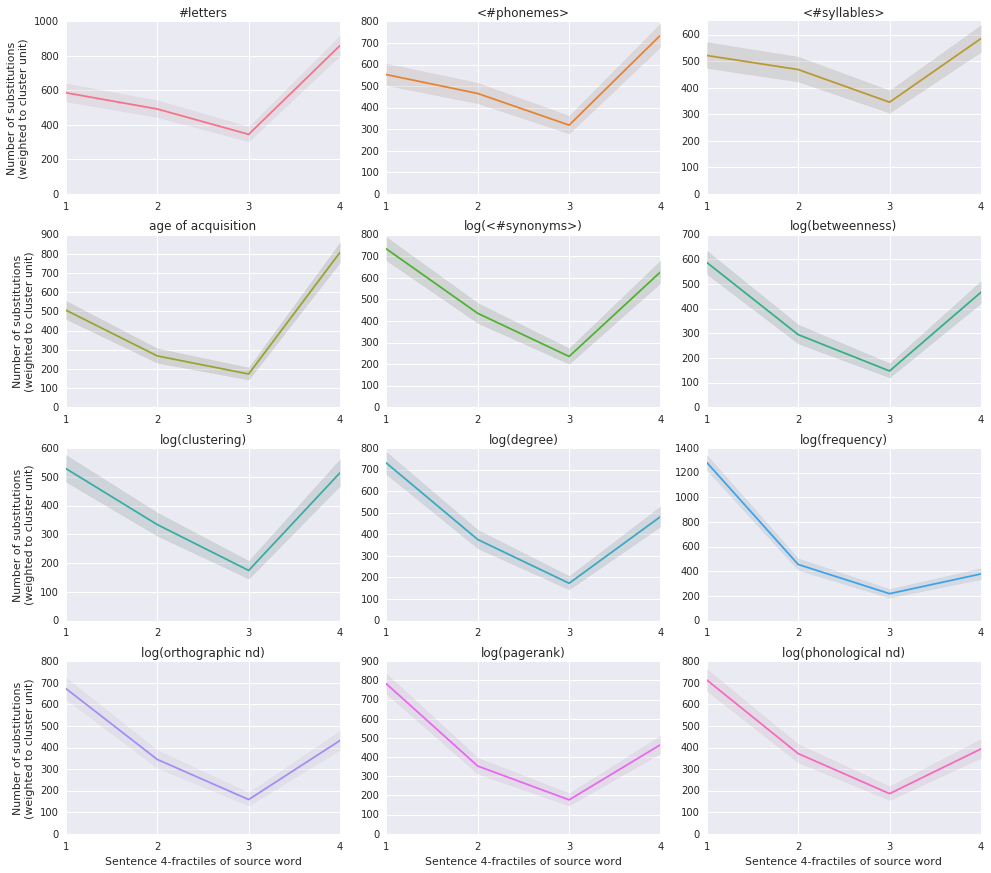

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

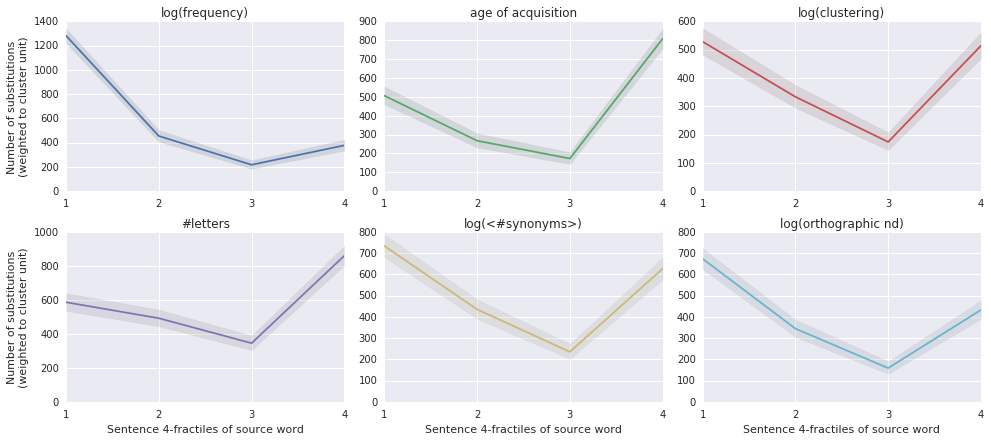

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)